In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar  
from scipy.interpolate import make_interp_spline
import plotly.graph_objs as go
from ipywidgets import interact
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from xgboost import XGBRegressor
import datetime
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
from calendar import month_abbr
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import OneHotEncoder
import mplcursors
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')


# <span style="color: rgba(0,160,245,1);">Pacemaker's</span> Initial analysis of warehouse optimization for Xylem

<br>
<br>
<br>
<br>
<br>



## Datasources


We've received the following data sources:


- Receiving History - PR1.xlsx
- Receiving History - PR3.xlsx
- Receiving_History_AR1.xlsx

- Shipping History - PR1.xlsx
- Shipping History - PR3.xlsx
- Shipping_History_AR1.xlsx

<br>
<br>
<br>
We decided to analyze the archived data set because it provides significantly more information.<br>
<br>
<br>
We will call the dataset for incoming items 'df' and that for outgoing deliveries 'df_shipping'
<br>

# Conclusion

### Daytime Analytics:

- The warehouse has detailed insights into its daily operations, including the exact timing of item receipts and shipments.
- Precise lists of average values and peak times on a daily, weekday, and other levels have been created, leading to the development of various Key Performance Indicators (KPIs).
- These insights can be leveraged to plan and optimize labor schedules efficiently, improving workforce management.


### Inventory Level Analysis:

- Inventory data is available from January 2021 onward, allowing for a thorough analysis of SKU (Stock Keeping Unit) inventory.
- The warehouse can accurately replicate the flow of products between inbound and outbound processes.
- The duration of time that items spend in the warehouse between inbound and outbound processes is known.
- Average values for each SKU and clustering by priority and moving speed provide valuable insights.
- Identification of overstocked, understocked, and normally behaving SKUs is possible.
- This information can be used to create digital twins for inventory management and optimization.


### Turnover Rate Calculation:

- Turnover rates for individual SKUs/items have been calculated on monthly, quarterly, and annual levels.
- Classic turnover rate calculations and alternative calculations using inventory averages provide different perspectives on turnover.


### Pallet Metrics:

- Metrics related to LPNs (License Plate Numbers) and sub-LPNs have been identified to understand the logic behind these identifiers.
- Key metrics include identifying the most frequently used LPNs and sub-LPNs, tracking which items use them the most, and creating a frequency identifier for items based on delivery frequency.
- Comparing LPN and sub-LPN frequency with item frequency provides insights into their usage patterns.


## Overall Conclusion:
The analyses conducted demonstrate a comprehensive understanding of the warehouse's data and operations. The insights gained from these initial analyses offer significant potential for process optimization within the warehouse:

Demand Forecasting: By leveraging inventory levels, demand forecasts can be conducted to determine which products are needed and when. This, combined with other metrics like overstocking/understocking trends and turnover rates, can enhance accuracy in product availability.

Workforce Optimization: Knowledge of SKU arrival/loading times and peak/average times at various levels allows for precise staff planning, leading to more efficient workforce management.

LPN/Sub-LPN Logic: While much has been understood, there is still room for comprehending the complete logic behind LPNs and sub-LPNs. A site visit to observe warehouse processes directly could provide further insights and opportunities for optimization.

In summary, the warehouse possesses a wealth of data-driven insights that can be harnessed to enhance operational efficiency, optimize inventory management, and improve workforce planning. Further exploration and on-site observations can uncover additional opportunities for optimization and refinement.

# Index

## 1. Exploratory Data Analysis and Descriptive Analytics of Logistics Operations
### 1.1 Analysis of Inbound Shipments
- Overview of Inbound Shipment Data
- Trends and Patterns in Inbound Logistics
- Key Metrics in Inbound Shipments

### 1.2 Examination of Outbound Shipments
- Detailed Insights into Outbound Shipment Data
- Outbound Shipping Trends and Analysis
- Critical Metrics for Outbound Logistics

### 1.3 Analysis of Common Elements in Inbound and Outbound Data
- Comparative Analysis of Inbound vs Outbound Logistics
- Intersection of Inbound and Outbound Operations
- Synergies and Differences in Shipping Patterns

## 2. Comprehensive Inventory Analysis
- Current State of Inventory
- Inventory Turnover aand Stock Status
- Optimizing Inventory Levels for Efficiency

## 3. Workforce Scheduling and Efficiency Enhancement
- Analysis of Working Hours and Shift Patterns
- Staffing Optimization for Operational Efficiency
- Strategies for Improving Personnel Allocation

## 4. Warehouse Space Utilization and Optimization
- Current Utilization of Warehouse Spaces
- Strategies for Maximizing Warehouse Efficiency
- Space Allocation and Future Planning Considerations

## Initial EDA for inbound items

Preprocessing

Reading Data


In [2]:
file_path = 'Receiving_History_AR1.xlsx'

df = pd.read_excel(file_path)

df.head()

,Transaction Date\nUser\n,Activity\nOperation\n,Item,Quantity,LPN\nDestination LPN\n,Sub-LPN\nDestination Sub-LPN\n,Detail LPN\nDestination Detail LPN\n,Source Location\nDestination Location\n,Source Area\nDestination Area\n
0,09/07/2023 01:50:22 pm\n10669706\n,Receiving\nUndirected Identify\n\n,P6012566\n BEL-X,1,PALPN00000075036,LPN0000000118393\n \n\n,\n \n\n,1190RF03\n A1T05A02,RDTS000021\nFLOOR\n\n
1,09/07/2023 01:50:22 pm\n10669706\n,Receiving\nUndirected Identify\n\n,P6012566\n BEL-X,1,PALPN00000075036,LPN0000000118393\n \n\n,\n \n\n,1190RF03\n A1T05A02,RDTS000021\nFLOOR\n\n
2,09/07/2023 01:50:21 pm\n10669706\n,Receiving\nUndirected Identify\n\n,P6012566\n BEL-X,1,PALPN00000075035,LPN0000000118392\n \n\n,\n \n\n,1190RF03\n A1T05A02,RDTS000021\nFLOOR\n\n
3,09/07/2023 01:50:20 pm\n10669706\n,Receiving\nUndirected Identify\n\n,P6012566\n BEL-X,1,PALPN00000075034,LPN0000000118391\n \n\n,\n \n\n,1190RF03\n A1T05A02,RDTS000021\nFLOOR\n\n
4,09/07/2023 01:50:18 pm\n10669706\n,Receiving\nUndirected Identify\n\n,P6013424\n BEL-X,2,PALPN00000075032,LPN0000000118389\n \n\n,\n \n\n,1190RF03\n A1T05A02,RDTS000021\nFLOOR\n\n


After reading the receiving history, we can see that the formatting of the original file is poor. There are inline rows, which means that several pieces of information are in one column instead of several, as is usually the case. 
You would have to check the ERP system to see why the files are formatted in this way and, if necessary, make changes in the system.

### First Data Cleaning -> Renaming Columns, removing inline rows, splitting data, etc. 

We have now added new columns to the 'df' data set. These new columns are effectively the existing columns, only split. These are first filled with NAs using the pd.NA method so that the dataset does not have any NULL values.

In [3]:
df['transaction_date'] = pd.NaT 
df['user_id'] = pd.NA  
df['source_destination'] = pd.NA  
df['destination_location'] = pd.NA  
df['source_area'] = pd.NA  
df['destination_area'] = pd.NA 
df['item'] = pd.NA 
df['item_number'] = pd.NA 
df['activity'] = pd.NA 
df['operation'] = pd.NA 

In [4]:
df.columns

Index(['Transaction Date\nUser\n', 'Activity\nOperation\n', 'Item', 'Quantity',
       'LPN\nDestination LPN\n', 'Sub-LPN\nDestination Sub-LPN\n',
       'Detail LPN\nDestination Detail LPN\n',
       'Source Location\nDestination Location\n',
       'Source Area\nDestination Area\n', 'transaction_date', 'user_id',
       'source_destination', 'destination_location', 'source_area',
       'destination_area', 'item', 'item_number', 'activity', 'operation'],
      dtype='object')

In the next step, we use Pandas' split function to extract the information from the original columns and transfer it to the new columns. When the entire process is complete, the old columns are removed.

In [5]:
split_columns = df['Transaction Date\nUser\n'].str.split('\n', expand=True)

df['transaction_date'] = pd.to_datetime(split_columns[0])  

df['user_id'] = split_columns[1].str.extract(r'(\d+)')[0]


if df['user_id'].isnull().any():
    print("There are missing values in the user_id column that need to be addressed.")
else:
    df['user_id'] = df['user_id'].astype('int')

source_destination_split = df['Source Location\nDestination Location\n'].str.split('\n', expand=True)

df['source_destination'] = source_destination_split[0].str.strip()  
df['destination_location'] = source_destination_split[1].str.strip()  

source_area_split = df['Source Area\nDestination Area\n'].str.split('\n', expand=True)

df['source_area'] = source_area_split[0].str.strip()  
df['destination_area'] = source_area_split.apply(lambda row: next((item for item in row if item), None), axis=1).str.strip()



There are missing values in the user_id column that need to be addressed.


In [6]:
operation_split = df['Activity\nOperation\n'].str.split('\n', expand=True)

df['activity'] = operation_split[0].str.strip()  
df['operation'] = operation_split[1].str.strip() 

In [7]:
df.drop(columns=['Transaction Date\nUser\n', 'Source Location\nDestination Location\n', 'Source Area\nDestination Area\n'], inplace=True)


A quick check on BEL-X for each item, otherwise you can use this as a starting point for the split

In [8]:
all_contain_bel_x = df['Item'].str.contains('BEL-X').all()

if all_contain_bel_x:
    print("All rows in the column contain 'BEL-X'.")
    df['Item'] = df['Item'].str.replace(' BEL-X', '', regex=False)
else:
    print("Not all rows in the column contain 'BEL-X'.")


Not all rows in the column contain 'BEL-X'.


In [9]:
item_split = df['Item'].str.split('\n', expand=True)

df['item_number'] = item_split[0].str.strip()  
df['item'] = item_split[1].str.strip()

In [10]:
print(df.columns)

Index(['Activity\nOperation\n', 'Item', 'Quantity', 'LPN\nDestination LPN\n',
       'Sub-LPN\nDestination Sub-LPN\n',
       'Detail LPN\nDestination Detail LPN\n', 'transaction_date', 'user_id',
       'source_destination', 'destination_location', 'source_area',
       'destination_area', 'item', 'item_number', 'activity', 'operation'],
      dtype='object')


In [11]:
df.drop(columns=['Item', 'Detail LPN\nDestination Detail LPN\n', 'Activity\nOperation\n'], inplace=True)



In [12]:
df.rename(columns={
    'LPN\nDestination LPN\n': 'destination_lpn',
    'Sub-LPN\nDestination Sub-LPN\n': 'destination_sub_lpn'
}, inplace=True)

This is now the dataset 'df' with which we start the project

In [13]:
new_column_order = [
    'transaction_date', 
    'user_id', 
    'item', 
    'item_number', 
    'Quantity', 
    'destination_lpn', 
    'destination_sub_lpn',
    'destination_location', 
    'destination_area',
    'source_area', 
    'destination_area',
    'activity', 
    'operation'
]

df = df[new_column_order]

df['destination_sub_lpn'] = df['destination_sub_lpn'].str.replace('\n', '', regex=False).str.strip()

df.columns



Index(['transaction_date', 'user_id', 'item', 'item_number', 'Quantity',
       'destination_lpn', 'destination_sub_lpn', 'destination_location',
       'destination_area', 'source_area', 'destination_area', 'activity',
       'operation'],
      dtype='object')

We are now starting to collect the first general information in order to better understand the dataset and its data. This process helps us to gain a better overview and thus develop better use cases later on.

In [14]:
min_date = df['transaction_date'].min()
max_date = df['transaction_date'].max()

unique_user_ids = df['user_id'].nunique()


df['year'] = df['transaction_date'].dt.year
unique_users_per_year = df.groupby('year')['user_id'].nunique()

unique_items_count = df['item'].nunique()
unique_items_list = df['item'].unique()

print(f"Minimum Transaction Date: {min_date}")
print(f"Maximum Transaction Date: {max_date}")
print(f"Total Unique User IDs: {unique_user_ids}")
print("\nUnique Users Per Year:")
print(unique_users_per_year)
print(f"\nTotal Unique Items: {unique_items_count}")
print("List of All Unique Items:")
for item in unique_items_list:
    print(item)

df['first_year'] = df.groupby('user_id')['transaction_date'].transform('min').dt.year


cohort_data = df.groupby(['first_year', 'year'])['user_id'].nunique().reset_index(name='unique_users')

cohort_pivot = cohort_data.pivot(index='first_year', columns='year', values='unique_users')




Minimum Transaction Date: 2021-01-16 16:53:12
Maximum Transaction Date: 2023-09-07 13:50:22
Total Unique User IDs: 27

Unique Users Per Year:
year
2021    23
2022    16
2023     7
Name: user_id, dtype: int64

Total Unique Items: 2
List of All Unique Items:
BEL-X
BEL-C


In [15]:
unique_item_numbers = df['item_number'].nunique()

total_quantity = df['Quantity'].sum()


df['year'] = df['transaction_date'].dt.year
total_quantity_per_year = df.groupby('year')['Quantity'].sum()

print(f"Total Unique Item Numbers / SKUs: {unique_item_numbers}")
print(f"Total Quantity of All Items: {total_quantity}")
print("\nTotal Quantity of Items per Year:")
for year, quantity in total_quantity_per_year.items():
    print(f"Year {year}: {quantity}")


Total Unique Item Numbers / SKUs: 5546
Total Quantity of All Items: 4543662

Total Quantity of Items per Year:
Year 2021: 1466607
Year 2022: 1895173
Year 2023: 1181882


Here we can now see how many ( Quantity ) of the individual items/SKUs have arrived in the warehouse.


In the upper section you can see the overall listing
In the lower section, this is broken down into the individual years

In [16]:
df.head()

,transaction_date,user_id,item,item_number,Quantity,destination_lpn,destination_sub_lpn,destination_location,destination_area,source_area,destination_area,activity,operation,year,first_year
0,2023-09-07 13:50:22,10669706,BEL-X,P6012566,1,PALPN00000075036,LPN0000000118393,A1T05A02,RDTS000021,RDTS000021,RDTS000021,Receiving,Undirected Identify,2023,2021.0
1,2023-09-07 13:50:22,10669706,BEL-X,P6012566,1,PALPN00000075036,LPN0000000118393,A1T05A02,RDTS000021,RDTS000021,RDTS000021,Receiving,Undirected Identify,2023,2021.0
2,2023-09-07 13:50:21,10669706,BEL-X,P6012566,1,PALPN00000075035,LPN0000000118392,A1T05A02,RDTS000021,RDTS000021,RDTS000021,Receiving,Undirected Identify,2023,2021.0
3,2023-09-07 13:50:20,10669706,BEL-X,P6012566,1,PALPN00000075034,LPN0000000118391,A1T05A02,RDTS000021,RDTS000021,RDTS000021,Receiving,Undirected Identify,2023,2021.0
4,2023-09-07 13:50:18,10669706,BEL-X,P6013424,2,PALPN00000075032,LPN0000000118389,A1T05A02,RDTS000021,RDTS000021,RDTS000021,Receiving,Undirected Identify,2023,2021.0


In [17]:
overall_quantity = df.groupby('item_number')['Quantity'].sum()

df['year'] = df['transaction_date'].dt.year
yearly_quantity = df.groupby(['year', 'item_number'])['Quantity'].sum().unstack(fill_value=0)

print("Overall Total Quantity of Each Item_Number:")
print(overall_quantity.head())
print("\nYearly Total Quantity of Each Item_Number:")
print(yearly_quantity.head())

Overall Total Quantity of Each Item_Number:
item_number
08-104-599-504     38
08-105-085-057     29
08-105-173-065     60
08-105-687-059    112
08-107-796-060      2
Name: Quantity, dtype: int64

Yearly Total Quantity of Each Item_Number:
item_number  08-104-599-504  08-105-085-057  08-105-173-065  08-105-687-059  \
year                                                                          
2021                     33               7               6              79   
2022                      0              22              31              25   
2023                      5               0              23               8   

item_number  08-107-796-060  08-111-626-501  08-111-627-501  08-111-671-001  \
year                                                                          
2021                      2              17               1              16   
2022                      0               8               5               0   
2023                      0               2      

In [18]:
item_item_number_quantity = df.groupby(['item', 'item_number'])['Quantity'].sum().reset_index()

print("\nAggregated Quantities for 'item' and 'item_number':")
print(item_item_number_quantity)


Aggregated Quantities for 'item' and 'item_number':
       item item_number  Quantity
0     BEL-C      103251      7920
1     BEL-C    103252LF      5616
2     BEL-C    103255LF       576
3     BEL-C    103257LF      1152
4     BEL-C    103258LF       864
...     ...         ...       ...
6225  BEL-X      YE8677         2
6226  BEL-X      YF3818         3
6227  BEL-X      YG5437         4
6228  BEL-X      YH4500         6
6229  BEL-X      YI4500         6

[6230 rows x 3 columns]


Here we see the top 15 SKUs based on their item quantity

In [19]:
top_15_item_numbers = df.groupby('item_number')['Quantity'].sum().sort_values(ascending=False).head(15)

print("Top 15 Item_Numbers Based on Quantity:")
print(top_15_item_numbers)

Top 15 Item_Numbers Based on Quantity:
item_number
110192LF    152064
M28099      121416
P77115      116932
M28101      108138
P2004620    105792
P77119      100627
P77109       90480
P70962       84000
P70877       81480
117415LF     75072
P64150       70000
117413LF     58991
F14200       54000
P77139       48310
P58496       46372
Name: Quantity, dtype: int64


In [20]:
df.head()

,transaction_date,user_id,item,item_number,Quantity,destination_lpn,destination_sub_lpn,destination_location,destination_area,source_area,destination_area,activity,operation,year,first_year
0,2023-09-07 13:50:22,10669706,BEL-X,P6012566,1,PALPN00000075036,LPN0000000118393,A1T05A02,RDTS000021,RDTS000021,RDTS000021,Receiving,Undirected Identify,2023,2021.0
1,2023-09-07 13:50:22,10669706,BEL-X,P6012566,1,PALPN00000075036,LPN0000000118393,A1T05A02,RDTS000021,RDTS000021,RDTS000021,Receiving,Undirected Identify,2023,2021.0
2,2023-09-07 13:50:21,10669706,BEL-X,P6012566,1,PALPN00000075035,LPN0000000118392,A1T05A02,RDTS000021,RDTS000021,RDTS000021,Receiving,Undirected Identify,2023,2021.0
3,2023-09-07 13:50:20,10669706,BEL-X,P6012566,1,PALPN00000075034,LPN0000000118391,A1T05A02,RDTS000021,RDTS000021,RDTS000021,Receiving,Undirected Identify,2023,2021.0
4,2023-09-07 13:50:18,10669706,BEL-X,P6013424,2,PALPN00000075032,LPN0000000118389,A1T05A02,RDTS000021,RDTS000021,RDTS000021,Receiving,Undirected Identify,2023,2021.0


In [21]:
import pandas as pd
import plotly.graph_objects as go

data = {
    "item_number": ["110192LF", "M28099", "P77115", "M28101", "P2004620", "P77119", "P77109", "P70962", "P70877", "117415LF", "P64150", "117413LF", "F14200", "P77139", "P58496"],
    "Quantity": [152064, 121416, 116932, 108138, 105792, 100627, 90480, 84000, 81480, 75072, 70000, 58991, 54000, 48310, 46372]
}

df_plot = pd.DataFrame(data)

fig = go.Figure(data=[
    go.Bar(x=df_plot["item_number"], y=df_plot["Quantity"], marker_color='#004499')
])

fig.update_layout(
    title='Top 15 Item Numbers by Quantity',
    xaxis=dict(
        title='Item Number',
        tickangle=45
    ),
    yaxis=dict(
        title='Total Quantity'
    ),
    showlegend=False
)

fig.show()



In [22]:
top_15_items = top_15_item_numbers.index.tolist()

top_15_df = df[df['item_number'].isin(top_15_items)]

yearly_quantities = top_15_df.groupby(['item_number', 'year'])['Quantity'].sum().reset_index()

pivot_table = yearly_quantities.pivot(index='item_number', columns='year', values='Quantity').fillna(0)

print("Yearly Quantities of Top 15 Item Numbers:")
print(pivot_table)

Yearly Quantities of Top 15 Item Numbers:
year            2021     2022     2023
item_number                           
110192LF     50076.0  60840.0  41148.0
117413LF         0.0  44880.0  14111.0
117415LF         0.0  37536.0  37536.0
F14200       19800.0  16200.0  18000.0
M28099       30024.0  83328.0   8064.0
M28101       33320.0  73306.0   1512.0
P2004620     33080.0  32640.0  40072.0
P58496       18942.0  15414.0  12016.0
P64150       25000.0  45000.0      0.0
P70877       23520.0  41160.0  16800.0
P70962       28980.0  36960.0  18060.0
P77109       27440.0  41760.0  21280.0
P77115       42044.0  38364.0  36524.0
P77119       33360.0  46195.0  21072.0
P77139       14158.0  16512.0  17640.0


In [23]:
import plotly.graph_objects as go

pivot_table_data = {
    '110192LF': [50076.0, 60840.0, 41148.0],
    '117413LF': [0.0, 44880.0, 14111.0],
    '117415LF': [0.0, 37536.0, 37536.0],
    'F14200': [19800.0, 16200.0, 18000.0],
    'M28099': [30024.0, 83328.0, 8064.0],
    'M28101': [33320.0, 73306.0, 1512.0],
    'P2004620': [33080.0, 32640.0, 40072.0],
    'P58496': [18942.0, 15414.0, 12016.0],
    'P64150': [25000.0, 45000.0, 0.0],
    'P70877': [23520.0, 41160.0, 16800.0],
    'P70962': [28980.0, 36960.0, 18060.0],
    'P77109': [27440.0, 41760.0, 21280.0],
    'P77115': [42044.0, 38364.0, 36524.0],
    'P77119': [33360.0, 46195.0, 21072.0],
    'P77139': [14158.0, 16512.0, 17640.0]
}
years = [2021, 2022, 2023]

fig = go.Figure()

for item, data in pivot_table_data.items():
    fig.add_trace(
        go.Scatter(
            x=years,
            y=data,
            mode='lines+markers',
            name=item,
            visible=False  
        )
    )

fig.data[0].visible = True

buttons = []
for i, item in enumerate(pivot_table_data.keys()):
    button = dict(
        method='update',
        args=[{'visible': [False] * len(pivot_table_data)},
              {'title': f'Yearly Quantities for {item}'}],
        label=item
    )
    button['args'][0]['visible'][i] = True  
    buttons.append(button)

fig.update_layout(
    updatemenus=[{
        'type': "dropdown",
        'direction': 'down',
        'x': 0.5,
        'y': 1.1,
        'showactive': True,
        'active': 0,
        'buttons': buttons
    }],
    title='Yearly Quantities for ' + list(pivot_table_data.keys())[0],
    xaxis_title='Year',
    yaxis_title='Quantity',
    margin=dict(l=20, r=20, t=40, b=20),
    paper_bgcolor="LightSteelBlue"
)

fig.show()


In [24]:
print(df.dtypes)

transaction_date        datetime64[ns]
user_id                         object
item                            object
item_number                     object
Quantity                         int64
destination_lpn                 object
destination_sub_lpn             object
destination_location            object
destination_area                object
source_area                     object
destination_area                object
activity                        object
operation                       object
year                             int32
first_year                     float64
dtype: object


In [25]:
unique_source_destination = df['destination_area'].nunique()
unique_destination_location = df['destination_location'].nunique()
unique_source_area = df['source_area'].nunique()
unique_destination_area = df['destination_area'].nunique()

#print(f"Total Unique Source Destinations: {unique_source_destination}")
#print(f"Total Unique Destination Locations: {unique_destination_location}")
#print(f"Total Unique Source Areas: {unique_source_area}")
#print(f"Total Unique Destination Areas: {unique_destination_area}")


In [26]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

df['year'] = df['transaction_date'].dt.year

unique_per_year_source_destination = df.groupby('year')['destination_area'].nunique()
unique_per_year_destination_location = df.groupby('year')['destination_location'].nunique()
unique_per_year_source_area = df.groupby('year')['source_area'].nunique()
unique_per_year_destination_area = df.groupby('year')['destination_area'].nunique()

#print("\nUnique Source Destinations per Year:")
#print(unique_per_year_source_destination)
#print("\nUnique Destination Locations per Year:")
#print(unique_per_year_destination_location)
#print("\nUnique Source Areas per Year:")
#print(unique_per_year_source_area)
#print("\nUnique Destination Areas per Year:")
#print(unique_per_year_destination_area)

In [27]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'], unit='ns')

df['year'] = df['transaction_date'].dt.year

numeric_df = df.select_dtypes(include=['int64', 'float64', 'int32'])

corr = numeric_df.corr()

#plt.figure(figsize=(10, 8))
#sns.heatmap(corr, annot=True, fmt=".2f")
#plt.show()

In [28]:
#from mlxtend.preprocessing import TransactionEncoder
#from mlxtend.frequent_patterns import apriori, association_rules


#transactions = df.applymap(str).values.tolist()

#te = TransactionEncoder()
#te_ary = te.fit(transactions).transform(transactions)

#df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

#frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

#rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

#print(rules)


In this section we see the top/worst 20 items based on their percentage development (cumulative)

In [29]:
yearly_quantity_filled = yearly_quantity.replace(0, np.nan)

yearly_percentage_change = yearly_quantity_filled.pct_change(axis=0) * 100

yearly_percentage_change_filled = yearly_percentage_change.fillna(0)

cumulative_percentage_change = yearly_percentage_change_filled.sum(axis=0)

top_20_increase = cumulative_percentage_change.sort_values(ascending=False).head(20)
worst_20_decrease = cumulative_percentage_change.sort_values(ascending=True).head(20)

print("\nTop 20 Item_Numbers with Best Increase:")
print(top_20_increase)
print("\nWorst 20 Item_Numbers with Worst Decrease:")
print(worst_20_decrease)


Top 20 Item_Numbers with Best Increase:
item_number
X10101            30000.000000
512025             9275.000000
P6012501           5100.000000
60A0B6001          4825.000000
P63245             4700.000000
SM2104             4604.166667
P5001127           4100.000000
510713             4056.250000
P6015675           4000.000000
P6015674           4000.000000
P82888             3741.201717
52-362-317-001     3500.000000
763418130          3500.000000
60A0B1004          3412.500000
183534             2800.000000
P2001125           2738.849020
P6013147           2700.000000
761981650          2700.000000
52-460-769-009     2600.000000
P6012500           2500.000000
dtype: float64

Worst 20 Item_Numbers with Worst Decrease:
item_number
P5003175         -159.818182
P6010935         -150.168350
P6015405         -148.888889
P57282           -148.609559
P5001111         -146.474359
P42546           -145.591603
7C0449080        -145.368421
V1001203         -145.340502
52-116-923-501   -144.25

In [30]:
import plotly.graph_objects as go

# Data for the top 20 items with the best increase
top_20_increase = {
    "X10101": 30000.0,
    "512025": 9275.0,
    "P6012501": 5100.0,
    "60A0B6001": 4825.0,
    "P63245": 4700.0,
    "SM2104": 4604.166667,
    "P5001127": 4100.0,
    "510713": 4056.250000,
    "P6015675": 4000.0,
    "P6015674": 4000.0,
    "P82888": 3741.201717,
    "52-362-317-001": 3500.0,
    "763418130": 3500.0,
    "60A0B1004": 3412.500000,
    "183534": 2800.0,
    "P2001125": 2738.849020,
    "P6013147": 2700.0,
    "761981650": 2700.0,
    "52-460-769-009": 2600.0,
    "P6012500": 2500.0
}

# Data for the worst 20 items with the worst decrease
worst_20_decrease = {
    "P5003175": -159.818182,
    "P6010935": -150.168350,
    "P6015405": -148.888889,
    "P57282": -148.609559,
    "P5001111": -146.474359,
    "P42546": -145.591603,
    "7C0449080": -145.368421,
    "V1001203": -145.340502,
    "52-116-923-501": -144.256757,
    "AP3985": -144.230769,
    "7604A0159": -142.142857,
    "V1001091": -141.538462,
    "52-116-917-520": -140.000000,
    "V1001019": -138.636364,
    "V1001098": -137.807683,
    "08-105-687-059": -136.354430,
    "V1001198": -134.871795,
    "P2000864": -134.071326,
    "P2000880": -133.909858,
    "P6010130": -132.003546
}

# Plotting top 20 increase
fig1 = go.Figure([go.Bar(x=list(top_20_increase.keys()), y=list(top_20_increase.values()), marker_color='#004499')])
fig1.update_layout(
    title='Top 20 Item Numbers with Best Increase in Quantities',
    xaxis_title='Item Number',
    yaxis_title='Cumulative Percentage Change',
    yaxis=dict(color='#004499'),
    paper_bgcolor='white',
    plot_bgcolor='white'
)
fig1.show()

# Plotting worst 20 decrease
fig2 = go.Figure([go.Bar(x=list(worst_20_decrease.keys()), y=list(worst_20_decrease.values()), marker_color='#004499')])
fig2.update_layout(
    title='Worst 20 Item Numbers with Worst Decrease in Quantities',
    xaxis_title='Item Number',
    yaxis_title='Cumulative Percentage Change',
    yaxis=dict(color='#004499'),
    paper_bgcolor='white',
    plot_bgcolor='white'
)
fig2.show()


A brief overview of the percentage development of all individual SKUs (2021 is always NaN, as it always compares with the previous year and we have no data for 2020)

In [31]:
yearly_percentage_change = yearly_quantity.pct_change(fill_method='pad') * 100

print("\nYearly Percentage Change for Each Item_Number:")
print(yearly_percentage_change)



Yearly Percentage Change for Each Item_Number:
item_number  08-104-599-504  08-105-085-057  08-105-173-065  08-105-687-059  \
year                                                                          
2021                    NaN             NaN             NaN             NaN   
2022                 -100.0      214.285714      416.666667       -68.35443   
2023                    inf     -100.000000      -25.806452       -68.00000   

item_number  08-107-796-060  08-111-626-501  08-111-627-501  08-111-671-001  \
year                                                                          
2021                    NaN             NaN             NaN             NaN   
2022                 -100.0      -52.941176           400.0          -100.0   
2023                    NaN      -75.000000          -100.0             NaN   

item_number  08-112-783-501  08-217-566-005  ...  YC8677  YD4500  YD5652  \
year                                         ...                           
2021    

In [32]:
percentage_change_2021_2022 = ((yearly_quantity.loc[2022] - yearly_quantity.loc[2021]) / yearly_quantity.loc[2021]) * 100
percentage_change_2022_2023 = ((yearly_quantity.loc[2023] - yearly_quantity.loc[2022]) / yearly_quantity.loc[2022]) * 100

percentage_change_2021_2022.replace([np.inf, -np.inf], np.nan, inplace=True)
percentage_change_2022_2023.replace([np.inf, -np.inf], np.nan, inplace=True)

percentage_changes = pd.DataFrame({
    'Percentage Change 2021-2022': percentage_change_2021_2022,
    'Percentage Change 2022-2023': percentage_change_2022_2023
})

percentage_changes


,Percentage Change 2021-2022,Percentage Change 2022-2023
item_number,,
08-104-599-504,-100.000000,NaN
08-105-085-057,214.285714,-100.000000
08-105-173-065,416.666667,-25.806452
08-105-687-059,-68.354430,-68.000000
08-107-796-060,-100.000000,NaN
...,...,...
YE8677,NaN,-100.000000
YF3818,NaN,-100.000000
YG5437,NaN,-100.000000


In [33]:
percentage_changes['Cumulative Change'] = percentage_changes.abs().sum(axis=1)

top_15_item_numbers = percentage_changes.nlargest(15, 'Cumulative Change')

top_15_item_numbers


,Percentage Change 2021-2022,Percentage Change 2022-2023,Cumulative Change
item_number,,,
P6012501,5100.000000,-100.000000,5200.000000
60A0B6001,NaN,4825.000000,4825.000000
SM2104,-95.833333,4700.000000,4795.833333
P63245,NaN,4700.000000,4700.000000
P5001127,NaN,4100.000000,4100.000000
P6015674,4000.000000,-100.000000,4100.000000
P6015675,4000.000000,-100.000000,4100.000000
510713,NaN,4056.250000,4056.250000
P82888,3783.333333,-42.131617,3825.464950


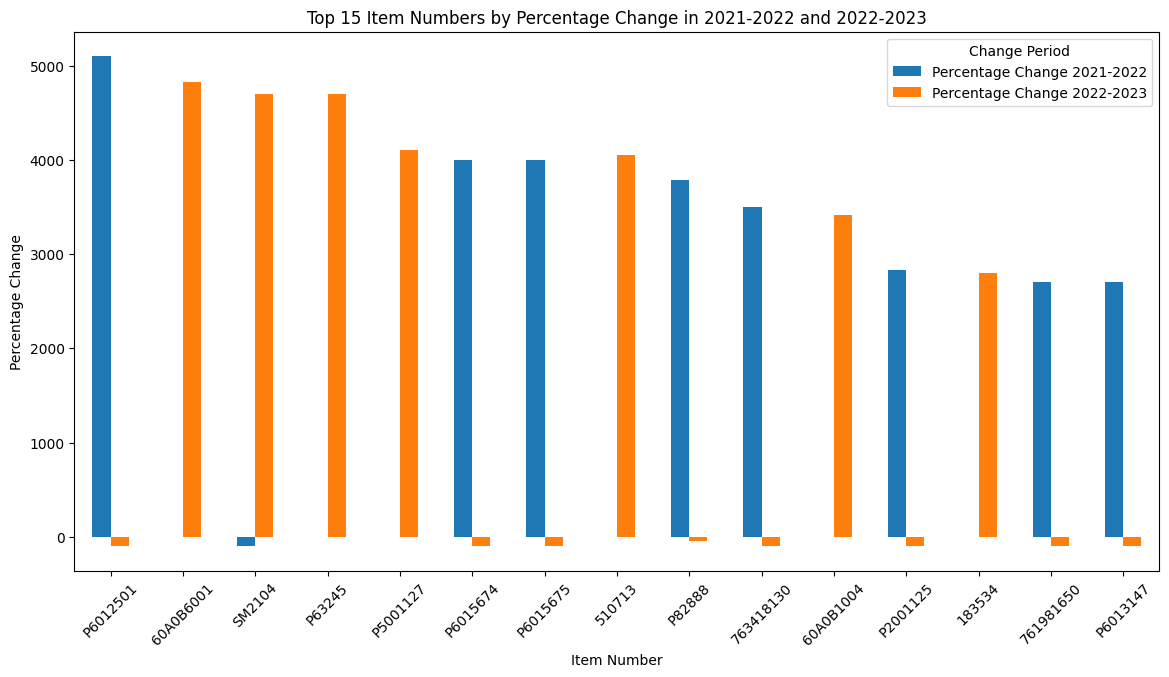

In [34]:
top_15_item_numbers[['Percentage Change 2021-2022', 'Percentage Change 2022-2023']].plot(kind='bar', figsize=(14, 7))
plt.title('Top 15 Item Numbers by Percentage Change in 2021-2022 and 2022-2023')
plt.xlabel('Item Number')
plt.ylabel('Percentage Change')
plt.xticks(rotation=45)
plt.legend(title='Change Period')
plt.show()

In [35]:
df.head()

,transaction_date,user_id,item,item_number,Quantity,destination_lpn,destination_sub_lpn,destination_location,destination_area,source_area,destination_area,activity,operation,year,first_year
0,2023-09-07 13:50:22,10669706,BEL-X,P6012566,1,PALPN00000075036,LPN0000000118393,A1T05A02,RDTS000021,RDTS000021,RDTS000021,Receiving,Undirected Identify,2023,2021.0
1,2023-09-07 13:50:22,10669706,BEL-X,P6012566,1,PALPN00000075036,LPN0000000118393,A1T05A02,RDTS000021,RDTS000021,RDTS000021,Receiving,Undirected Identify,2023,2021.0
2,2023-09-07 13:50:21,10669706,BEL-X,P6012566,1,PALPN00000075035,LPN0000000118392,A1T05A02,RDTS000021,RDTS000021,RDTS000021,Receiving,Undirected Identify,2023,2021.0
3,2023-09-07 13:50:20,10669706,BEL-X,P6012566,1,PALPN00000075034,LPN0000000118391,A1T05A02,RDTS000021,RDTS000021,RDTS000021,Receiving,Undirected Identify,2023,2021.0
4,2023-09-07 13:50:18,10669706,BEL-X,P6013424,2,PALPN00000075032,LPN0000000118389,A1T05A02,RDTS000021,RDTS000021,RDTS000021,Receiving,Undirected Identify,2023,2021.0


## Initial EDA for outbound items

Preprocessing
We have carried out the same preprocessing steps for the 'df_shipping' data set

In [36]:
file_path_shipping = 'Shipping_History_AR1.xlsx'

df_shipping = pd.read_excel(file_path_shipping)

Creating new Columns

In [37]:
df_shipping['transaction_date'] = pd.NaT 
df_shipping['user_id'] = pd.NA  
df_shipping['source_destination'] = pd.NA  
df_shipping['destination_location'] = pd.NA  
df_shipping['source_area'] = pd.NA  
df_shipping['destination_area'] = pd.NA 
df_shipping['item'] = pd.NA 
df_shipping['item_number'] = pd.NA 
df_shipping['activity'] = pd.NA 
df_shipping['operation'] = pd.NA 

In [38]:
df_shipping.columns

Index(['Transaction Date\nUser\n', 'Activity\nOperation\n', 'Item', 'Quantity',
       'LPN\nDestination LPN\n', 'Sub-LPN\nDestination Sub-LPN\n',
       'Detail LPN\nDestination Detail LPN\n',
       'Source Location\nDestination Location\n',
       'Source Area\nDestination Area\n', 'transaction_date', 'user_id',
       'source_destination', 'destination_location', 'source_area',
       'destination_area', 'item', 'item_number', 'activity', 'operation'],
      dtype='object')

In [39]:
split_columns_shipping = df_shipping['Transaction Date\nUser\n'].str.split('\n', expand=True)

df_shipping['transaction_date'] = pd.to_datetime(split_columns_shipping[0])  

df_shipping['user_id'] = split_columns_shipping[1].str.extract(r'(\d+)')[0]

if df_shipping['user_id'].isnull().any():
    print("There are missing values in the user_id column that need to be addressed.")
else:
    df_shipping['user_id'] = df_shipping['user_id'].astype('int')

source_destination_split_shipping = df_shipping['Source Location\nDestination Location\n'].str.split('\n', expand=True)

df_shipping['source_destination'] = source_destination_split_shipping[0].str.strip()  
df_shipping['destination_location'] = source_destination_split_shipping[1].str.strip()  

source_area_split_shipping = df_shipping['Source Area\nDestination Area\n'].str.split('\n', expand=True)

df_shipping['source_area'] = source_area_split_shipping[0].str.strip()  
df_shipping['destination_area'] = source_area_split_shipping.apply(lambda row: next((item for item in row if item), None), axis=1).str.strip()

There are missing values in the user_id column that need to be addressed.


In [40]:
operation_split_shipping = df_shipping['Activity\nOperation\n'].str.split('\n', expand=True)

df_shipping['activity'] = operation_split_shipping[0].str.strip()  
df_shipping['operation'] = operation_split_shipping[1].str.strip() 

In [41]:
df_shipping.drop(columns=['Transaction Date\nUser\n', 'Source Location\nDestination Location\n', 'Source Area\nDestination Area\n'], inplace=True)


In [42]:
all_contain_bel_x_shipping = df_shipping['Item'].str.contains('BEL-X').all()

if all_contain_bel_x_shipping:
    print("All rows in the column contain 'BEL-X'.")
    df_shipping['Item'] = df_shipping['Item'].str.replace(' BEL-X', '', regex=False)
else:
    print("Not all rows in the column contain 'BEL-X'.")

All rows in the column contain 'BEL-X'.


In [43]:
item_split_shipping = df_shipping['Item'].str.split('\n', expand=True)

df_shipping['item_number'] = item_split_shipping[0].str.strip()  
df_shipping['item'] = item_split_shipping[1].str.strip()

In [44]:
df_shipping.drop(columns=['Item', 'Detail LPN\nDestination Detail LPN\n', 'Activity\nOperation\n'], inplace=True)


In [45]:
df_shipping.rename(columns={
    'LPN\nDestination LPN\n': 'destination_lpn',
    'Sub-LPN\nDestination Sub-LPN\n': 'destination_sub_lpn'
}, inplace=True)

In [46]:
new_column_order_shipping = [
    'transaction_date', 
    'user_id', 
    'item', 
    'item_number', 
    'Quantity', 
    'destination_lpn', 
    'destination_sub_lpn',
    'destination_location', 
    'destination_area',
    'source_area', 
    'activity', 
    'operation'
]

df_shipping = df_shipping[new_column_order_shipping]

df_shipping['destination_sub_lpn'] = df_shipping['destination_sub_lpn'].str.replace('\n', '', regex=False).str.strip()


In [47]:
df_shipping.head()

,transaction_date,user_id,item,item_number,Quantity,destination_lpn,destination_sub_lpn,destination_location,destination_area,source_area,activity,operation
0,2023-09-07 13:34:24,10551272,,P79025,32,536491,LPN0000000223884,TRL0705698,SSTG,SSTG,Trailer load,
1,2023-09-07 13:34:24,10551272,,188711,1,536515,LPN0000000117952,TRL0705698,SSTG,SSTG,Trailer load,
2,2023-09-07 13:34:24,10551272,,P79025,35,536491,S00000012D8K,TRL0705698,SSTG,SSTG,Trailer load,
3,2023-09-07 13:34:24,10551272,,903576,1,L0000000JY7I,LPN0000000116469,TRL0705698,SSTG,SSTG,Trailer load,
4,2023-09-07 13:34:24,10551272,,903576,43,L0000000JY7I,LPN0000000116291,TRL0705698,SSTG,SSTG,Trailer load,


In [48]:
min_date_shipping = df_shipping['transaction_date'].min()
max_date_shipping = df_shipping['transaction_date'].max()

unique_user_ids_shipping = df_shipping['user_id'].nunique()



df_shipping['year'] = df_shipping['transaction_date'].dt.year
unique_users_per_year_shipping = df_shipping.groupby('year')['user_id'].nunique()

unique_items_count_shipping = df_shipping['item'].nunique()
unique_items_list_shipping = df_shipping['item'].unique()

print(f"Minimum Transaction Date: {min_date_shipping}")
print(f"Maximum Transaction Date: {max_date_shipping}")
print(f"Total Unique User IDs: {unique_user_ids_shipping}")
print("\nUnique Users Per Year:")
print(unique_users_per_year_shipping)
print(f"\nTotal Unique Items: {unique_items_count_shipping}")
print("List of All Unique Items:")
for item in unique_items_list_shipping:
    print(item)

df_shipping['first_year'] = df_shipping.groupby('user_id')['transaction_date'].transform('min').dt.year


cohort_data_shipping = df_shipping.groupby(['first_year', 'year'])['user_id'].nunique().reset_index(name='unique_users')

cohort_pivot_shipping = cohort_data_shipping.pivot(index='first_year', columns='year', values='unique_users')

#plt.figure(figsize=(10, 8))
#sns.heatmap(cohort_pivot_shipping, annot=True, cmap='coolwarm', fmt=".0f")
#plt.title('Cohort Analysis - Users Active Over Time')
#plt.ylabel('Cohort Year (First Year of Appearance)')
#plt.xlabel('Year')
#plt.show()

Minimum Transaction Date: 2021-01-16 19:36:40
Maximum Transaction Date: 2023-09-07 13:34:24
Total Unique User IDs: 19

Unique Users Per Year:
year
2021    19
2022     5
2023     4
Name: user_id, dtype: int64

Total Unique Items: 1
List of All Unique Items:



In [49]:
unique_item_numbers_shipping = df_shipping['item_number'].nunique()

total_quantity_shipping = df_shipping['Quantity'].sum()


df_shipping['year'] = df_shipping['transaction_date'].dt.year
total_quantity_per_year_shipping = df_shipping.groupby('year')['Quantity'].sum()

print(f"Total Unique Item Numbers: {unique_item_numbers_shipping}")
print(f"Total Quantity of All Items: {total_quantity_shipping}")
print("\nTotal Quantity of Items per Year:")
for year, quantity in total_quantity_per_year_shipping.items():
    print(f"Year {year}: {quantity}")

Total Unique Item Numbers: 4689
Total Quantity of All Items: 3342917

Total Quantity of Items per Year:
Year 2021: 1122461
Year 2022: 1158277
Year 2023: 1062179


In [50]:
overall_quantity_shipping = df_shipping.groupby('item_number')['Quantity'].sum()

df_shipping['year'] = df_shipping['transaction_date'].dt.year
yearly_quantity_shipping = df_shipping.groupby(['year', 'item_number'])['Quantity'].sum().unstack(fill_value=0)

print("Overall Total Quantity of Each Item_Number:")
print(overall_quantity_shipping)
print("\nYearly Total Quantity of Each Item_Number:")
print(yearly_quantity_shipping)

Overall Total Quantity of Each Item_Number:
item_number
08-104-599-504     37
08-105-085-057     34
08-105-173-065     64
08-105-687-059    171
08-111-626-501     22
                 ... 
YE8677              2
YF3818              2
YG5437              4
YH4500              6
YI4500              6
Name: Quantity, Length: 4689, dtype: int64

Yearly Total Quantity of Each Item_Number:
item_number  08-104-599-504  08-105-085-057  08-105-173-065  08-105-687-059  \
year                                                                          
2021                      8              12               6              73   
2022                     24              22               7              90   
2023                      5               0              51               8   

item_number  08-111-626-501  08-111-627-501  08-111-628-501  08-111-671-001  \
year                                                                          
2021                     18               4               4  

In [51]:
item_item_number_quantity_shipping = df_shipping.groupby(['item', 'item_number'])['Quantity'].sum().reset_index()

print("\nAggregated Quantities for 'item' and 'item_number':")
print(item_item_number_quantity_shipping)


Aggregated Quantities for 'item' and 'item_number':
     item     item_number  Quantity
0          08-104-599-504        37
1          08-105-085-057        34
2          08-105-173-065        64
3          08-105-687-059       171
4          08-111-626-501        22
...   ...             ...       ...
4684               YE8677         2
4685               YF3818         2
4686               YG5437         4
4687               YH4500         6
4688               YI4500         6

[4689 rows x 3 columns]


In [52]:
top_15_item_numbers_shipping = df_shipping.groupby('item_number')['Quantity'].sum().sort_values(ascending=False).head(15)

print("Top 15 Item_Numbers Based on Quantity:")
print(top_15_item_numbers_shipping)

Top 15 Item_Numbers Based on Quantity:
item_number
110192LF    158154
P2004620    105755
M28099       77424
P77115       70094
P70962       60060
P70877       59604
P77119       59592
M28101       57834
P77109       56800
117415LF     56302
F14200       55800
P64150       46900
P58496       46224
117413LF     44064
P58492       42750
Name: Quantity, dtype: int64


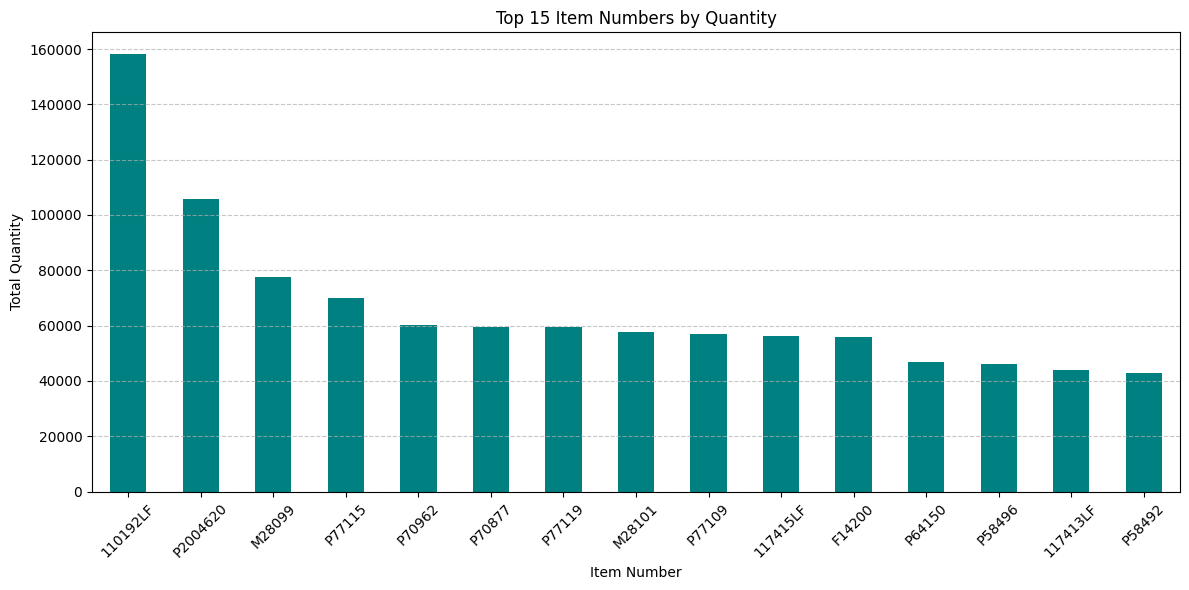

In [53]:
plt.figure(figsize=(12, 6))  
top_15_item_numbers_shipping.plot(kind='bar', color='teal')  
plt.title('Top 15 Item Numbers by Quantity')  
plt.xlabel('Item Number')  
plt.ylabel('Total Quantity') 
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  

plt.show()

In [54]:
top_15_item_numbers_shipping = top_15_item_numbers_shipping.index.tolist()

top_15_df_shipping = df_shipping[df_shipping['item_number'].isin(top_15_item_numbers_shipping)]

yearly_quantities_shipping = top_15_df_shipping.groupby(['item_number', 'year'])['Quantity'].sum().reset_index()

pivot_table_shipping = yearly_quantities_shipping.pivot(index='item_number', columns='year', values='Quantity').fillna(0)

print("Yearly Quantities of Top 15 Item Numbers:")
print(pivot_table_shipping)

Yearly Quantities of Top 15 Item Numbers:
year            2021     2022     2023
item_number                           
110192LF     53779.0  61355.0  43020.0
117413LF         0.0  11409.0  32655.0
117415LF         0.0  16158.0  40144.0
F14200       22500.0  20480.0  12820.0
M28099       16944.0  33428.0  27052.0
M28101       10528.0  26978.0  20328.0
P2004620     47280.0  29683.0  28792.0
P58492       14472.0  14472.0  13806.0
P58496       18690.0  15414.0  12120.0
P64150       17700.0  19900.0   9300.0
P70877       14240.0  26044.0  19320.0
P70962       17220.0  24360.0  18480.0
P77109       18720.0  22000.0  16080.0
P77115       27600.0  25668.0  16826.0
P77119       18364.0  26395.0  14833.0


In [55]:
pivot_table_data_shipping = {
    '110192LF': [50076.0, 60840.0, 41148.0],
    '117413LF': [0.0, 44880.0, 14111.0],
    '117415LF': [0.0, 37536.0, 37536.0],
    'F14200': [19800.0, 16200.0, 18000.0],
    'M28099': [30024.0, 83328.0, 8064.0],
    'M28101': [33320.0, 73306.0, 1512.0],
    'P2004620': [33080.0, 32640.0, 40072.0],
    'P58496': [18942.0, 15414.0, 12016.0],
    'P64150': [25000.0, 45000.0, 0.0],
    'P70877': [23520.0, 41160.0, 16800.0],
    'P70962': [28980.0, 36960.0, 18060.0],
    'P77109': [27440.0, 41760.0, 21280.0],
    'P77115': [42044.0, 38364.0, 36524.0],
    'P77119': [33360.0, 46195.0, 21072.0],
    'P77139': [14158.0, 16512.0, 17640.0]
}
years = [2021, 2022, 2023]

fig = go.Figure()

for item, data in pivot_table_data_shipping.items():
    fig.add_trace(
        go.Scatter(
            x=years,
            y=data,
            mode='lines+markers',
            name=item,
            visible=False  
        )
    )

fig.data[0].visible = True

buttons = []
for i, item in enumerate(pivot_table_data_shipping.keys()):
    button = dict(
        method='update',
        args=[{'visible': [False] * len(pivot_table_data_shipping)},
              {'title': f'Yearly Quantities for {item}'}],
        label=item
    )
    button['args'][0]['visible'][i] = True  
    buttons.append(button)

fig.update_layout(
    updatemenus=[{
        'type': "dropdown",
        'direction': 'down',
        'x': 0.5,
        'y': 1.1,
        'showactive': True,
        'active': 0,
        'buttons': buttons
    }],
    title='Yearly Quantities for ' + list(pivot_table_data_shipping.keys())[0],
    xaxis_title='Year',
    yaxis_title='Quantity',
    margin=dict(l=20, r=20, t=40, b=20),
    paper_bgcolor="LightSteelBlue"
)

fig.show()


In [56]:
unique_source_destination_shipping = df_shipping['destination_area'].nunique()
unique_destination_location_shipping = df_shipping['destination_location'].nunique()
unique_source_area_shipping = df_shipping['source_area'].nunique()
unique_destination_area_shipping = df_shipping['destination_area'].nunique()

print(f"Total Unique Source Destinations: {unique_source_destination_shipping}")
print(f"Total Unique Destination Locations: {unique_destination_location_shipping}")
print(f"Total Unique Source Areas: {unique_source_area_shipping}")
print(f"Total Unique Destination Areas: {unique_destination_area_shipping}")

Total Unique Source Destinations: 2
Total Unique Destination Locations: 2736
Total Unique Source Areas: 2
Total Unique Destination Areas: 2


In [57]:
df_shipping['transaction_date'] = pd.to_datetime(df_shipping['transaction_date'])

df_shipping['year'] = df_shipping['transaction_date'].dt.year

unique_per_year_source_destination_shipping = df_shipping.groupby('year')['destination_area'].nunique()
unique_per_year_destination_location_shipping = df_shipping.groupby('year')['destination_location'].nunique()
unique_per_year_source_area_shipping = df_shipping.groupby('year')['source_area'].nunique()
unique_per_year_destination_area_shipping = df_shipping.groupby('year')['destination_area'].nunique()

print("\nUnique Source Destinations per Year:")
print(unique_per_year_source_destination_shipping)
print("\nUnique Destination Locations per Year:")
print(unique_per_year_destination_location_shipping)
print("\nUnique Source Areas per Year:")
print(unique_per_year_source_area_shipping)
print("\nUnique Destination Areas per Year:")
print(unique_per_year_destination_area_shipping)


Unique Source Destinations per Year:
year
2021    2
2022    2
2023    1
Name: destination_area, dtype: int64

Unique Destination Locations per Year:
year
2021     856
2022    1108
2023     775
Name: destination_location, dtype: int64

Unique Source Areas per Year:
year
2021    2
2022    2
2023    1
Name: source_area, dtype: int64

Unique Destination Areas per Year:
year
2021    2
2022    2
2023    1
Name: destination_area, dtype: int64


In [58]:
df_shipping['transaction_date'] = pd.to_datetime(df_shipping['transaction_date'], unit='ns')

df_shipping['year'] = df_shipping['transaction_date'].dt.year

numeric_df_shipping = df_shipping.select_dtypes(include=['int64', 'float64', 'int32'])

corr = numeric_df_shipping.corr()

#plt.figure(figsize=(10, 8))
#sns.heatmap(corr, annot=True, fmt=".2f")
#plt.show()

In [59]:
yearly_quantity_filled_shipping = yearly_quantity_shipping.replace(0, np.nan)

yearly_percentage_change_shipping = yearly_quantity_filled_shipping.pct_change(axis=0) * 100

yearly_percentage_change_filled_shipping = yearly_percentage_change_shipping.fillna(0)

cumulative_percentage_change_shipping = yearly_percentage_change_filled_shipping.sum(axis=0)

top_20_increase_shipping = cumulative_percentage_change_shipping.sort_values(ascending=False).head(20)
worst_20_decrease_shipping = cumulative_percentage_change_shipping.sort_values(ascending=True).head(20)

print("\nTop 20 Item_Numbers with Best Increase:")
print(top_20_increase_shipping)
print("\nWorst 20 Item_Numbers with Worst Decrease:")
print(worst_20_decrease_shipping)


Top 20 Item_Numbers with Best Increase:
item_number
P63245            41800.000000
7C1252120          6800.000000
572651076          5900.000000
P6011205           5100.000000
P6011204           5100.000000
P6011200           4900.000000
P6011197           4900.000000
P53500             4500.000000
P6011201           4300.000000
226700             4139.662599
510713             3958.645210
52-239-570-001     3851.881188
772615715          3775.490196
P6010985           3610.000000
52-105-175-003     3490.909091
772230321          3233.333333
P6010893           3200.000000
SM2090             2800.000000
P53032             2616.666667
226220             2521.102290
dtype: float64

Worst 20 Item_Numbers with Worst Decrease:
item_number
V51976           -170.609756
P2000854         -155.288194
104500           -154.351281
P5001021         -152.427188
175863           -151.768116
P6010152         -150.000000
V1001082         -148.872180
P2002396         -148.284457
P5001303         -146.42

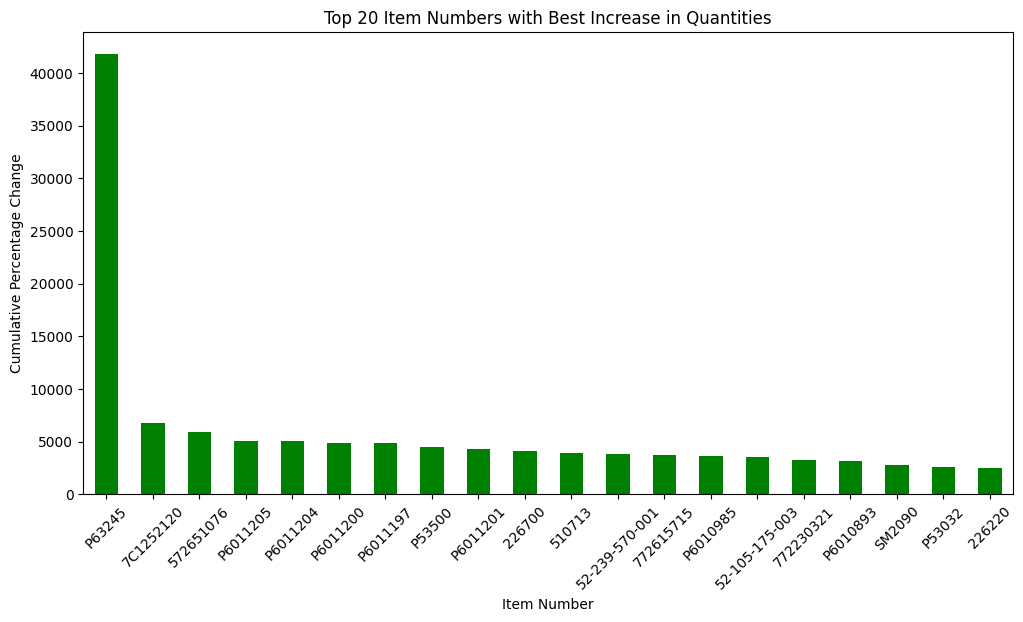

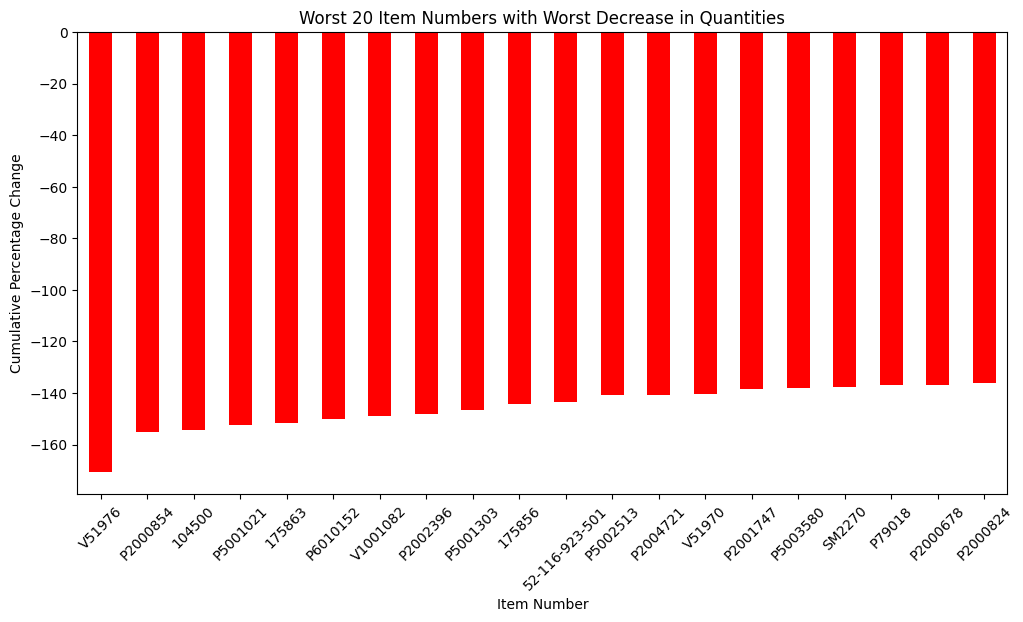

In [60]:
plt.figure(figsize=(12, 6))
top_20_increase_shipping.plot(kind='bar', color='green')
plt.title('Top 20 Item Numbers with Best Increase in Quantities')
plt.xlabel('Item Number')
plt.ylabel('Cumulative Percentage Change')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
worst_20_decrease_shipping.plot(kind='bar', color='red')
plt.title('Worst 20 Item Numbers with Worst Decrease in Quantities')
plt.xlabel('Item Number')
plt.ylabel('Cumulative Percentage Change')
plt.xticks(rotation=45)
plt.show()

In [61]:
yearly_percentage_change_shipping = yearly_quantity_shipping.pct_change(fill_method='pad') * 100

print("\nYearly Percentage Change for Each Item_Number:")
print(yearly_percentage_change_shipping)


Yearly Percentage Change for Each Item_Number:
item_number  08-104-599-504  08-105-085-057  08-105-173-065  08-105-687-059  \
year                                                                          
2021                    NaN             NaN             NaN             NaN   
2022             200.000000       83.333333       16.666667       23.287671   
2023             -79.166667     -100.000000      628.571429      -91.111111   

item_number  08-111-626-501  08-111-627-501  08-111-628-501  08-111-671-001  \
year                                                                          
2021                    NaN             NaN             NaN             NaN   
2022             -77.777778          -100.0          -100.0             0.0   
2023            -100.000000             NaN             NaN          -100.0   

item_number  08-112-783-501  08-217-566-005  ...  YC8677  YD4500  YD5652  \
year                                         ...                           
2021    

In [62]:
percentage_change_2021_2022_shipping = ((yearly_quantity_shipping.loc[2022] - yearly_quantity_shipping.loc[2021]) / yearly_quantity_shipping.loc[2021]) * 100
percentage_change_2022_2023_shipping = ((yearly_quantity_shipping.loc[2023] - yearly_quantity_shipping.loc[2022]) / yearly_quantity_shipping.loc[2022]) * 100

percentage_change_2021_2022_shipping.replace([np.inf, -np.inf], np.nan, inplace=True)
percentage_change_2022_2023_shipping.replace([np.inf, -np.inf], np.nan, inplace=True)

percentage_changes_shipping = pd.DataFrame({
    'Percentage Change 2021-2022': percentage_change_2021_2022_shipping,
    'Percentage Change 2022-2023': percentage_change_2022_2023_shipping
})

percentage_changes_shipping

,Percentage Change 2021-2022,Percentage Change 2022-2023
item_number,,
08-104-599-504,200.000000,-79.166667
08-105-085-057,83.333333,-100.000000
08-105-173-065,16.666667,628.571429
08-105-687-059,23.287671,-91.111111
08-111-626-501,-77.777778,-100.000000
...,...,...
YE8677,NaN,-100.000000
YF3818,NaN,-100.000000
YG5437,NaN,-100.000000


In [63]:
percentage_changes_shipping['Cumulative Change'] = percentage_changes_shipping.abs().sum(axis=1)

top_15_item_numbers_shipping = percentage_changes_shipping.nlargest(15, 'Cumulative Change')

top_15_item_numbers_shipping

,Percentage Change 2021-2022,Percentage Change 2022-2023,Cumulative Change
item_number,,,
P63245,NaN,41800.000000,41800.000000
7C1252120,6800.000000,-100.000000,6900.000000
P6011204,NaN,5100.000000,5100.000000
P6011205,NaN,5100.000000,5100.000000
P6011197,NaN,4900.000000,4900.000000
P6011200,NaN,4900.000000,4900.000000
P53500,4500.000000,-100.000000,4600.000000
P6011201,NaN,4300.000000,4300.000000
226700,4164.285714,-24.623116,4188.908830


## Comparison received vs shipped

In [64]:
received_items = df['item_number'].unique()

shipped_items = df_shipping['item_number'].unique()

common_items = set(received_items) & set(shipped_items)

common_items_count = len(common_items)

print(f"Number of item_numbers received: {len(received_items)}")
print(f"Number of item_numbers shipped: {len(shipped_items)}")
print(f"Number of item_numbers both received and shipped: {common_items_count}")


Number of item_numbers received: 5546
Number of item_numbers shipped: 4689
Number of item_numbers both received and shipped: 4307


In [65]:
received_items = df['item_number'].unique()
shipped_items = df_shipping['item_number'].unique()

common_items = list(set(received_items) & set(shipped_items))

items_missing_in_shipped = list(set(received_items) - set(shipped_items))

items_missing_in_received = list(set(shipped_items) - set(received_items))

common_items_file = 'common_items.csv'  
items_missing_in_shipped_file = 'items_missing_in_shipped.csv' 
items_missing_in_received_file = 'items_missing_in_received.csv'  

pd.DataFrame({'item_number': common_items}).to_csv(common_items_file, index=False)
pd.DataFrame({'item_number': items_missing_in_shipped}).to_csv(items_missing_in_shipped_file, index=False)
pd.DataFrame({'item_number': items_missing_in_received}).to_csv(items_missing_in_received_file, index=False)

In [66]:
df.head()

,transaction_date,user_id,item,item_number,Quantity,destination_lpn,destination_sub_lpn,destination_location,destination_area,source_area,destination_area,activity,operation,year,first_year
0,2023-09-07 13:50:22,10669706,BEL-X,P6012566,1,PALPN00000075036,LPN0000000118393,A1T05A02,RDTS000021,RDTS000021,RDTS000021,Receiving,Undirected Identify,2023,2021.0
1,2023-09-07 13:50:22,10669706,BEL-X,P6012566,1,PALPN00000075036,LPN0000000118393,A1T05A02,RDTS000021,RDTS000021,RDTS000021,Receiving,Undirected Identify,2023,2021.0
2,2023-09-07 13:50:21,10669706,BEL-X,P6012566,1,PALPN00000075035,LPN0000000118392,A1T05A02,RDTS000021,RDTS000021,RDTS000021,Receiving,Undirected Identify,2023,2021.0
3,2023-09-07 13:50:20,10669706,BEL-X,P6012566,1,PALPN00000075034,LPN0000000118391,A1T05A02,RDTS000021,RDTS000021,RDTS000021,Receiving,Undirected Identify,2023,2021.0
4,2023-09-07 13:50:18,10669706,BEL-X,P6013424,2,PALPN00000075032,LPN0000000118389,A1T05A02,RDTS000021,RDTS000021,RDTS000021,Receiving,Undirected Identify,2023,2021.0


In this section, we have created a new dataframe that contains all unique SKUs (items). We have also applied the FIFO principle to see when the item first arrived in the warehouse and when it first left the warehouse. We have also added the quantity of each item.
An interesting indicator is now the column 'days_in_warehouse', as you can see how long it took from delivery to dispatch.

In [67]:

df['transaction_date'] = pd.to_datetime(df['transaction_date'], unit='ns')
df_shipping['transaction_date'] = pd.to_datetime(df_shipping['transaction_date'], unit='ns')

first_receipt_info = df.groupby('item_number').agg({'transaction_date': 'min', 'Quantity': 'first'})

first_shipping_info = df_shipping.groupby('item_number').agg({'transaction_date': 'min', 'Quantity': 'first'})

item_stay_duration = pd.merge(first_receipt_info, first_shipping_info, how='inner', left_index=True, right_index=True, suffixes=('_receipt', '_shipping'))

item_stay_duration['days_in_warehouse'] = (item_stay_duration['transaction_date_shipping'] - item_stay_duration['transaction_date_receipt']).dt.days

item_stay_duration.rename(columns={
    'transaction_date_receipt': 'first_receipt_date', 
    'transaction_date_shipping': 'first_shipping_date',
    'Quantity_receipt': 'quantity_at_first_receipt',
    'Quantity_shipping': 'quantity_at_first_shipping'
}, inplace=True)

item_stay_duration


,first_receipt_date,quantity_at_first_receipt,first_shipping_date,quantity_at_first_shipping,days_in_warehouse
item_number,,,,,
08-104-599-504,2021-04-01 10:49:43,5,2021-04-06 11:20:28,5,5
08-105-085-057,2021-01-16 16:53:12,12,2021-01-18 07:51:06,11,1
08-105-173-065,2021-04-23 10:01:41,20,2021-04-27 12:15:57,5,4
08-105-687-059,2021-04-29 10:58:05,8,2021-07-08 06:22:49,8,69
08-111-626-501,2021-01-19 12:52:16,1,2021-02-16 14:43:09,1,28
...,...,...,...,...,...
YE8677,2022-08-17 06:54:52,2,2022-09-14 10:59:59,2,28
YF3818,2022-02-01 07:58:56,1,2022-03-10 07:04:08,1,36
YG5437,2022-02-23 08:45:04,1,2022-06-01 07:50:37,1,97


Now we have done the same thing according to the LILO principle

In [68]:

df['transaction_date'] = pd.to_datetime(df['transaction_date'], unit='ns')
df_shipping['transaction_date'] = pd.to_datetime(df_shipping['transaction_date'], unit='ns')

last_receipt_info = df.groupby('item_number').agg({'transaction_date': 'max', 'Quantity': 'last'})

last_shipping_info = df_shipping.groupby('item_number').agg({'transaction_date': 'max', 'Quantity': 'last'})

item_last_stay_duration = pd.merge(last_receipt_info, last_shipping_info, how='inner', left_index=True, right_index=True, suffixes=('_receipt', '_shipping'))

item_last_stay_duration['days_in_warehouse'] = (item_last_stay_duration['transaction_date_shipping'] - item_last_stay_duration['transaction_date_receipt']).dt.days

item_last_stay_duration.rename(columns={
    'transaction_date_receipt': 'last_receipt_date', 
    'transaction_date_shipping': 'last_shipping_date',
    'Quantity_receipt': 'quantity_at_last_receipt',
    'Quantity_shipping': 'quantity_at_last_shipping'
}, inplace=True)

item_last_stay_duration


,last_receipt_date,quantity_at_last_receipt,last_shipping_date,quantity_at_last_shipping,days_in_warehouse
item_number,,,,,
08-104-599-504,2023-05-25 13:53:30,33,2023-07-19 09:35:36,4,54
08-105-085-057,2022-03-21 11:08:09,1,2022-07-15 06:45:35,1,115
08-105-173-065,2023-04-26 07:28:55,6,2023-06-07 06:13:37,4,41
08-105-687-059,2023-05-24 10:16:51,4,2023-06-12 10:26:05,2,19
08-111-626-501,2023-03-29 07:29:14,1,2022-06-21 07:15:19,1,-282
...,...,...,...,...,...
YE8677,2022-08-17 06:54:52,2,2022-09-14 10:59:59,2,28
YF3818,2022-02-01 08:18:44,1,2022-03-10 07:04:08,1,36
YG5437,2022-02-23 09:16:08,1,2022-07-25 06:39:05,1,151


Now we have looked at each individual transaction and compared the inputs and outputs - according to the FIFO principle. We can see that some items have the same number of Item_Quantity on the same delivery day. This is due to the fact that the loop runs through each transaction individually.

In [69]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'], unit='ns')
df_shipping['transaction_date'] = pd.to_datetime(df_shipping['transaction_date'], unit='ns')

common_item_numbers = set(df['item_number']).intersection(df_shipping['item_number'])
df_common = df[df['item_number'].isin(common_item_numbers)].sort_values(by='transaction_date')
df_shipping_common = df_shipping[df_shipping['item_number'].isin(common_item_numbers)].sort_values(by='transaction_date')

matched_data_list = []

for item_number in common_item_numbers:
    df_item = df_common[df_common['item_number'] == item_number]
    df_shipping_item = df_shipping_common[df_shipping_common['item_number'] == item_number]

    for _, row in df_item.iterrows():
        shipping_row = df_shipping_item[df_shipping_item['transaction_date'] >= row['transaction_date']].head(1)

        if not shipping_row.empty:
            days_in_warehouse = (shipping_row['transaction_date'].iloc[0] - row['transaction_date']).days
            quantity_shipped = shipping_row['Quantity'].iloc[0]

            matched_data_list.append({
                'item_number': item_number,
                'incoming_date': row['transaction_date'],
                'outgoing_date': shipping_row['transaction_date'].iloc[0],
                'quantity_received': row['Quantity'],
                'quantity_shipped': quantity_shipped,
                'days_in_warehouse': days_in_warehouse
            })

matched_data = pd.DataFrame(matched_data_list)

matched_data




,item_number,incoming_date,outgoing_date,quantity_received,quantity_shipped,days_in_warehouse
0,P5004520,2023-03-31 12:07:21,2023-04-18 06:28:41,2,2,17
1,V50939,2021-08-27 13:22:07,2021-08-31 07:07:51,200,50,3
2,V50939,2021-09-27 12:28:52,2022-01-10 06:13:39,50,30,104
3,V50939,2021-09-27 12:28:52,2022-01-10 06:13:39,30,30,104
4,V50939,2022-04-21 08:36:50,2022-05-16 13:14:45,150,11,25
...,...,...,...,...,...,...
68483,AC5261,2022-09-26 11:13:59,2022-10-28 10:58:09,1,1,31
68484,AC5261,2023-05-25 12:12:32,2023-07-12 09:42:14,1,1,47
68485,AC5261,2023-06-28 11:56:05,2023-07-12 09:42:14,1,1,13
68486,AC5261,2023-08-07 07:19:42,2023-09-01 05:29:06,1,1,24


Dropping duplicate entries

In [70]:
matched_data_unique = matched_data.drop_duplicates()

matched_data_unique


,item_number,incoming_date,outgoing_date,quantity_received,quantity_shipped,days_in_warehouse
0,P5004520,2023-03-31 12:07:21,2023-04-18 06:28:41,2,2,17
1,V50939,2021-08-27 13:22:07,2021-08-31 07:07:51,200,50,3
2,V50939,2021-09-27 12:28:52,2022-01-10 06:13:39,50,30,104
3,V50939,2021-09-27 12:28:52,2022-01-10 06:13:39,30,30,104
4,V50939,2022-04-21 08:36:50,2022-05-16 13:14:45,150,11,25
...,...,...,...,...,...,...
68483,AC5261,2022-09-26 11:13:59,2022-10-28 10:58:09,1,1,31
68484,AC5261,2023-05-25 12:12:32,2023-07-12 09:42:14,1,1,47
68485,AC5261,2023-06-28 11:56:05,2023-07-12 09:42:14,1,1,13
68486,AC5261,2023-08-07 07:19:42,2023-09-01 05:29:06,1,1,24


In [71]:
descriptive_stats = matched_data_unique[['quantity_received', 'quantity_shipped', 'days_in_warehouse']].describe()

descriptive_stats.loc['range'] = descriptive_stats.loc['max'] - descriptive_stats.loc['min']
descriptive_stats.loc['variance'] = matched_data_unique[['quantity_received', 'quantity_shipped', 'days_in_warehouse']].var()
descriptive_stats.loc['median'] = matched_data_unique[['quantity_received', 'quantity_shipped', 'days_in_warehouse']].median()

print(descriptive_stats)

          quantity_received  quantity_shipped  days_in_warehouse
count          67056.000000      67056.000000       67056.000000
mean              60.894446         39.320628          32.869050
std              274.885318        168.697439          67.855461
min                1.000000          1.000000           0.000000
25%                2.000000          2.000000           3.000000
50%                6.000000          4.000000           9.000000
75%               25.000000         12.000000          32.000000
max            23725.000000      11000.000000         930.000000
range          23724.000000      10999.000000         930.000000
variance       75561.937975      28458.825807        4604.363539
median             6.000000          4.000000           9.000000


In [72]:
csv_file_path_dio = 'matched_data.csv' 

matched_data_unique.to_csv(csv_file_path_dio, index=False)

## 2. Comprehensive Inventory Analysis


In the first step, we looked at what the average duration 'days_in_warehouse' is for each individual SKU/item. We also added the frequency (number of transactions)

In [73]:
item_analysis = matched_data_unique.groupby('item_number').agg({'days_in_warehouse': 'mean', 'quantity_received': 'count'}).rename(columns={'quantity_received': 'shipment_frequency'})

item_analysis = item_analysis.sort_values(by=['shipment_frequency', 'days_in_warehouse'], ascending=[False, True])

print(item_analysis.head())

             days_in_warehouse  shipment_frequency
item_number                                       
P85287                2.981170                1487
P85286                2.865223                1432
P85289                3.805024                 836
P85290                2.873862                 769
115127                9.606227                 546


Next, we wanted to look at which items are fast movers and which SKUs are not. 
We used the following thresholds for this:

fast_moving_threshold = 7  <br>
medium_moving_threshold = 30  <br>
slow_moving_threshold = 180  <br>

def categorize_item(row):<br>
<br>
    if row['days_in_warehouse'] < fast_moving_threshold:<br>
        return 'Fast Mover'<br>
        <br>
    elif fast_moving_threshold <= row['days_in_warehouse'] < medium_moving_threshold:<br>
        return 'Medium Mover'<br>
        <br>
    elif medium_moving_threshold <= row['days_in_warehouse'] < slow_moving_threshold:<br>
        return 'Slow Mover'<br>
        <br>
    else:<br>
        return 'Leftovers'<br>

<br>
<br>
<br>
Now we have the same dataframe as before, except that another column has been added 'category' -> This tells us whether an item/SKU is a fast, slow or medium mover or whether it is a leftover (very long duration in the warehouse)



In [74]:
fast_moving_threshold = 7  
medium_moving_threshold = 30  
slow_moving_threshold = 180  

def categorize_item(row):
    if row['days_in_warehouse'] < fast_moving_threshold:
        return 'Fast Mover'
    elif fast_moving_threshold <= row['days_in_warehouse'] < medium_moving_threshold:
        return 'Medium Mover'
    elif medium_moving_threshold <= row['days_in_warehouse'] < slow_moving_threshold:
        return 'Slow Mover'
    else:
        return 'Leftovers'

item_analysis['category'] = item_analysis.apply(categorize_item, axis=1)

print(item_analysis)

             days_in_warehouse  shipment_frequency      category
item_number                                                     
P85287                2.981170                1487    Fast Mover
P85286                2.865223                1432    Fast Mover
P85289                3.805024                 836    Fast Mover
P85290                2.873862                 769    Fast Mover
115127                9.606227                 546  Medium Mover
...                        ...                 ...           ...
760116150           652.000000                   1     Leftovers
763871060           684.000000                   1     Leftovers
P5002222            710.000000                   1     Leftovers
P6015395            742.000000                   1     Leftovers
P6013149            755.000000                   1     Leftovers

[4196 rows x 3 columns]


In the next step, we went one step further. Although we know which SKUs/items are in the warehouse for how long on average and to which category they belong, this does not yet reflect the importance of these SKUs. We have therefore added a priority cluter. This is based on the category (fast mover, etc.) and the total number of items and/or the frequency frequency
<br>
<br>
def define_priority_cluster(row):
    if row['category'] == 'Fast Mover' and (row['total_quantity_shipped'] > 100 or row['frequency_shipped'] > 10):
        return 'Top Priority Item'
<br>
    elif row['category'] == 'Medium Mover' and (50 <= row['total_quantity_shipped'] <= 100 or 5 <= row['frequency_shipped'] <= 10):
        return 'Medium Priority Item'
<br>
    else:
        return 'Low Priority Item'

In [75]:
total_quantity_received = df.groupby('item_number')['Quantity'].sum()
frequency_received = df.groupby('item_number')['Quantity'].count()

total_quantity_shipped = df_shipping.groupby('item_number')['Quantity'].sum()
frequency_shipped = df_shipping.groupby('item_number')['Quantity'].count()


item_analysis['total_quantity_received'] = total_quantity_received
item_analysis['frequency_received'] = frequency_received
item_analysis['total_quantity_shipped'] = total_quantity_shipped
item_analysis['frequency_shipped'] = frequency_shipped


In [76]:
def define_priority_cluster(row):
    if row['category'] == 'Fast Mover' and (row['total_quantity_shipped'] > 100 or row['frequency_shipped'] > 10):
        return 'Top Priority Item'
    elif row['category'] == 'Medium Mover' and (50 <= row['total_quantity_shipped'] <= 100 or 5 <= row['frequency_shipped'] <= 10):
        return 'Medium Priority Item'
    else:
        return 'Low Priority Item'

item_analysis['priority_cluster'] = item_analysis.apply(define_priority_cluster, axis=1)

print(item_analysis)



             days_in_warehouse  shipment_frequency      category  \
item_number                                                        
P85287                2.981170                1487    Fast Mover   
P85286                2.865223                1432    Fast Mover   
P85289                3.805024                 836    Fast Mover   
P85290                2.873862                 769    Fast Mover   
115127                9.606227                 546  Medium Mover   
...                        ...                 ...           ...   
760116150           652.000000                   1     Leftovers   
763871060           684.000000                   1     Leftovers   
P5002222            710.000000                   1     Leftovers   
P6015395            742.000000                   1     Leftovers   
P6013149            755.000000                   1     Leftovers   

             total_quantity_received  frequency_received  \
item_number                                            

In [77]:
file_path = 'item_analysis.csv'

item_analysis.to_csv(file_path, index=True)

In [78]:
merged_data = matched_data_unique.merge(df[['user_id', 'item_number', 'Quantity']], on='item_number', how='left')



In [79]:
merged_data = merged_data.merge(item_analysis[['category', 'priority_cluster']], on='item_number', how='left')

print(merged_data)

         item_number       incoming_date       outgoing_date  \
0           P5004520 2023-03-31 12:07:21 2023-04-18 06:28:41   
1             V50939 2021-08-27 13:22:07 2021-08-31 07:07:51   
2             V50939 2021-08-27 13:22:07 2021-08-31 07:07:51   
3             V50939 2021-08-27 13:22:07 2021-08-31 07:07:51   
4             V50939 2021-08-27 13:22:07 2021-08-31 07:07:51   
...              ...                 ...                 ...   
12396596      AC5261 2023-08-07 07:22:40 2023-09-01 05:29:06   
12396597      AC5261 2023-08-07 07:22:40 2023-09-01 05:29:06   
12396598      AC5261 2023-08-07 07:22:40 2023-09-01 05:29:06   
12396599      AC5261 2023-08-07 07:22:40 2023-09-01 05:29:06   
12396600      AC5261 2023-08-07 07:22:40 2023-09-01 05:29:06   

          quantity_received  quantity_shipped  days_in_warehouse   user_id  \
0                         2                 2                 17  10669706   
1                       200                50                  3  10686544 

Time-Series

In [80]:
#monthly_trends = df.resample('M', on='transaction_date')['Quantity'].sum()

#monthly_trends.plot(kind='line', title='Monthly Quantity Trends')
#plt.show()


## Inventory Turnover Rates

In the first step, we looked at the overall turnover rate, purely based on the transaction data

# Inventory Metrics Calculation

## Overview
Inventory management is crucial in optimizing the efficiency and profitability of a business. Two key metrics often used in inventory analysis are the Average Inventory and the Inventory Turnover Rate. These metrics help businesses understand how effectively they are managing their inventory.

## Calculation of Average Inventory

### Formula
The Average Inventory is calculated using the following formula:

\[ \text{Average Inventory} = \frac{\text{Total Received} + \text{Total Shipped}}{2} \]

### Components
- **Total Received**: This is the sum of the quantities of all items received in the warehouse over a specified period.
- **Total Shipped**: This is the sum of the quantities of all items shipped out of the warehouse over the same period.

### Example
```python
total_received = df['Quantity'].sum()
total_shipped = df_shipping['Quantity'].sum()
average_inventory = (total_received + total_shipped) / 2


In [81]:
total_received = df['Quantity'].sum()
total_shipped = df_shipping['Quantity'].sum()

average_inventory = (total_received + total_shipped) / 2


In [82]:
inventory_turnover_rate = total_shipped / average_inventory  

print(f"Inventory Turnover Rate: {inventory_turnover_rate}")

Inventory Turnover Rate: 0.8477483075995308


In [83]:


df['year_quarter'] = df['transaction_date'].dt.year.astype(str) + ' Q' + df['transaction_date'].dt.quarter.astype(str)
df_shipping['year_quarter'] = df_shipping['transaction_date'].dt.year.astype(str) + ' Q' + df_shipping['transaction_date'].dt.quarter.astype(str)

df_shipping['year'] = df_shipping['transaction_date'].dt.year
df_shipping['quarter'] = df_shipping['transaction_date'].dt.to_period('Q')

received_yearly = df.groupby('year')['Quantity'].sum()
shipped_yearly = df_shipping.groupby('year')['Quantity'].sum()

received_quarterly = df.groupby('year_quarter')['Quantity'].sum()
shipped_quarterly = df_shipping.groupby('year_quarter')['Quantity'].sum()


average_inventory_yearly = (received_yearly + shipped_yearly) / 2
inventory_turnover_yearly = shipped_yearly / average_inventory_yearly

average_inventory_quarterly = (received_quarterly + shipped_quarterly) / 2
inventory_turnover_quarterly = shipped_quarterly / average_inventory_quarterly


print("Yearly Inventory Turnover Rate:")
print(inventory_turnover_yearly)
print("\nQuarterly Inventory Turnover Rate:")
print(inventory_turnover_quarterly)


Yearly Inventory Turnover Rate:
year
2021    0.867077
2022    0.758668
2023    0.946658
Name: Quantity, dtype: float64

Quarterly Inventory Turnover Rate:
year_quarter
2021 Q1    0.541233
2021 Q2    0.771292
2021 Q3    1.072740
2021 Q4    0.774983
2022 Q1    0.611089
2022 Q2    0.768666
2022 Q3    0.757526
2022 Q4    1.034761
2023 Q1    1.011934
2023 Q2    0.823965
2023 Q3    1.117854
Name: Quantity, dtype: float64


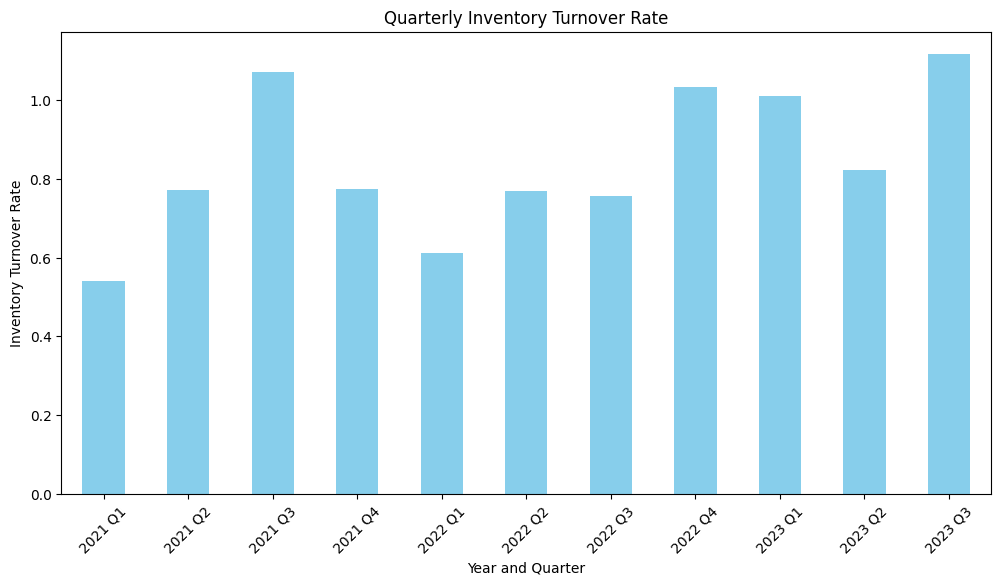

In [84]:
inventory_turnover_quarterly = pd.Series({
    '2021 Q1': 0.541233,
    '2021 Q2': 0.771292,
    '2021 Q3': 1.072740,
    '2021 Q4': 0.774983,
    '2022 Q1': 0.611089,
    '2022 Q2': 0.768666,
    '2022 Q3': 0.757526,
    '2022 Q4': 1.034761,
    '2023 Q1': 1.011934,
    '2023 Q2': 0.823965,
    '2023 Q3': 1.117854
})

plt.figure(figsize=(12, 6))
inventory_turnover_quarterly.plot(kind='bar', color='skyblue')
plt.title('Quarterly Inventory Turnover Rate')
plt.xlabel('Year and Quarter')
plt.ylabel('Inventory Turnover Rate')
plt.xticks(rotation=45)
plt.show()

In [85]:
import plotly.graph_objects as go
import numpy as np
from scipy.interpolate import make_interp_spline

# Given data
inventory_turnover_data = {
    '2021 Q1': 0.541233,
    '2021 Q2': 0.771292,
    '2021 Q3': 1.072740,
    '2021 Q4': 0.774983,
    '2022 Q1': 0.611089,
    '2022 Q2': 0.768666,
    '2022 Q3': 0.757526,
    '2022 Q4': 1.034761,
    '2023 Q1': 1.011934,
    '2023 Q2': 0.823965,
    '2023 Q3': 1.117854
}

quarters = list(inventory_turnover_data.keys())
rates = list(inventory_turnover_data.values())
quarters_index = np.array(range(len(quarters)))

spline = make_interp_spline(quarters_index, rates, k=3)
x_smooth = np.linspace(quarters_index.min(), quarters_index.max(), 300)
y_smooth = spline(x_smooth)

fig = go.Figure()

fig.add_trace(go.Scatter(x=x_smooth, y=y_smooth, mode='lines+markers', line_color='blue'))

fig.update_layout(
    title='Quarterly Inventory Turnover Rate (Spline Chart)',
    xaxis=dict(
        title='Year and Quarter',
        tickmode='array',
        tickvals=quarters_index,
        ticktext=quarters
    ),
    yaxis=dict(
        title='Inventory Turnover Rate'
    ),
    showlegend=False
)

fig.update_xaxes(showgrid=False, linecolor='black')
fig.update_yaxes(showgrid=False, linecolor='black')
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')

fig.show()




Further turnover rates will follow at a later date

## Warehouse Optimization

### Inventory Level total warehouse ( Overall )

In [86]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df_shipping['transaction_date'] = pd.to_datetime(df_shipping['transaction_date'])

df['year_month'] = df['transaction_date'].dt.to_period('M')
df_shipping['year_month'] = df_shipping['transaction_date'].dt.to_period('M')

received_inventory = df.groupby(['year_month', 'item_number'])['Quantity'].sum().reset_index()
shipped_inventory = df_shipping.groupby(['year_month', 'item_number'])['Quantity'].sum().reset_index()

monthly_changes = pd.merge(received_inventory, shipped_inventory, on=['year_month', 'item_number'], how='outer', suffixes=('_received', '_shipped'))
monthly_changes.fillna(0, inplace=True)
monthly_changes['monthly_net'] = monthly_changes['Quantity_received'] - monthly_changes['Quantity_shipped']

monthly_changes['cumulative_net'] = monthly_changes.groupby('item_number')['monthly_net'].cumsum()

total_inventory = monthly_changes.groupby('year_month').agg({'cumulative_net': 'sum'}).reset_index()

inventory_list = total_inventory.values.tolist()

In [87]:
#print(total_inventory)

In [88]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df_shipping['transaction_date'] = pd.to_datetime(df_shipping['transaction_date'])

df['year_month'] = df['transaction_date'].dt.to_period('M')
df_shipping['year_month'] = df_shipping['transaction_date'].dt.to_period('M')

received_totals = df.groupby('year_month')['Quantity'].sum().reset_index()

shipped_totals = df_shipping.groupby('year_month')['Quantity'].sum().reset_index()

merged_totals = pd.merge(received_totals, shipped_totals, on='year_month', how='outer', suffixes=('_received', '_shipped'))
merged_totals.fillna(0, inplace=True)

output_file_path = 'output_data/warehouse_monthly_totals.csv'
merged_totals.to_csv(output_file_path, index=False)

output_file_path

'output_data/warehouse_monthly_totals.csv'

In [89]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df_shipping['transaction_date'] = pd.to_datetime(df_shipping['transaction_date'])
df['year_month'] = df['transaction_date'].dt.to_period('M')
df_shipping['year_month'] = df_shipping['transaction_date'].dt.to_period('M')

received_totals = df.groupby('year_month')['Quantity'].sum().reset_index()
shipped_totals = df_shipping.groupby('year_month')['Quantity'].sum().reset_index()

merged_totals = pd.merge(received_totals, shipped_totals, on='year_month', how='outer', suffixes=('_received', '_shipped'))
merged_totals.fillna(0, inplace=True)

merged_totals['monthly_net'] = merged_totals['Quantity_received'] - merged_totals['Quantity_shipped']

merged_totals['cumulative_inventory'] = merged_totals['monthly_net'].cumsum()

inventory_list = merged_totals[['year_month', 'cumulative_inventory']].values.tolist()



output_file_path_merged_tools = 'output_data/merged_totals.csv'
merged_totals.to_csv(output_file_path_merged_tools, index=False)


In [90]:
inventory_list

[[Period('2021-01', 'M'), 18337],
 [Period('2021-02', 'M'), 50679],
 [Period('2021-03', 'M'), 69072],
 [Period('2021-04', 'M'), 153896],
 [Period('2021-05', 'M'), 259630],
 [Period('2021-06', 'M'), 213905],
 [Period('2021-07', 'M'), 179521],
 [Period('2021-08', 'M'), 158942],
 [Period('2021-09', 'M'), 146488],
 [Period('2021-10', 'M'), 161690],
 [Period('2021-11', 'M'), 210603],
 [Period('2021-12', 'M'), 344146],
 [Period('2022-01', 'M'), 402024],
 [Period('2022-02', 'M'), 649669],
 [Period('2022-03', 'M'), 743260],
 [Period('2022-04', 'M'), 830126],
 [Period('2022-05', 'M'), 845869],
 [Period('2022-06', 'M'), 894420],
 [Period('2022-07', 'M'), 931686],
 [Period('2022-08', 'M'), 1062708],
 [Period('2022-09', 'M'), 1099409],
 [Period('2022-10', 'M'), 1047273],
 [Period('2022-11', 'M'), 1140791],
 [Period('2022-12', 'M'), 1081042],
 [Period('2023-01', 'M'), 1108211],
 [Period('2023-02', 'M'), 1091893],
 [Period('2023-03', 'M'), 1072289],
 [Period('2023-04', 'M'), 1027135],
 [Period('2023

In [91]:
inventory_df = pd.DataFrame(inventory_list, columns=['year_month', 'cumulative_inventory'])

output_file_path_inventory = 'output_data/inventory_levels.csv' 
inventory_df.to_csv(output_file_path_inventory, index=False)

### Inventory Level for whole Warehouse ( SKU Level )

In [92]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df_shipping['transaction_date'] = pd.to_datetime(df_shipping['transaction_date'])
df['year_month'] = df['transaction_date'].dt.to_period('M')
df_shipping['year_month'] = df_shipping['transaction_date'].dt.to_period('M')

received_totals = df.groupby(['year_month', 'item_number'])['Quantity'].sum().reset_index()
shipped_totals = df_shipping.groupby(['year_month', 'item_number'])['Quantity'].sum().reset_index()

merged_totals_sku = pd.merge(received_totals, shipped_totals, on=['year_month', 'item_number'], how='outer', suffixes=('_received', '_shipped'))
merged_totals_sku.fillna(0, inplace=True)

merged_totals_sku['monthly_net'] = merged_totals_sku['Quantity_received'] - merged_totals_sku['Quantity_shipped']

merged_totals_sku.sort_values(by=['item_number', 'year_month'], inplace=True)

merged_totals_sku['cumulative_inventory'] = merged_totals_sku.groupby('item_number')['monthly_net'].cumsum()

output_file_path_sku = 'output_data/item_level_inventory.csv'  
merged_totals_sku.to_csv(output_file_path_sku, index=False)

output_file_path_sku

merged_totals_sku


,year_month,item_number,Quantity_received,Quantity_shipped,monthly_net,cumulative_inventory
1047,2021-04,08-104-599-504,33.0,4.0,29.0,29.0
27730,2021-11,08-104-599-504,0.0,2.0,-2.0,27.0
28164,2021-12,08-104-599-504,0.0,2.0,-2.0,25.0
28596,2022-01,08-104-599-504,0.0,17.0,-17.0,8.0
29538,2022-03,08-104-599-504,0.0,5.0,-5.0,3.0
...,...,...,...,...,...,...
32392,2022-07,YG5437,0.0,1.0,-1.0,0.0
7965,2021-11,YH4500,6.0,0.0,6.0,6.0
29061,2022-01,YH4500,0.0,6.0,-6.0,0.0
7966,2021-11,YI4500,6.0,0.0,6.0,6.0


Here we see a list of the inventory level and how it has developed over the entire period

In [93]:
last_inventory_levels = merged_totals_sku.sort_values(by='year_month').groupby('item_number').last()

positive_inventory_count = (last_inventory_levels['cumulative_inventory'] > 0).sum()
negative_inventory_count = (last_inventory_levels['cumulative_inventory'] < 0).sum()

descriptive_stats = last_inventory_levels['cumulative_inventory'].describe()

print(f"Positive Inventory Count: {positive_inventory_count}")
print(f"Negative Inventory Count: {negative_inventory_count}")
print("\nDescriptive Statistics:\n", descriptive_stats)


Positive Inventory Count: 3386
Negative Inventory Count: 1344

Descriptive Statistics:
 count     5928.000000
mean       202.554825
std       1968.772336
min      -8100.000000
25%          0.000000
50%          1.000000
75%         18.000000
max      50304.000000
Name: cumulative_inventory, dtype: float64


In [94]:
top_20_positive_inventory = last_inventory_levels.sort_values(by='cumulative_inventory', ascending=False).head(20)
top_20_negative_inventory = last_inventory_levels.sort_values(by='cumulative_inventory').head(20)

print("Top 20 Items with Most Inventory Level:\n", top_20_positive_inventory)
print("\nTop 20 Items with Worst (Most Negative) Inventory Level:\n", top_20_negative_inventory)


Top 20 Items with Most Inventory Level:
             year_month  Quantity_received  Quantity_shipped  monthly_net  \
item_number                                                                
M28101         2023-08                0.0            1456.0      -1456.0   
P77115         2023-09                0.0            1559.0      -1559.0   
M28099         2023-08             2304.0            1152.0       1152.0   
P77119         2023-09                0.0             576.0       -576.0   
210179         2023-06            10000.0               0.0      10000.0   
210178         2023-05            38059.0               0.0      38059.0   
P77109         2023-08                0.0            3680.0      -3680.0   
247136         2023-05            25568.0               0.0      25568.0   
P77139         2023-08              552.0            1152.0       -600.0   
P70962         2023-09             1680.0               0.0       1680.0   
247135         2023-09                0.0      

## Inventory Level for common Items ( Overall )

In [95]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df_shipping['transaction_date'] = pd.to_datetime(df_shipping['transaction_date'])
df['year_month'] = df['transaction_date'].dt.to_period('M')
df_shipping['year_month'] = df_shipping['transaction_date'].dt.to_period('M')

common_items = set(df['item_number']).intersection(set(df_shipping['item_number']))

df_common = df[df['item_number'].isin(common_items)]
df_shipping_common = df_shipping[df_shipping['item_number'].isin(common_items)]

received_totals_common = df_common.groupby('year_month')['Quantity'].sum().reset_index()
shipped_totals_common = df_shipping_common.groupby('year_month')['Quantity'].sum().reset_index()

merged_totals_common = pd.merge(received_totals_common, shipped_totals_common, on='year_month', how='outer', suffixes=('_received', '_shipped'))
merged_totals_common.fillna(0, inplace=True)

merged_totals_common['monthly_net'] = merged_totals_common['Quantity_received'] - merged_totals_common['Quantity_shipped']

merged_totals_common['cumulative_inventory'] = merged_totals_common['monthly_net'].cumsum()

output_file_path_merged_common = 'output_data/merged_totals_common.csv'
merged_totals_common.to_csv(output_file_path_merged_common, index=False)

output_file_path_merged_common


'output_data/merged_totals_common.csv'

In [96]:
merged_totals_common

,year_month,Quantity_received,Quantity_shipped,monthly_net,cumulative_inventory
0,2021-01,19683,1328,18355,18355
1,2021-02,44543,11403,33140,51495
2,2021-03,44869,24607,20262,71757
3,2021-04,126640,40387,86253,158010
4,2021-05,146842,41292,105550,263560
5,2021-06,112525,158342,-45817,217743
6,2021-07,68883,111439,-42556,175187
7,2021-08,155213,174878,-19665,155522
8,2021-09,188633,207914,-19281,136241
9,2021-10,141008,126355,14653,150894


## Inventory Level for common Items ( SKU Level )

In [97]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df_shipping['transaction_date'] = pd.to_datetime(df_shipping['transaction_date'])
df['year_month'] = df['transaction_date'].dt.to_period('M')
df_shipping['year_month'] = df_shipping['transaction_date'].dt.to_period('M')

common_items = set(df['item_number']).intersection(set(df_shipping['item_number']))

df_common = df[df['item_number'].isin(common_items)]
df_shipping_common = df_shipping[df_shipping['item_number'].isin(common_items)]

received_totals_common = df_common.groupby(['year_month', 'item_number'])['Quantity'].sum().reset_index()
shipped_totals_common = df_shipping_common.groupby(['year_month', 'item_number'])['Quantity'].sum().reset_index()

merged_totals_common = pd.merge(received_totals_common, shipped_totals_common, on=['year_month', 'item_number'], how='outer', suffixes=('_received', '_shipped'))
merged_totals_common.fillna(0, inplace=True)

merged_totals_common['monthly_net'] = merged_totals_common['Quantity_received'] - merged_totals_common['Quantity_shipped']

merged_totals_common.sort_values(by=['item_number', 'year_month'], inplace=True)

merged_totals_common['cumulative_inventory'] = merged_totals_common.groupby('item_number')['monthly_net'].cumsum()

output_file_path_common = 'output_data/item_level_inventory_common.csv'
merged_totals_common.to_csv(output_file_path_common, index=False)

output_file_path_common


'output_data/item_level_inventory_common.csv'

In [98]:
merged_totals_common

,year_month,item_number,Quantity_received,Quantity_shipped,monthly_net,cumulative_inventory
1015,2021-04,08-104-599-504,33.0,4.0,29.0,29.0
25799,2021-11,08-104-599-504,0.0,2.0,-2.0,27.0
26202,2021-12,08-104-599-504,0.0,2.0,-2.0,25.0
26616,2022-01,08-104-599-504,0.0,17.0,-17.0,8.0
27512,2022-03,08-104-599-504,0.0,5.0,-5.0,3.0
...,...,...,...,...,...,...
30272,2022-07,YG5437,0.0,1.0,-1.0,0.0
7402,2021-11,YH4500,6.0,0.0,6.0,6.0
27059,2022-01,YH4500,0.0,6.0,-6.0,0.0
7403,2021-11,YI4500,6.0,0.0,6.0,6.0


In [99]:
last_inventory_levels_common = merged_totals_common.sort_values(by='year_month').groupby('item_number').last()

top_20_positive_inventory_common = last_inventory_levels_common.sort_values(by='cumulative_inventory', ascending=False).head(20)

top_20_negative_inventory_common = last_inventory_levels_common.sort_values(by='cumulative_inventory').head(20)

print("Top 20 Items with Most Inventory Level (Common Items):\n", top_20_positive_inventory_common[['cumulative_inventory']])
print("\nTop 20 Items with Worst (Most Negative) Inventory Level (Common Items):\n", top_20_negative_inventory_common[['cumulative_inventory']])


Top 20 Items with Most Inventory Level (Common Items):
              cumulative_inventory
item_number                      
M28101                    50304.0
P77115                    46838.0
M28099                    43992.0
P77119                    41035.0
P77109                    33680.0
P77139                    24474.0
P70962                    23940.0
247135                    23725.0
P64150                    23100.0
P70877                    21876.0
M28179                    19360.0
117415LF                  18770.0
M28177                    16848.0
210618                    16273.0
P58501                    16152.0
210619                    15350.0
117413LF                  14927.0
P77179                    14260.0
DP3598                    14243.0
P70965                    13949.0

Top 20 Items with Worst (Most Negative) Inventory Level (Common Items):
              cumulative_inventory
item_number                      
517418                    -8100.0
P2005127            

In [100]:
positive_inventory_comparison = pd.merge(
    top_20_positive_inventory_common.reset_index(),
    top_20_positive_inventory.reset_index(),
    on='item_number',
    how='inner',
    suffixes=('_common', '_overall')
)

negative_inventory_comparison = pd.merge(
    top_20_negative_inventory_common.reset_index(),
    top_20_negative_inventory.reset_index(),
    on='item_number',
    how='inner',
    suffixes=('_common', '_overall')
)

print("Comparison of Top 20 Positive Inventory Items:\n", positive_inventory_comparison)
print("\nComparison of Top 20 Negative Inventory Items:\n", negative_inventory_comparison)

Comparison of Top 20 Positive Inventory Items:
    item_number year_month_common  Quantity_received_common  \
0       M28101           2023-08                       0.0   
1       P77115           2023-09                       0.0   
2       M28099           2023-08                    2304.0   
3       P77119           2023-09                       0.0   
4       P77109           2023-08                       0.0   
5       P77139           2023-08                     552.0   
6       P70962           2023-09                    1680.0   
7       247135           2023-09                       0.0   
8       P64150           2023-08                       0.0   
9       P70877           2023-09                     840.0   
10      M28179           2023-07                       0.0   
11    117415LF           2023-09                       0.0   
12      M28177           2023-07                       0.0   
13      210618           2023-07                       0.0   
14      P58501        

## Turnover Rate

In [101]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df_shipping['transaction_date'] = pd.to_datetime(df_shipping['transaction_date'])
df['year'] = df['transaction_date'].dt.year
df['quarter'] = df['transaction_date'].dt.quarter
df['month'] = df['transaction_date'].dt.month
df_shipping['year'] = df_shipping['transaction_date'].dt.year
df_shipping['quarter'] = df_shipping['transaction_date'].dt.quarter
df_shipping['month'] = df_shipping['transaction_date'].dt.month

common_items = set(df['item_number']).intersection(set(df_shipping['item_number']))

df_common = df[df['item_number'].isin(common_items)]
df_shipping_common = df_shipping[df_shipping['item_number'].isin(common_items)]

received_totals = df_common.groupby(['year', 'quarter', 'month', 'item_number'])['Quantity'].sum().reset_index(name='received_qty')
shipped_totals = df_shipping_common.groupby(['year', 'quarter', 'month', 'item_number'])['Quantity'].sum().reset_index(name='shipped_qty')

merged_totals = pd.merge(received_totals, shipped_totals, on=['year', 'quarter', 'month', 'item_number'], how='outer')
merged_totals.fillna(0, inplace=True)

merged_totals['turnover_rate'] = merged_totals['shipped_qty'] / merged_totals['received_qty']
merged_totals.replace([float('inf'), -float('inf')], 0, inplace=True)  

output_file_path_turnover_rate = 'output_data/item_turnover_rate.csv'
merged_totals.to_csv(output_file_path_turnover_rate, index=False)

output_file_path_turnover_rate


'output_data/item_turnover_rate.csv'

merged_totals

In [102]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df_shipping['transaction_date'] = pd.to_datetime(df_shipping['transaction_date'])
df['year'] = df['transaction_date'].dt.year
df['quarter'] = df['transaction_date'].dt.quarter
df['month'] = df['transaction_date'].dt.month
df_shipping['year'] = df_shipping['transaction_date'].dt.year
df_shipping['quarter'] = df_shipping['transaction_date'].dt.quarter
df_shipping['month'] = df_shipping['transaction_date'].dt.month

common_items = set(df['item_number']).intersection(set(df_shipping['item_number']))

df_common = df[df['item_number'].isin(common_items)]
df_shipping_common = df_shipping[df_shipping['item_number'].isin(common_items)]

def calculate_turnover_rate(grouped_received, grouped_shipped):
    merged = pd.merge(grouped_received, grouped_shipped, on=['year', 'item_number'], how='outer')
    merged.fillna(0, inplace=True)
    merged['turnover_rate'] = merged['shipped_qty'] / merged['received_qty']
    merged.replace([float('inf'), -float('inf')], 0, inplace=True)  
    return merged

received_yearly = df_common.groupby(['year', 'item_number'])['Quantity'].sum().reset_index(name='received_qty')
shipped_yearly = df_shipping_common.groupby(['year', 'item_number'])['Quantity'].sum().reset_index(name='shipped_qty')
yearly_turnover = calculate_turnover_rate(received_yearly, shipped_yearly)

received_quarterly = df_common.groupby(['year', 'quarter', 'item_number'])['Quantity'].sum().reset_index(name='received_qty')
shipped_quarterly = df_shipping_common.groupby(['year', 'quarter', 'item_number'])['Quantity'].sum().reset_index(name='shipped_qty')
quarterly_turnover = calculate_turnover_rate(received_quarterly, shipped_quarterly)

received_monthly = df_common.groupby(['year', 'month', 'item_number'])['Quantity'].sum().reset_index(name='received_qty')
shipped_monthly = df_shipping_common.groupby(['year', 'month', 'item_number'])['Quantity'].sum().reset_index(name='shipped_qty')
monthly_turnover = calculate_turnover_rate(received_monthly, shipped_monthly)



In [103]:
output_file_path_yearly = 'output_data/yearly_turnover_rate.csv'
yearly_turnover.to_csv(output_file_path_yearly, index=False)

output_file_path_quarterly = 'output_data/quarterly_turnover_rate.csv'
quarterly_turnover.to_csv(output_file_path_quarterly, index=False)

output_file_path_monthly = 'output_data/monthly_turnover_rate.csv'
monthly_turnover.to_csv(output_file_path_monthly, index=False)

(output_file_path_yearly, output_file_path_quarterly, output_file_path_monthly)


('output_data/yearly_turnover_rate.csv',
 'output_data/quarterly_turnover_rate.csv',
 'output_data/monthly_turnover_rate.csv')

In [104]:
monthly_turnover

,year,month_x,item_number,received_qty,month_y,shipped_qty,turnover_rate
0,2021,1.0,08-105-085-057,2.0,1.0,2.0,1.000000
1,2021,1.0,08-105-085-057,2.0,6.0,10.0,5.000000
2,2021,5.0,08-105-085-057,5.0,1.0,2.0,0.400000
3,2021,5.0,08-105-085-057,5.0,6.0,10.0,2.000000
4,2021,1.0,08-111-626-501,3.0,2.0,2.0,0.666667
...,...,...,...,...,...,...,...
110074,2023,0.0,P6015269,0.0,9.0,24.0,0.000000
110075,2023,0.0,P6015273,0.0,9.0,24.0,0.000000
110076,2023,0.0,P6015767,0.0,9.0,98.0,0.000000
110077,2023,0.0,P77497,0.0,9.0,4.0,0.000000


In [105]:
quarterly_turnover

,year,quarter_x,item_number,received_qty,quarter_y,shipped_qty,turnover_rate
0,2021,1.0,08-105-085-057,2.0,1.0,2.0,1.00
1,2021,1.0,08-105-085-057,2.0,2.0,10.0,5.00
2,2021,2.0,08-105-085-057,5.0,1.0,2.0,0.40
3,2021,2.0,08-105-085-057,5.0,2.0,10.0,2.00
4,2021,1.0,08-111-626-501,8.0,1.0,2.0,0.25
...,...,...,...,...,...,...,...
37071,2023,0.0,V1000965,0.0,3.0,4.0,0.00
37072,2023,0.0,V1000986,0.0,3.0,5.0,0.00
37073,2023,0.0,V1001064,0.0,3.0,4.0,0.00
37074,2023,0.0,V1001108,0.0,3.0,5.0,0.00


In [106]:
yearly_turnover

,year,item_number,received_qty,shipped_qty,turnover_rate
0,2021,08-104-599-504,33.0,8.0,0.242424
1,2021,08-105-085-057,7.0,12.0,1.714286
2,2021,08-105-173-065,6.0,6.0,1.000000
3,2021,08-105-687-059,79.0,73.0,0.924051
4,2021,08-111-626-501,17.0,18.0,1.058824
...,...,...,...,...,...
9287,2023,YA6111,0.0,1.0,0.000000
9288,2023,YA6276,0.0,1.0,0.000000
9289,2023,YA6288,0.0,1.0,0.000000
9290,2023,YA6291,0.0,2.0,0.000000


### Inventory Turnover Rate with Inventory Level and average Inventory

In [107]:
if 'item_number' not in df_common.columns or 'item_number' not in df_shipping_common.columns:
    raise ValueError("Column 'item_number' is missing in one of the DataFrames.")



In [108]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df_shipping['transaction_date'] = pd.to_datetime(df_shipping['transaction_date'])
df['year'] = df['transaction_date'].dt.year
df['quarter'] = df['transaction_date'].dt.quarter
df['month'] = df['transaction_date'].dt.month
df_shipping['year'] = df_shipping['transaction_date'].dt.year
df_shipping['quarter'] = df_shipping['transaction_date'].dt.quarter
df_shipping['month'] = df_shipping['transaction_date'].dt.month
df['year_month'] = df['transaction_date'].dt.to_period('M')
df_shipping['year_month'] = df_shipping['transaction_date'].dt.to_period('M')


common_items = set(df['item_number']).intersection(set(df_shipping['item_number']))

df_common = df[df['item_number'].isin(common_items)]
df_shipping_common = df_shipping[df_shipping['item_number'].isin(common_items)]


received_totals = df_common.groupby(['year_month', 'item_number'])['Quantity'].sum().reset_index()
shipped_totals = df_shipping_common.groupby(['year_month', 'item_number'])['Quantity'].sum().reset_index()


merged_inventory = pd.merge(received_totals, shipped_totals, on=['year_month', 'item_number'], how='outer', suffixes=('_received', '_shipped'))
merged_inventory.fillna(0, inplace=True)
merged_inventory['monthly_net'] = merged_inventory['Quantity_received'] - merged_inventory['Quantity_shipped']
merged_inventory.sort_values(by=['item_number', 'year_month'], inplace=True)
merged_inventory['cumulative_inventory'] = merged_inventory.groupby('item_number')['monthly_net'].cumsum()

merged_inventory['year'] = merged_inventory['year_month'].dt.year
merged_inventory['quarter'] = merged_inventory['year_month'].dt.quarter
merged_inventory['month'] = merged_inventory['year_month'].dt.month

merged_inventory['previous_month_inventory'] = merged_inventory.groupby('item_number')['cumulative_inventory'].shift(1).fillna(0)
merged_inventory['average_inventory'] = (merged_inventory['cumulative_inventory'] + merged_inventory['previous_month_inventory']) / 2


shipped_totals = shipped_totals.rename(columns={'Quantity': 'shipped_qty'})
merged_for_turnover = pd.merge(merged_inventory, shipped_totals, on=['year_month', 'item_number'], how='outer')
merged_for_turnover.fillna(0, inplace=True)

merged_for_turnover['turnover_rate'] = merged_for_turnover['shipped_qty'] / merged_for_turnover['average_inventory']
merged_for_turnover.replace([float('inf'), -float('inf')], 0, inplace=True)

yearly_turnover = merged_for_turnover.groupby(['year', 'item_number']).agg({'shipped_qty': 'sum', 'average_inventory': 'mean'})
yearly_turnover['turnover_rate'] = yearly_turnover['shipped_qty'] / yearly_turnover['average_inventory']

quarterly_turnover = merged_for_turnover.groupby(['year', 'quarter', 'item_number']).agg({'shipped_qty': 'sum', 'average_inventory': 'mean'})
quarterly_turnover['turnover_rate'] = quarterly_turnover['shipped_qty'] / quarterly_turnover['average_inventory']

monthly_turnover = merged_for_turnover.groupby(['year', 'month', 'item_number']).agg({'shipped_qty': 'sum', 'average_inventory': 'mean'})
monthly_turnover['turnover_rate'] = monthly_turnover['shipped_qty'] / monthly_turnover['average_inventory']

yearly_turnover.to_csv('output_data/yearly_turnover_rate_with_inventory.csv')
quarterly_turnover.to_csv('output_data/quarterly_turnover_rate_with_inventory.csv')
monthly_turnover.to_csv('output_data/monthly_turnover_rate_with_inventory.csv')

('output_data/yearly_turnover_rate_with_inventory.csv', 'output_data/quarterly_turnover_rate_with_inventory.csv', 'output_data/monthly_turnover_rate_with_inventory.csv')

('output_data/yearly_turnover_rate_with_inventory.csv',
 'output_data/quarterly_turnover_rate_with_inventory.csv',
 'output_data/monthly_turnover_rate_with_inventory.csv')

In [109]:
inventory_df = pd.read_csv('output_data/item_level_inventory.csv')
inventory_df['year_month'] = inventory_df['year_month'].apply(lambda x: pd.Period(x, freq='M'))

inventory_df['year'] = inventory_df['year_month'].dt.year
inventory_df['quarter'] = inventory_df['year_month'].dt.quarter
inventory_df['month'] = inventory_df['year_month'].dt.month

inventory_df['previous_month_inventory'] = inventory_df.groupby('item_number')['cumulative_inventory'].shift(1).fillna(0)
inventory_df['average_inventory'] = (inventory_df['cumulative_inventory'] + inventory_df['previous_month_inventory']) / 2


yearly_turnover = inventory_df.groupby(['year', 'item_number']).agg({'Quantity_shipped': 'sum', 'average_inventory': 'mean'})
yearly_turnover['turnover_rate'] = yearly_turnover['Quantity_shipped'] / yearly_turnover['average_inventory']

quarterly_turnover = inventory_df.groupby(['year', 'quarter', 'item_number']).agg({'Quantity_shipped': 'sum', 'average_inventory': 'mean'})
quarterly_turnover['turnover_rate'] = quarterly_turnover['Quantity_shipped'] / quarterly_turnover['average_inventory']

monthly_turnover = inventory_df.groupby(['year', 'month', 'item_number']).agg({'Quantity_shipped': 'sum', 'average_inventory': 'mean'})
monthly_turnover['turnover_rate'] = monthly_turnover['Quantity_shipped'] / monthly_turnover['average_inventory']

yearly_turnover.to_csv('output_data/yearly_turnover_rate_from_inventory.csv')
quarterly_turnover.to_csv('output_data/quarterly_turnover_rate_from_inventory.csv')
monthly_turnover.to_csv('output_data/monthly_turnover_rate_from_inventory.csv')

('output_data/yearly_turnover_rate_from_inventory.csv', 'output_data/quarterly_turnover_rate_from_inventory.csv', 'output_data/monthly_turnover_rate_from_inventory.csv')


('output_data/yearly_turnover_rate_from_inventory.csv',
 'output_data/quarterly_turnover_rate_from_inventory.csv',
 'output_data/monthly_turnover_rate_from_inventory.csv')

Top Turnover Ratios

In [110]:
yearly_turnover_filtered = yearly_turnover.replace([float('inf'), -float('inf')], pd.NA).dropna(subset=['turnover_rate'])

top_20_yearly = yearly_turnover_filtered.sort_values(by='turnover_rate', ascending=False).head(20)

worst_20_yearly = yearly_turnover_filtered.sort_values(by='turnover_rate').head(20)


print("Top 20 Turnover Rate on yearly view")
print("")
print(top_20_yearly)
print("-----------------------------")
print("Worst 20 Turnover Rate on yearly view")
print("")
print(worst_20_yearly)

Top 20 Turnover Rate on yearly view

                     Quantity_shipped  average_inventory turnover_rate
year item_number                                                      
2022 P2004417                   439.0           0.550000    798.181818
2021 903575                     324.0           0.428571         756.0
2022 SM0755                      39.0           0.090909         429.0
2021 104476LF                    55.0           0.142857         385.0
2023 P58506                     376.0           1.000000         376.0
2021 SM2269                      45.0           0.142857         315.0
     P85255                     720.0           2.500000         288.0
     P2001637                    67.0           0.250000         268.0
     P6013139                    82.0           0.333333         246.0
     179271                      19.0           0.083333         228.0
2022 V51973                      75.0           0.375000         200.0
2021 SM0001                      20.0   

In [111]:
quarterly_turnover_filtered = quarterly_turnover.replace([float('inf'), -float('inf')], pd.NA).dropna(subset=['turnover_rate'])

top_20_quarterly = quarterly_turnover_filtered.sort_values(by='turnover_rate', ascending=False).head(20)

worst_20_quarterly = quarterly_turnover_filtered.sort_values(by='turnover_rate').head(20)


print("Top 20 Turnover Rate on quarterly view")
print("")
print(top_20_quarterly)
print("-----------------------------")
print("Worst 20 Turnover Rate on quarterly view")
print("")
print(worst_20_quarterly)

Top 20 Turnover Rate on quarterly view

                          Quantity_shipped  average_inventory turnover_rate
year quarter item_number                                                   
2021 3       230120                 1112.0           0.666667        1668.0
     2       P58493                  754.0           0.500000        1508.0
2022 3       115119                  613.0           1.166667    525.428571
2021 3       115112                  280.0           0.666667         420.0
2023 1       P58506                  376.0           1.000000         376.0
2021 4       DM0456                   80.0           0.333333         240.0
     3       112098                   68.0           0.333333         204.0
2023 3       P2000830                 98.0           0.500000         196.0
2021 4       P77106                 1560.0           8.000000         195.0
2022 2       P2000824                183.0           1.000000         183.0
2021 2       P2000842                456.0      

In [112]:
monthly_turnover_filtered = monthly_turnover.replace([float('inf'), -float('inf')], pd.NA).dropna(subset=['turnover_rate'])

top_20_monthly = monthly_turnover_filtered.sort_values(by='turnover_rate', ascending=False).head(20)

worst_20_monthly = monthly_turnover_filtered.sort_values(by='turnover_rate').head(20)


print("Top 20 Turnover Rate on monthly view")
print("")
print(top_20_monthly)
print("-----------------------------")
print("Worst 20 Turnover Rate on monthly view")
print("")
print(worst_20_monthly)



Top 20 Turnover Rate on monthly view

                           Quantity_shipped  average_inventory turnover_rate
year month item_number                                                      
2021 6     P58493                     754.0                0.5        1508.0
2023 2     P58506                     376.0                1.0         376.0
2021 9     P6015404                   494.0                3.0    164.666667
     6     P2004626                   158.0                1.0         158.0
     8     513622                      66.0                0.5         132.0
     9     V51768                     100.0                1.0         100.0
2023 2     V1000288                  1033.0               10.5     98.380952
     5     512025                     750.0                8.0         93.75
2021 8     115188                      92.0                1.0          92.0
     2     P85289                     176.0                2.0          88.0
     7     104321                     

## Overstocking and Understocking

In the next section, we looked at overstocking and understocking. We carried out a rolling analysis that analyzes the current status (overstocking, normal, understocking) based on the current trend (unique SKUs)

In [113]:
common_items = set(df['item_number']).intersection(set(df_shipping['item_number']))

df_common = df[df['item_number'].isin(common_items)]
df_shipping_common = df_shipping[df_shipping['item_number'].isin(common_items)]

def aggregate_data(data, time_period):
    grouped_data = data.groupby(['item_number', pd.Grouper(key='transaction_date', freq=time_period)])['Quantity'].sum().reset_index()
    grouped_data['period'] = grouped_data['transaction_date'].dt.to_period(time_period)
    return grouped_data

monthly_received = aggregate_data(df_common, 'M')
monthly_shipped = aggregate_data(df_shipping_common, 'M')

quarterly_received = aggregate_data(df_common, 'Q')
quarterly_shipped = aggregate_data(df_shipping_common, 'Q')

yearly_received = aggregate_data(df_common, 'Y')
yearly_shipped = aggregate_data(df_shipping_common, 'Y')

def analyze_stocking(received, shipped):
    merged = pd.merge(received, shipped, on=['item_number', 'period'], how='outer', suffixes=('_received', '_shipped'))
    merged.fillna(0, inplace=True)
    merged['ship_receive_ratio'] = merged['Quantity_shipped'] / merged['Quantity_received']
    merged['previous_ratio'] = merged.groupby('item_number')['ship_receive_ratio'].shift(1)
    return merged

monthly_analysis = analyze_stocking(monthly_received, monthly_shipped)
quarterly_analysis = analyze_stocking(quarterly_received, quarterly_shipped)
yearly_analysis = analyze_stocking(yearly_received, yearly_shipped)



In [114]:
output_file_path_monthly_analysis = 'output_data/monthly_stock_analysis.csv'
monthly_analysis.to_csv(output_file_path_monthly_analysis, index=False)

output_file_path_quarterly_analysis = 'output_data/quarterly_stock_analysis.csv'
quarterly_analysis.to_csv(output_file_path_quarterly_analysis, index=False)

output_file_path_yearly_analysis = 'output_data/yearly_stock_analysis.csv'
yearly_analysis.to_csv(output_file_path_yearly_analysis, index=False)

(output_file_path_monthly_analysis, output_file_path_quarterly_analysis, output_file_path_yearly_analysis)


('output_data/monthly_stock_analysis.csv',
 'output_data/quarterly_stock_analysis.csv',
 'output_data/yearly_stock_analysis.csv')

In [115]:
import pandas as pd

inventory_df = pd.read_csv('output_data/item_level_inventory.csv')
inventory_df['year_month'] = pd.to_datetime(inventory_df['year_month']).dt.to_period('M')

inventory_df['average_inventory'] = (inventory_df['cumulative_inventory'] + inventory_df.groupby('item_number')['cumulative_inventory'].shift(1).fillna(0)) / 2

inventory_df['turnover_ratio'] = inventory_df['Quantity_shipped'] / inventory_df['average_inventory'].replace(0, pd.NA)

high_turnover_threshold = 1  
low_turnover_threshold = 0.5

def determine_stock_status(row):
    if pd.isna(row['turnover_ratio']):
        return 'Normal' if row['Quantity_shipped'] == 0 else 'Understocking'
    if row['turnover_ratio'] <= low_turnover_threshold:
        return 'Overstocking'
    elif row['turnover_ratio'] <= high_turnover_threshold:
        return 'Normal'
    else:
        return 'Understocking'

inventory_df['stock_status'] = inventory_df.apply(determine_stock_status, axis=1)

inventory_df['turnover_change'] = inventory_df.groupby('item_number')['turnover_ratio'].diff()

monthly_summary = inventory_df.groupby(['year_month', 'stock_status']).size().unstack(fill_value=0)

monthly_summary.to_csv('output_data/new_monthly_stock_summary.csv')
inventory_df.to_csv('output_data/new_detailed_monthly_stock_analysis.csv')

('output_data/new_monthly_stock_summary.csv', 'output_data/new_detailed_monthly_stock_analysis.csv')


('output_data/new_monthly_stock_summary.csv',
 'output_data/new_detailed_monthly_stock_analysis.csv')

In [116]:
inventory_df = pd.read_csv('output_data/item_level_inventory.csv')
inventory_df['year_month'] = pd.to_datetime(inventory_df['year_month']).dt.to_period('M')


inventory_df['average_inventory'] = (inventory_df['cumulative_inventory'] + inventory_df.groupby('item_number')['cumulative_inventory'].shift(1).fillna(0)) / 2
inventory_df['turnover_ratio'] = inventory_df['Quantity_shipped'] / inventory_df['average_inventory']


high_turnover_threshold = 1  
low_turnover_threshold = 0.5

inventory_df['stock_status'] = pd.cut(inventory_df['turnover_ratio'], 
                                      bins=[0, low_turnover_threshold, high_turnover_threshold, float('inf')], 
                                      labels=['Overstocking', 'Normal', 'Understocking'])


inventory_df['turnover_change'] = inventory_df.groupby('item_number')['turnover_ratio'].diff()


monthly_summary = inventory_df.groupby(['year_month', 'stock_status']).size().unstack(fill_value=0)

monthly_summary.to_csv('output_data/monthly_stock_summary.csv')
inventory_df.to_csv('output_data/detailed_monthly_stock_analysis.csv')

('output_data/monthly_stock_summary.csv', 'output_data/detailed_monthly_stock_analysis.csv')


('output_data/monthly_stock_summary.csv',
 'output_data/detailed_monthly_stock_analysis.csv')

In [117]:
inventory_df.head()

,year_month,item_number,Quantity_received,Quantity_shipped,monthly_net,cumulative_inventory,average_inventory,turnover_ratio,stock_status,turnover_change
0,2021-04,08-104-599-504,33.0,4.0,29.0,29.0,14.5,0.275862,Overstocking,NaN
1,2021-11,08-104-599-504,0.0,2.0,-2.0,27.0,28.0,0.071429,Overstocking,-0.204433
2,2021-12,08-104-599-504,0.0,2.0,-2.0,25.0,26.0,0.076923,Overstocking,0.005495
3,2022-01,08-104-599-504,0.0,17.0,-17.0,8.0,16.5,1.030303,Understocking,0.953380
4,2022-03,08-104-599-504,0.0,5.0,-5.0,3.0,5.5,0.909091,Normal,-0.121212


In [118]:
filtered_df = inventory_df[inventory_df['item_number'] == '08-105-173-065']

print(filtered_df)

   year_month     item_number  Quantity_received  Quantity_shipped  \
14    2021-04  08-105-173-065                6.0               5.0   
15    2021-05  08-105-173-065                0.0               1.0   
16    2022-05  08-105-173-065                0.0               4.0   
17    2022-08  08-105-173-065               31.0               0.0   
18    2022-12  08-105-173-065                0.0               3.0   
19    2023-01  08-105-173-065                0.0              11.0   
20    2023-02  08-105-173-065                0.0               3.0   
21    2023-03  08-105-173-065                0.0               9.0   
22    2023-04  08-105-173-065               23.0               0.0   
23    2023-05  08-105-173-065                0.0               7.0   
24    2023-06  08-105-173-065                0.0              21.0   

    monthly_net  cumulative_inventory  average_inventory  turnover_ratio  \
14          1.0                   1.0                0.5       10.000000   
15     

In [119]:
inventory_df.columns

Index(['year_month', 'item_number', 'Quantity_received', 'Quantity_shipped',
       'monthly_net', 'cumulative_inventory', 'average_inventory',
       'turnover_ratio', 'stock_status', 'turnover_change'],
      dtype='object')

In [120]:
overstock_df = inventory_df[inventory_df['stock_status'] == 'Overstocking']

# Group by item_number and calculate total overstock quantity and total inventory quantity
overstock_summary = overstock_df.groupby('item_number').agg(
    total_overstock_net=pd.NamedAgg(column='monthly_net', aggfunc='sum'),
    total_inventory=pd.NamedAgg(column='cumulative_inventory', aggfunc='sum')
)

# Calculate reduction percentage for each overstock item
overstock_summary['reduction_percentage'] = (overstock_summary['total_overstock_net'] / overstock_summary['total_inventory']) * 100

# Display the results
print(overstock_summary)

                total_overstock_net  total_inventory  reduction_percentage
item_number                                                               
08-104-599-504                 25.0             81.0             30.864198
08-105-173-065                -13.0             51.0            -25.490196
08-105-687-059                -10.0             25.0            -40.000000
08-111-626-501                 -1.0              7.0            -14.285714
08-111-671-001                 -8.0             20.0            -40.000000
...                             ...              ...                   ...
V51973                         10.0             51.0             19.607843
V51982                         -2.0             20.0            -10.000000
V59171                         17.0           2810.0              0.604982
V59173                        466.0           2232.0             20.878136
Y93570                         -1.0              2.0            -50.000000

[1843 rows x 3 columns]


In [121]:
overstock_df = inventory_df[inventory_df['stock_status'] == 'Overstocking']

overstock_summary = overstock_df.groupby('item_number')['monthly_net'].sum().to_frame(name='total_overstock_net')

latest_inventory = inventory_df.sort_values(by=['item_number', 'year_month']).groupby('item_number').last()['cumulative_inventory']

overstock_summary = overstock_summary.join(latest_inventory, how='left')
overstock_summary.rename(columns={'cumulative_inventory': 'latest_inventory'}, inplace=True)

overstock_summary['reduction_percentage'] = (overstock_summary['total_overstock_net'] / overstock_summary['latest_inventory']) * 100

print(overstock_summary)
overstock_summary.to_csv('output_data/overstock.csv')


                total_overstock_net  latest_inventory  reduction_percentage
item_number                                                                
08-104-599-504                 25.0               1.0           2500.000000
08-105-173-065                -13.0              -4.0            325.000000
08-105-687-059                -10.0             -59.0             16.949153
08-111-626-501                 -1.0               5.0            -20.000000
08-111-671-001                 -8.0               8.0           -100.000000
...                             ...               ...                   ...
V51973                         10.0              37.0             27.027027
V51982                         -2.0               7.0            -28.571429
V59171                         17.0            -447.0             -3.803132
V59173                        466.0            -337.0           -138.278932
Y93570                         -1.0               2.0            -50.000000

[1843 rows 

In [122]:
overstock_df = inventory_df[inventory_df['stock_status'] == 'Understocking']

overstock_summary = overstock_df.groupby('item_number')['monthly_net'].sum().to_frame(name='total_overstock_net')

latest_inventory = inventory_df.sort_values(by=['item_number', 'year_month']).groupby('item_number').last()['cumulative_inventory']

overstock_summary = overstock_summary.join(latest_inventory, how='left')
overstock_summary.rename(columns={'cumulative_inventory': 'latest_inventory'}, inplace=True)

overstock_summary['reduction_percentage'] = (overstock_summary['total_overstock_net'] / overstock_summary['latest_inventory']) * 100

print(overstock_summary)
overstock_summary.to_csv('output_data/understock.csv')

                total_overstock_net  latest_inventory  reduction_percentage
item_number                                                                
08-104-599-504                -22.0               1.0          -2200.000000
08-105-085-057                -22.0              -5.0            440.000000
08-105-173-065                -30.0              -4.0            750.000000
08-105-687-059                -24.0             -59.0             40.677966
08-111-626-501                 -5.0               5.0           -100.000000
...                             ...               ...                   ...
YD8677                         -2.0               0.0                  -inf
YE8677                         -2.0               0.0                  -inf
YG5437                         -4.0               0.0                  -inf
YH4500                         -6.0               0.0                  -inf
YI4500                         -6.0               0.0                  -inf

[3105 rows 

## Daytime analytics -> Incoming Deliveries

We have broken down the transaction dates into times of day. We have chosen the following starting position:


def categorize_time_of_day(time):


    if 6 <= time.hour < 12:
        return 'Morning'


    elif 12 <= time.hour < 15:
        return 'Noon'


    elif 15 <= time.hour < 18:
        return 'Afternoon'

        
    else:
        return 'Evening'

In [123]:
def categorize_time_of_day(time):
    if 6 <= time.hour < 12:
        return 'Morning'
    elif 12 <= time.hour < 15:
        return 'Noon'
    elif 15 <= time.hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'


In [124]:
df.head()

,transaction_date,user_id,item,item_number,Quantity,destination_lpn,destination_sub_lpn,destination_location,destination_area,source_area,destination_area,activity,operation,year,first_year,year_quarter,year_month,quarter,month
0,2023-09-07 13:50:22,10669706,BEL-X,P6012566,1,PALPN00000075036,LPN0000000118393,A1T05A02,RDTS000021,RDTS000021,RDTS000021,Receiving,Undirected Identify,2023,2021.0,2023 Q3,2023-09,3,9
1,2023-09-07 13:50:22,10669706,BEL-X,P6012566,1,PALPN00000075036,LPN0000000118393,A1T05A02,RDTS000021,RDTS000021,RDTS000021,Receiving,Undirected Identify,2023,2021.0,2023 Q3,2023-09,3,9
2,2023-09-07 13:50:21,10669706,BEL-X,P6012566,1,PALPN00000075035,LPN0000000118392,A1T05A02,RDTS000021,RDTS000021,RDTS000021,Receiving,Undirected Identify,2023,2021.0,2023 Q3,2023-09,3,9
3,2023-09-07 13:50:20,10669706,BEL-X,P6012566,1,PALPN00000075034,LPN0000000118391,A1T05A02,RDTS000021,RDTS000021,RDTS000021,Receiving,Undirected Identify,2023,2021.0,2023 Q3,2023-09,3,9
4,2023-09-07 13:50:18,10669706,BEL-X,P6013424,2,PALPN00000075032,LPN0000000118389,A1T05A02,RDTS000021,RDTS000021,RDTS000021,Receiving,Undirected Identify,2023,2021.0,2023 Q3,2023-09,3,9


We then looked at how many deliveries arrive at the warehouse at what times of day

In [125]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
from calendar import month_abbr

df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df = df[df['transaction_date'] >= '2021-01-01']
df['time_of_day'] = df['transaction_date'].dt.time.apply(categorize_time_of_day)
df['day_of_week'] = df['transaction_date'].dt.day_name()
df['year'] = df['transaction_date'].dt.year
df['month'] = df['transaction_date'].dt.month

grouped = df.groupby(['year', 'month', 'time_of_day', 'day_of_week']).size().reset_index(name='count')

fig = make_subplots(rows=11, cols=3, subplot_titles=[f"{month_abbr[m]} {y}" for y in range(2021, 2024) for m in range(1, 13) if not (y == 2023 and m > 9)])

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
time_of_day_categories = ['Morning', 'Noon', 'Afternoon', 'Evening']

for i, (year, month) in enumerate([(y, m) for y in range(2021, 2024) for m in range(1, 13)]):
    if year == 2023 and month > 9:
        break

    monthly_data = grouped[(grouped['year'] == year) & (grouped['month'] == month)]

    if not monthly_data.empty:
        pivot_df = monthly_data.pivot(index='day_of_week', columns='time_of_day', values='count').reindex(day_order, columns=time_of_day_categories).fillna(0)

        row = (i // 3) + 1
        col = (i % 3) + 1

        for time_category in time_of_day_categories:
            if time_category not in pivot_df.columns:
                pivot_df[time_category] = 0

            fig.add_trace(
                go.Scatter(x=pivot_df.index, y=pivot_df[time_category], mode='lines', name=time_category),
                row=row, col=col
            )

fig.update_layout(height=4000, width=1200, title_text="Monthly Goods Received Analysis", showlegend=True)
fig.update_xaxes(title_text="Day of Week")
fig.update_yaxes(title_text="Number of Goods Received")

fig.show()

specific_month_data = monthly_analysis.get((2023, 9))
print(specific_month_data)



None


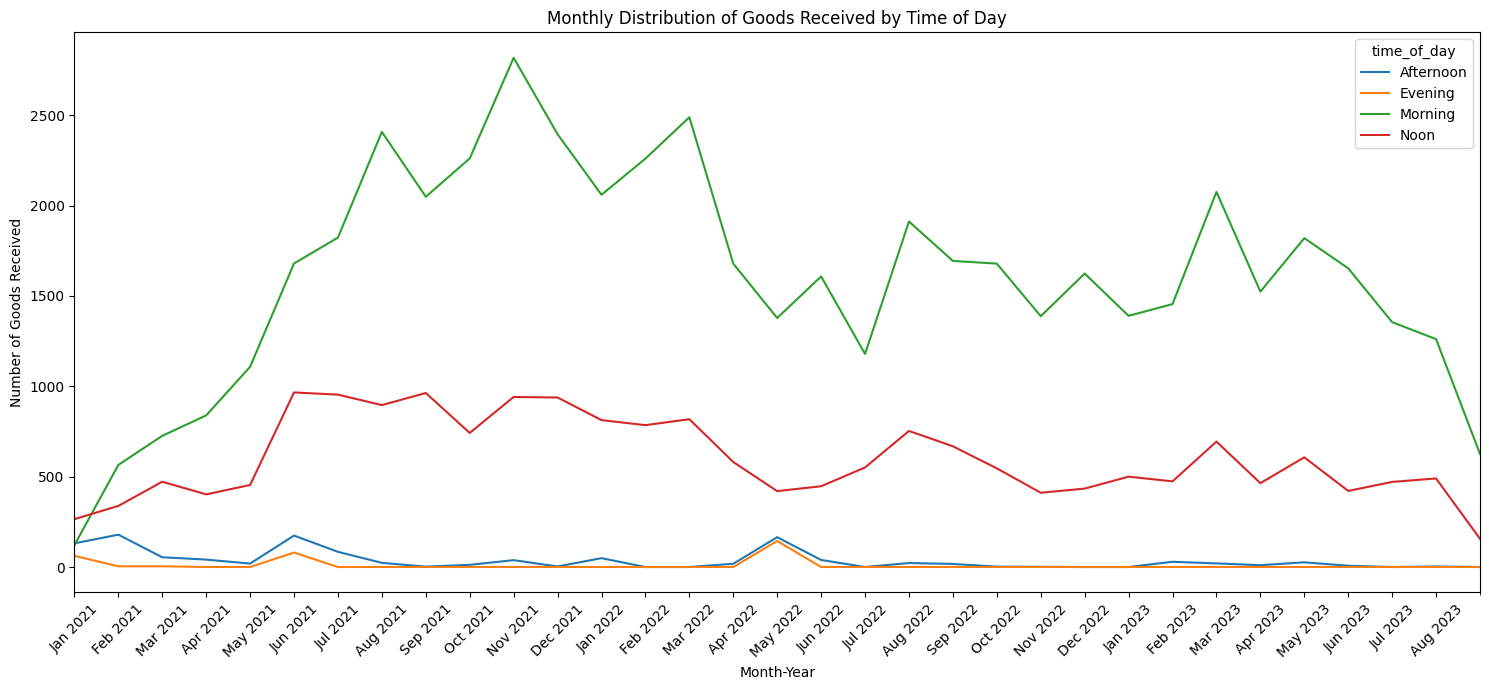

In [126]:

df['transaction_date'] = pd.to_datetime(df['transaction_date'])

def categorize_time_of_day(time):
    if 6 <= time.hour < 12:
        return 'Morning'
    elif 12 <= time.hour < 15:
        return 'Noon'
    elif 15 <= time.hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df['time_of_day'] = df['transaction_date'].dt.time.apply(categorize_time_of_day)

grouped = df.groupby([df['transaction_date'].dt.to_period('M'), 'time_of_day']).size().reset_index(name='count')
pivot_df = grouped.pivot(index='transaction_date', columns='time_of_day', values='count').fillna(0)

fig, ax = plt.subplots(figsize=(15, 7))
pivot_df.plot(kind='line', ax=ax)

ax.set_xticks(pd.date_range('2021-01-01', '2023-09-01', freq='M'))
ax.set_xticklabels([d.strftime('%b %Y') for d in pd.date_range('2021-01-01', '2023-09-01', freq='M')])

ax.set_title('Monthly Distribution of Goods Received by Time of Day')
ax.set_xlabel('Month-Year')
ax.set_ylabel('Number of Goods Received')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Daytime analytics -> Outgoing Deliveries

In [127]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
from calendar import month_abbr


df_shipping['transaction_date'] = pd.to_datetime(df_shipping['transaction_date'])

def categorize_time_of_day(time):
    if 6 <= time.hour < 12:
        return 'Morning'
    elif 12 <= time.hour < 15:
        return 'Noon'
    elif 15 <= time.hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df_shipping['time_of_day'] = df_shipping['transaction_date'].dt.time.apply(categorize_time_of_day)
df_shipping['day_of_week'] = df_shipping['transaction_date'].dt.day_name()
df_shipping['year'] = df_shipping['transaction_date'].dt.year
df_shipping['month'] = df_shipping['transaction_date'].dt.month

grouped = df_shipping.groupby(['year', 'month', 'time_of_day', 'day_of_week']).size().reset_index(name='count')

fig = make_subplots(rows=11, cols=3, subplot_titles=[f"{month_abbr[m]} {y}" for y in range(2021, 2024) for m in range(1, 13) if not (y == 2023 and m > 9)])

time_of_day_categories = ['Morning', 'Noon', 'Afternoon', 'Evening']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, (year, month) in enumerate([(y, m) for y in range(2021, 2024) for m in range(1, 13)]):
    if year == 2023 and month > 9:
        break
    
    monthly_data = grouped[(grouped['year'] == year) & (grouped['month'] == month)]

    if not monthly_data.empty:
        pivot_df = monthly_data.pivot(index='day_of_week', columns='time_of_day', values='count').reindex(day_order, columns=time_of_day_categories).fillna(0)

        for time_category in time_of_day_categories:
            if time_category not in pivot_df.columns:
                pivot_df[time_category] = 0

        row = (i // 3) + 1
        col = (i % 3) + 1

        for time_category in time_of_day_categories:
            fig.add_trace(
                go.Scatter(x=pivot_df.index, y=pivot_df[time_category], mode='lines', name=time_category),
                row=row, col=col
            )

fig.update_layout(height=4000, width=1200, title_text="Monthly Shipment Analysis", showlegend=True)
fig.update_xaxes(title_text="Day of Week")
fig.update_yaxes(title_text="Number of Goods Shipped")

fig.show()


In [128]:
import plotly.graph_objects as go


df_shipping['transaction_date'] = pd.to_datetime(df_shipping['transaction_date'])

def categorize_time_of_day(time):
    if 6 <= time.hour < 12:
        return 'Morning'
    elif 12 <= time.hour < 15:
        return 'Noon'
    elif 15 <= time.hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df_shipping['time_of_day'] = df_shipping['transaction_date'].dt.time.apply(categorize_time_of_day)

grouped = df_shipping.groupby([df_shipping['transaction_date'].dt.to_period('M'), 'time_of_day']).size().reset_index(name='count')
pivot_df_shipping = grouped.pivot(index='transaction_date', columns='time_of_day', values='count').fillna(0)

fig = go.Figure()

for col in pivot_df_shipping.columns:
    fig.add_trace(go.Scatter(x=pivot_df_shipping.index.astype(str), y=pivot_df_shipping[col], mode='lines', name=col))

fig.update_layout(
    title='Monthly Distribution of Goods Shipped by Time of Day',
    xaxis_title='Month-Year',
    yaxis_title='Number of Goods Shipped',
    xaxis=dict(
        tickmode='array',
        tickvals=[d.strftime('%Y-%m') for d in pd.date_range('2021-01-01', '2023-09-01', freq='M')],
        ticktext=[d.strftime('%b %Y') for d in pd.date_range('2021-01-01', '2023-09-01', freq='M')]
    ),
    showlegend=True
)

fig.show()


### Daytime analysis at SKU level for Shipping

In [129]:
time_of_day_categories = ['Morning', 'Noon', 'Afternoon', 'Evening']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

grouped = df_shipping.groupby(['year', 'month', 'item_number', 'day_of_week', 'time_of_day']).size().reset_index(name='count')

pivot_df = grouped.pivot_table(index=['year', 'month', 'item_number'], 
                               columns=['day_of_week', 'time_of_day'], 
                               values='count', 
                               fill_value=0)

pivot_df = pivot_df.reindex(columns=pd.MultiIndex.from_product([day_order, time_of_day_categories]))

pivot_df.columns = ['_'.join(col).strip() for col in pivot_df.columns.values]

pivot_df.reset_index(inplace=True)

pivot_df['month_year'] = pivot_df.apply(lambda x: f"{x['year']}-{x['month']:02d}", axis=1)

pivot_df.drop(['year', 'month'], axis=1, inplace=True)

column_order = ['month_year', 'item_number'] + [col for col in pivot_df.columns if col not in ['month_year', 'item_number']]
pivot_df = pivot_df[column_order]

print(pivot_df.head())

pivot_df.to_csv('output_data/shipment_analysis.csv', index=False)



  month_year     item_number  Monday_Morning  Monday_Noon  Monday_Afternoon  \
0    2021-01  08-105-085-057             2.0          0.0               0.0   
1    2021-01          104313             0.0          0.0               0.0   
2    2021-01          115113             0.0          0.0               0.0   
3    2021-01          115115             0.0          0.0               0.0   
4    2021-01          115123             0.0          0.0               0.0   

   Monday_Evening  Tuesday_Morning  Tuesday_Noon  Tuesday_Afternoon  \
0             0.0              0.0           0.0                0.0   
1             0.0              0.0           0.0                0.0   
2             0.0              0.0           0.0                0.0   
3             0.0              0.0           0.0                0.0   
4             0.0              0.0           0.0                0.0   

   Tuesday_Evening  ...  Thursday_Afternoon  Thursday_Evening  Friday_Morning  \
0              0.

### Daytime analysis at SKU level for Receiving


In [130]:
time_of_day_categories_receiving = ['Morning', 'Noon', 'Afternoon', 'Evening']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

grouped_df_receiving = df.groupby(['year', 'month', 'item_number', 'day_of_week', 'time_of_day']).size().reset_index(name='count')

pivot_df_receiving = grouped_df_receiving.pivot_table(index=['year', 'month', 'item_number'], 
                               columns=['day_of_week', 'time_of_day'], 
                               values='count', 
                               fill_value=0)

pivot_df_receiving = pivot_df_receiving.reindex(columns=pd.MultiIndex.from_product([day_order, time_of_day_categories_receiving]))

pivot_df_receiving.columns = ['_'.join(col).strip() for col in pivot_df_receiving.columns.values]

pivot_df_receiving.reset_index(inplace=True)

pivot_df_receiving['month_year'] = pivot_df_receiving.apply(lambda x: f"{x['year']}-{x['month']:02d}", axis=1)

pivot_df_receiving.drop(['year', 'month'], axis=1, inplace=True)

column_order = ['month_year', 'item_number'] + [col for col in pivot_df_receiving.columns if col not in ['month_year', 'item_number']]
pivot_df_receiving = pivot_df_receiving[column_order]

print(pivot_df_receiving.head())

pivot_df_receiving.to_csv('output_data/receiving_analysis.csv', index=False)



  month_year     item_number  Monday_Morning  Monday_Noon  Monday_Afternoon  \
0    2021-01  08-105-085-057             1.0          0.0               0.0   
1    2021-01  08-111-626-501             0.0          0.0               0.0   
2    2021-01        103357LF             0.0          0.0               0.0   
3    2021-01          103400             0.0          0.0               0.0   
4    2021-01        103401LF             0.0          0.0               0.0   

   Monday_Evening  Tuesday_Morning  Tuesday_Noon  Tuesday_Afternoon  \
0             0.0              0.0           0.0                0.0   
1             0.0              0.0           2.0                0.0   
2             2.0              0.0           0.0                0.0   
3            18.0              0.0           0.0                0.0   
4             2.0              0.0           0.0                0.0   

   Tuesday_Evening  ...  Thursday_Afternoon  Thursday_Evening  Friday_Morning  \
0              0.

In [131]:
df_shipping.head()

,transaction_date,user_id,item,item_number,Quantity,destination_lpn,destination_sub_lpn,destination_location,destination_area,source_area,activity,operation,year,first_year,year_quarter,quarter,year_month,month,time_of_day,day_of_week
0,2023-09-07 13:34:24,10551272,,P79025,32,536491,LPN0000000223884,TRL0705698,SSTG,SSTG,Trailer load,,2023,2021.0,2023 Q3,3,2023-09,9,Noon,Thursday
1,2023-09-07 13:34:24,10551272,,188711,1,536515,LPN0000000117952,TRL0705698,SSTG,SSTG,Trailer load,,2023,2021.0,2023 Q3,3,2023-09,9,Noon,Thursday
2,2023-09-07 13:34:24,10551272,,P79025,35,536491,S00000012D8K,TRL0705698,SSTG,SSTG,Trailer load,,2023,2021.0,2023 Q3,3,2023-09,9,Noon,Thursday
3,2023-09-07 13:34:24,10551272,,903576,1,L0000000JY7I,LPN0000000116469,TRL0705698,SSTG,SSTG,Trailer load,,2023,2021.0,2023 Q3,3,2023-09,9,Noon,Thursday
4,2023-09-07 13:34:24,10551272,,903576,43,L0000000JY7I,LPN0000000116291,TRL0705698,SSTG,SSTG,Trailer load,,2023,2021.0,2023 Q3,3,2023-09,9,Noon,Thursday


Distribution of the number of all warehouse receipts and issues over the days of the week

In [132]:
def calculate_weekday_counts(dataframe):
    dataframe['transaction_date'] = pd.to_datetime(dataframe['transaction_date'])
    dataframe['weekday'] = dataframe['transaction_date'].dt.day_name()
    dataframe['month'] = dataframe['transaction_date'].dt.to_period('M')

    count_by_weekday = dataframe.groupby(['month', 'weekday']).size().unstack(fill_value=0)

    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    count_by_weekday = count_by_weekday[weekday_order]

    return count_by_weekday

df_weekday_counts = calculate_weekday_counts(df)

df_shipping_weekday_counts = calculate_weekday_counts(df_shipping)

df_weekday_counts


weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
month,,,,,,
2021-01,133,65,67,61,252,1
2021-02,168,297,240,236,145,0
2021-03,322,193,421,162,158,0
2021-04,187,362,277,360,96,0
2021-05,346,354,291,310,280,0
2021-06,559,682,607,540,512,0
2021-07,384,478,548,728,510,213
2021-08,776,801,573,549,612,16
2021-09,551,618,596,604,509,136


In [133]:
df_shipping_weekday_counts

weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
month,,,,,,
2021-01,6,6,32,28,26,4
2021-02,37,188,252,375,324,0
2021-03,302,416,412,288,354,0
2021-04,299,452,339,413,313,0
2021-05,387,465,460,446,428,0
2021-06,1141,1398,1366,841,980,0
2021-07,880,1395,1496,1572,1285,0
2021-08,1778,1690,1549,1550,1473,169
2021-09,1248,1664,2043,2056,1778,0


In the next step, we divided the months into weeks to see in which week and weekday most deliveries take place

In [134]:
def calculate_weekday_counts_by_week(dataframe):
    dataframe['transaction_date'] = pd.to_datetime(dataframe['transaction_date'])

    dataframe['week_of_month'] = dataframe['transaction_date'].dt.isocalendar().week - \
                                 dataframe['transaction_date'].dt.isocalendar().week.groupby(dataframe['transaction_date'].dt.to_period('M')).transform('min') + 1

    dataframe['weekday'] = dataframe['transaction_date'].dt.day_name()

    count_by_weekday = dataframe.groupby([dataframe['transaction_date'].dt.to_period('M'), 'week_of_month', 'weekday']).size().unstack(fill_value=0)

    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    count_by_weekday = count_by_weekday[weekday_order]

    return count_by_weekday

df_weekday_counts_by_week = calculate_weekday_counts_by_week(df)

df_shipping_weekday_counts_by_week = calculate_weekday_counts_by_week(df_shipping)

df_weekday_counts_by_week.head(15)

weekday                         Monday  Tuesday  Wednesday  Thursday  Friday  \
transaction_date week_of_month                                                 
2021-01          1                   0        0          0         0       0   
                 2                   1       12          9        61     127   
                 3                 132       53         58         0     125   
2021-02          1                  27       94          4        15       0   
                 2                  30       71         35        19       0   
                 3                 104       32        127       116     101   
                 4                   7      100         74        86      44   
2021-03          1                  59        9         44        40      25   
                 2                  90       35          1        21      19   
                 3                  81       34        103        73      66   
                 4                  49       28        151        28      48   
                 5                  43       87        122         0       0   
2021-04          1                   0        0          0        73       0   
                 2                 107      128        173       114      69   
                 3                  43       99         42        62       1   

weekday                         Saturday  
transaction_date week_of_month            
2021-01          1                     1  
                 2                     0  
                 3                     0  
2021-02          1                     0  
                 2                     0  
                 3                     0  
                 4                     0  
2021-03          1                     0  
                 2                     0  
                 3                     0  
                 4                     0  
                 5                     0  
2021-04          1                     0  
                 2                     0  
                 3                     0

In [135]:
df_shipping_weekday_counts_by_week.head(15) 

weekday                         Monday  Tuesday  Wednesday  Thursday  Friday  \
transaction_date week_of_month                                                 
2021-01          1                   0        0          0         0       0   
                 2                   6        4          0         0       0   
                 3                   0        2         32        28      26   
2021-02          1                   0       54          0         2       2   
                 2                   0       81         75       144       0   
                 3                  37       28        121       123       0   
                 4                   0       25         56       106     322   
2021-03          1                  73       82         47        95      87   
                 2                  89      102         59        77      90   
                 3                  31       72         76        63      74   
                 4                  77       89        108        53     103   
                 5                  32       71        122         0       0   
2021-04          1                   0        0          0        33       0   
                 2                  69      144         93        90     133   
                 3                  69       86        130        65      69   

weekday                         Saturday  
transaction_date week_of_month            
2021-01          1                     4  
                 2                     0  
                 3                     0  
2021-02          1                     0  
                 2                     0  
                 3                     0  
                 4                     0  
2021-03          1                     0  
                 2                     0  
                 3                     0  
                 4                     0  
                 5                     0  
2021-04          1                     0  
                 2                     0  
                 3                     0

In [136]:
total_shipments_per_week = df_weekday_counts_by_week.sum(axis=1)

busiest_week = total_shipments_per_week.idxmax()

total_shipments_per_weekday = df_weekday_counts_by_week.sum()

busiest_weekday = total_shipments_per_weekday.idxmax()

total_shipments_per_month = df_weekday_counts_by_week.groupby(level=0).sum().sum(axis=1)

busiest_month = total_shipments_per_month.idxmax()

analysis_results = {
    "Busiest Week of Month": busiest_week,
    "Busiest Weekday": busiest_weekday,
    "Busiest Month": busiest_month
}

analysis_results

{'Busiest Week of Month': (Period('2021-11', 'M'), 1),
 'Busiest Weekday': 'Thursday',
 'Busiest Month': Period('2021-11', 'M')}

In [137]:
top_15_busiest_weeks = total_shipments_per_week.sort_values(ascending=False).head(15)

top_4_busiest_months_overall = total_shipments_per_month.sort_values(ascending=False).head(4)


total_shipments_2021 = df_weekday_counts_by_week[df_weekday_counts_by_week.index.get_level_values(0).year == 2021]
total_shipments_per_month_2021 = total_shipments_2021.groupby(level=0).sum().sum(axis=1)

total_shipments_2022 = df_weekday_counts_by_week[df_weekday_counts_by_week.index.get_level_values(0).year == 2022]
total_shipments_per_month_2022 = total_shipments_2022.groupby(level=0).sum().sum(axis=1)

total_shipments_2023 = df_weekday_counts_by_week[df_weekday_counts_by_week.index.get_level_values(0).year == 2023]
total_shipments_per_month_2023 = total_shipments_2023.groupby(level=0).sum().sum(axis=1)

top_4_busiest_months_2021 = total_shipments_per_month_2021.sort_values(ascending=False).head(4)
top_4_busiest_months_2022 = total_shipments_per_month_2022.sort_values(ascending=False).head(4)
top_4_busiest_months_2023 = total_shipments_per_month_2023.sort_values(ascending=False).head(4)

top_weeks_months_results = {
    "Top 15 Busiest Weeks": top_15_busiest_weeks,
    "Top 4 Busiest Months (Overall)": top_4_busiest_months_overall,
    "Top 4 Busiest Months (2021)": top_4_busiest_months_2021,
    "Top 4 Busiest Months (2022)": top_4_busiest_months_2022,
    "Top 4 Busiest Months (2023)": top_4_busiest_months_2023
}

top_weeks_months_results



{'Top 15 Busiest Weeks': transaction_date  week_of_month
 2021-11           1                1306
                   2                1286
 2022-03           4                1106
 2021-12           3                1015
 2021-10           4                 976
                   2                 962
 2021-07           2                 890
 2022-02           4                 887
 2021-12           2                 879
 2022-04           4                 849
 2023-03           4                 841
 2022-05           3                 832
 2021-07           4                 827
 2021-08           1                 818
 2022-02           3                 797
 dtype: int64,
 'Top 4 Busiest Months (Overall)': transaction_date
 2021-11    3797
 2021-12    3336
 2021-08    3327
 2022-03    3307
 Freq: M, dtype: int64,
 'Top 4 Busiest Months (2021)': transaction_date
 2021-11    3797
 2021-12    3336
 2021-08    3327
 2021-10    3015
 Freq: M, dtype: int64,
 'Top 4 Busiest Months (2022

In [138]:
total_shipments_per_week = df_shipping_weekday_counts_by_week.sum(axis=1)

busiest_week = total_shipments_per_week.idxmax()

total_shipments_per_weekday = df_shipping_weekday_counts_by_week.sum()

busiest_weekday = total_shipments_per_weekday.idxmax()

total_shipments_per_month = df_shipping_weekday_counts_by_week.groupby(level=0).sum().sum(axis=1)

busiest_month = total_shipments_per_month.idxmax()

analysis_results = {
    "Busiest Week of Month": busiest_week,
    "Busiest Weekday": busiest_weekday,
    "Busiest Month": busiest_month
}

analysis_results

{'Busiest Week of Month': (Period('2021-08', 'M'), 1),
 'Busiest Weekday': 'Wednesday',
 'Busiest Month': Period('2021-09', 'M')}

In [139]:
top_15_busiest_weeks = total_shipments_per_week.sort_values(ascending=False).head(15)

top_4_busiest_months_overall = total_shipments_per_month.sort_values(ascending=False).head(4)


total_shipments_2021 = df_weekday_counts_by_week[df_weekday_counts_by_week.index.get_level_values(0).year == 2021]
total_shipments_per_month_2021 = total_shipments_2021.groupby(level=0).sum().sum(axis=1)

total_shipments_2022 = df_weekday_counts_by_week[df_weekday_counts_by_week.index.get_level_values(0).year == 2022]
total_shipments_per_month_2022 = total_shipments_2022.groupby(level=0).sum().sum(axis=1)

total_shipments_2023 = df_weekday_counts_by_week[df_weekday_counts_by_week.index.get_level_values(0).year == 2023]
total_shipments_per_month_2023 = total_shipments_2023.groupby(level=0).sum().sum(axis=1)

top_4_busiest_months_2021 = total_shipments_per_month_2021.sort_values(ascending=False).head(4)
top_4_busiest_months_2022 = total_shipments_per_month_2022.sort_values(ascending=False).head(4)
top_4_busiest_months_2023 = total_shipments_per_month_2023.sort_values(ascending=False).head(4)

top_weeks_months_results = {
    "Top 15 Busiest Weeks": top_15_busiest_weeks,
    "Top 4 Busiest Months (Overall)": top_4_busiest_months_overall,
    "Top 4 Busiest Months (2021)": top_4_busiest_months_2021,
    "Top 4 Busiest Months (2022)": top_4_busiest_months_2022,
    "Top 4 Busiest Months (2023)": top_4_busiest_months_2023
}

top_weeks_months_results

{'Top 15 Busiest Weeks': transaction_date  week_of_month
 2021-08           1                2207
 2021-09           4                2178
 2021-08           4                2006
 2021-09           5                1914
 2021-10           2                1814
 2021-08           3                1812
 2021-09           3                1787
 2021-07           5                1763
                   3                1687
 2021-09           2                1626
 2021-07           4                1612
 2021-08           2                1564
 2021-10           4                1472
                   3                1458
 2021-06           4                1454
 dtype: int64,
 'Top 4 Busiest Months (Overall)': transaction_date
 2021-09    8789
 2021-08    8209
 2021-07    6628
 2021-06    5726
 Freq: M, dtype: int64,
 'Top 4 Busiest Months (2021)': transaction_date
 2021-11    3797
 2021-12    3336
 2021-08    3327
 2021-10    3015
 Freq: M, dtype: int64,
 'Top 4 Busiest Months (2022

In [140]:
day_of_week_trends = df_weekday_counts_by_week.sum().sort_values(ascending=False)


seasonal_variations = df_weekday_counts_by_week.groupby(level=0).sum().sum(axis=1).sort_values(ascending=False)

trends_results = {
    "Day of the Week Trends": day_of_week_trends,
    "Seasonal Variations": seasonal_variations
}

trends_results

{'Day of the Week Trends': weekday
 Thursday     15594
 Tuesday      15396
 Wednesday    14977
 Monday       13390
 Friday       13045
 Saturday      1798
 dtype: int64,
 'Seasonal Variations': transaction_date
 2021-11    3797
 2021-12    3336
 2021-08    3327
 2022-03    3307
 2022-02    3045
 2021-10    3015
 2021-09    3014
 2022-01    2922
 2021-06    2900
 2021-07    2861
 2023-03    2790
 2022-08    2687
 2023-05    2453
 2022-09    2379
 2022-04    2278
 2022-10    2227
 2022-05    2107
 2022-06    2094
 2023-06    2081
 2022-12    2058
 2023-04    1998
 2023-02    1958
 2023-01    1890
 2023-07    1826
 2022-11    1800
 2023-08    1754
 2022-07    1730
 2021-05    1581
 2021-04    1282
 2021-03    1256
 2021-02    1086
 2023-09     782
 2021-01     579
 Freq: M, dtype: int64}

In [141]:
monthly_averages = df_weekday_counts_by_week.groupby(level=0).sum().mean(axis=1)

weekly_totals_2021 = df_weekday_counts_by_week.sum(axis=1)

anomalies = weekly_totals_2021[weekly_totals_2021.apply(lambda x: any(abs(x - monthly_averages) > monthly_averages.std()))]

anomalies_results = {
    "Potential Anomalies (2021)": anomalies,
    "Monthly Averages": monthly_averages
}

anomalies_results

{'Potential Anomalies (2021)': transaction_date  week_of_month
 2021-01           1                  1
                   2                210
                   3                368
 2021-02           1                140
                   2                155
                                   ... 
 2023-08           2                716
                   3                315
                   5                417
 2023-09           1                262
                   2                520
 Length: 156, dtype: int64,
 'Monthly Averages': transaction_date
 2021-01     96.500000
 2021-02    181.000000
 2021-03    209.333333
 2021-04    213.666667
 2021-05    263.500000
 2021-06    483.333333
 2021-07    476.833333
 2021-08    554.500000
 2021-09    502.333333
 2021-10    502.500000
 2021-11    632.833333
 2021-12    556.000000
 2022-01    487.000000
 2022-02    507.500000
 2022-03    551.166667
 2022-04    379.666667
 2022-05    351.166667
 2022-06    349.000000
 2022-07    288.3

In [142]:
monthly_averages

transaction_date
2021-01     96.500000
2021-02    181.000000
2021-03    209.333333
2021-04    213.666667
2021-05    263.500000
2021-06    483.333333
2021-07    476.833333
2021-08    554.500000
2021-09    502.333333
2021-10    502.500000
2021-11    632.833333
2021-12    556.000000
2022-01    487.000000
2022-02    507.500000
2022-03    551.166667
2022-04    379.666667
2022-05    351.166667
2022-06    349.000000
2022-07    288.333333
2022-08    447.833333
2022-09    396.500000
2022-10    371.166667
2022-11    300.000000
2022-12    343.000000
2023-01    315.000000
2023-02    326.333333
2023-03    465.000000
2023-04    333.000000
2023-05    408.833333
2023-06    346.833333
2023-07    304.333333
2023-08    292.333333
2023-09    130.333333
Freq: M, dtype: float64

In [143]:
import plotly.graph_objects as go
import pandas as pd


def year_over_year_weekly_comparison(df_weekday_counts_by_week):
  
    total_weekly_shipments = df_weekday_counts_by_week.sum(axis=1)

    yearly_comparison = total_weekly_shipments.unstack(level=0)

    return yearly_comparison

yearly_comparison = year_over_year_weekly_comparison(df_weekday_counts_by_week)

fig = go.Figure()

for year in yearly_comparison.columns:
    fig.add_trace(go.Scatter(x=yearly_comparison.index, y=yearly_comparison[year], mode='lines', name=str(year)))

fig.update_layout(
    title='Year-over-Year Weekly Comparison of Shipments',
    xaxis_title='Week',
    yaxis_title='Total Weekly Shipments',
    showlegend=True
)

fig.show()




In [144]:
def identify_weekly_anomalies(df_weekday_counts_by_week):
    total_weekly_shipments = df_weekday_counts_by_week.sum(axis=1)

    monthly_means = total_weekly_shipments.groupby(level=0).mean()
    monthly_std = total_weekly_shipments.groupby(level=0).std()

    anomalies = total_weekly_shipments.groupby(level=0).apply(lambda x: x[(abs(x - monthly_means[x.name]) > monthly_std[x.name])])

    return anomalies

weekly_anomalies = identify_weekly_anomalies(df_weekday_counts_by_week)
weekly_anomalies


transaction_date  transaction_date  week_of_month
2021-01           2021-01           1                   1
2021-02           2021-02           3                 480
2021-03           2021-03           2                 166
                                    3                 357
2021-04           2021-04           2                 591
2021-05           2021-05           1                 148
2021-06           2021-06           3                 763
                                    5                 466
2021-07           2021-07           1                 142
                                    2                 890
2021-08           2021-08           5                 304
2021-09           2021-09           4                 778
2021-10           2021-10           5                  23
2021-11           2021-11           1                1306
                                    2                1286
                                    5                 164
2021-12           2021

In [145]:
def year_over_year_weekly_comparison(df_shipping_weekday_counts_by_week):
  
    total_weekly_shipments = df_shipping_weekday_counts_by_week.sum(axis=1)

    yearly_comparison = total_weekly_shipments.unstack(level=0)

    return yearly_comparison

yearly_comparison = year_over_year_weekly_comparison(df_shipping_weekday_counts_by_week)

fig = go.Figure()

for year in yearly_comparison.columns:
    fig.add_trace(go.Scatter(x=yearly_comparison.index, y=yearly_comparison[year], mode='lines', name=str(year)))

fig.update_layout(
    title='Year-over-Year Weekly Comparison of Shipments',
    xaxis_title='Week',
    yaxis_title='Total Weekly Shipments',
    showlegend=True
)

fig.show()

In [146]:
def identify_weekly_anomalies(df_shipping_weekday_counts_by_week):
    total_weekly_shipments = df_shipping_weekday_counts_by_week.sum(axis=1)

    monthly_means = total_weekly_shipments.groupby(level=0).mean()
    monthly_std = total_weekly_shipments.groupby(level=0).std()

    anomalies = total_weekly_shipments.groupby(level=0).apply(lambda x: x[(abs(x - monthly_means[x.name]) > monthly_std[x.name])])

    return anomalies

weekly_anomalies = identify_weekly_anomalies(df_shipping_weekday_counts_by_week)
weekly_anomalies

transaction_date  transaction_date  week_of_month
2021-01           2021-01           3                  88
2021-02           2021-02           1                  58
                                    4                 509
2021-03           2021-03           5                 225
2021-04           2021-04           1                  33
2021-05           2021-05           4                 759
2021-06           2021-06           1                 683
2021-07           2021-07           1                 194
2021-08           2021-08           5                 620
2021-09           2021-09           1                1284
                                    4                2178
2021-10           2021-10           1                 442
2021-11           2021-11           5                 339
2021-12           2021-12           1                 478
2022-01           2022-01           5                 137
2022-02           2022-02           5                 130
2022-03           2022

In [147]:
weekly_totals = df_weekday_counts_by_week.sum(axis=1)

monthly_mean = weekly_totals.groupby(level=0).mean()
monthly_std = weekly_totals.groupby(level=0).std()

consistency_across_weeks = pd.DataFrame({'Mean Shipments': monthly_mean, 'Standard Deviation': monthly_std})


first_weeks = weekly_totals[weekly_totals.index.get_level_values('week_of_month') == 1]
last_weeks = weekly_totals.groupby(level=0).nth(-1)

month_beginning_end_peaks = pd.DataFrame({'First Week Shipments': first_weeks, 'Last Week Shipments': last_weeks})

consistency_across_weeks, month_beginning_end_peaks

(                  Mean Shipments  Standard Deviation
 transaction_date                                    
 2021-01                   193.00          184.089652
 2021-02                   271.50          159.056594
 2021-03                   251.20           81.772245
 2021-04                   256.40          197.331700
 2021-05                   395.25          169.990931
 2021-06                   580.00          113.633182
 2021-07                   572.20          301.733657
 2021-08                   665.40          208.424567
 2021-09                   602.80          127.670278
 2021-10                   603.00          430.978538
 2021-11                   759.40          521.452587
 2021-12                   667.20          277.721443
 2022-01                   584.40          207.453127
 2022-02                   609.00          318.035375
 2022-03                   661.40          251.733589
 2022-04                   569.50          330.242840
 2022-05                   4

In [148]:
weekly_totals = df_shipping_weekday_counts_by_week.sum(axis=1)

monthly_mean = weekly_totals.groupby(level=0).mean()
monthly_std = weekly_totals.groupby(level=0).std()

consistency_across_weeks = pd.DataFrame({'Mean Shipments': monthly_mean, 'Standard Deviation': monthly_std})


first_weeks = weekly_totals[weekly_totals.index.get_level_values('week_of_month') == 1]
last_weeks = weekly_totals.groupby(level=0).nth(-1)

month_beginning_end_peaks = pd.DataFrame({'First Week Shipments': first_weeks, 'Last Week Shipments': last_weeks})

consistency_across_weeks, month_beginning_end_peaks

(                  Mean Shipments  Standard Deviation
 transaction_date                                    
 2021-01                    34.00           46.861498
 2021-02                   294.00          184.555321
 2021-03                   354.40           84.748451
 2021-04                   363.20          192.297166
 2021-05                   546.50          152.369069
 2021-06                  1145.20          350.065280
 2021-07                  1325.60          649.350676
 2021-08                  1641.80          618.706069
 2021-09                  1757.80          333.045342
 2021-10                  1296.50          592.975266
 2021-11                   797.20          338.240595
 2021-12                   742.80          186.809261
 2022-01                   575.40          260.688128
 2022-02                   653.00          311.196080
 2022-03                   884.60          132.260349
 2022-04                   482.25          233.114242
 2022-05                   4

#### Months with High Mean Shipments (Potentially Good Months):
- June: It has the highest mean shipments of 580, indicating a strong performance in terms of shipment quantity.
- July: With a mean shipments of 572.20, July also performs well in terms of shipment quantity.
- November: It has a mean shipments of 632.83, making it one of the highest performing months.



#### Months with Low Mean Shipments (Potentially Challenging Months):
- September: It has a mean shipments of 502.33, which is lower compared to some other months.
- October: Similar to September, October has a mean shipments of 502.50, which is lower than peak months.



#### Months with High Variability (Potentially Unpredictable Months):
- November: While it has high mean shipments, it also has a relatively high standard deviation, suggesting some degree of variability.
- July: Despite high mean shipments, July has a notable standard deviation, indicating variability.



#### Months with Low Variability (Potentially Stable Months):
- May: It has a mean shipments of 395.25 and a relatively low standard deviation, suggesting stability in shipment quantities.
- February: With a mean shipments of 391.60 and a low standard deviation, February is also relatively stable.


In [149]:
import plotly.graph_objects as go
import pandas as pd

def plot_weekday_counts_plotly(df, title):
    df_plot = df.copy()
    df_plot.index = df_plot.index.to_series().astype(str)

    fig = go.Figure()

    for day in df_plot.columns:
        fig.add_trace(go.Scatter(x=df_plot.index, y=df_plot[day], mode='lines+markers', name=day))

    fig.update_layout(
        title=title,
        xaxis_title='Month',
        yaxis_title='Number of Shipments',
        showlegend=True,
        xaxis=dict(tickangle=45)
    )

    fig.show()

plot_weekday_counts_plotly(df_weekday_counts, 'Item Numbers Arriving Each Weekday')
plot_weekday_counts_plotly(df_shipping_weekday_counts, 'Item Numbers Shipped Each Weekday')




In [150]:
def plot_weekday_counts_interactive_plotly(df, title):
    df_plot = df.copy()
    df_plot.index = df_plot.index.to_series().astype(str)

    fig = go.Figure()

    for day in df_plot.columns:
        fig.add_trace(go.Scatter(x=df_plot.index, y=df_plot[day], mode='lines+markers', name=day))

    fig.update_layout(
        title=title,
        xaxis_title='Month',
        yaxis_title='Number of Shipments',
        showlegend=True,
        xaxis=dict(tickangle=45),
        hovermode='x'
    )

    fig.show()

plot_weekday_counts_interactive_plotly(df_weekday_counts, 'Item Numbers Arriving Each Weekday (df)')
plot_weekday_counts_interactive_plotly(df_shipping_weekday_counts, 'Item Numbers Arriving Each Weekday (df_shipping)')



In [151]:
df_shipping['transaction_date'] = pd.to_datetime(df_shipping['transaction_date'])

df_shipping['hour'] = df_shipping['transaction_date'].dt.hour

hourly_shipments = df_shipping.groupby('hour').size()

peak_hours = hourly_shipments.sort_values(ascending=False)

print(peak_hours)

hour
6     21659
7     14895
11    14142
10    13049
9     12481
8      9533
5      8153
12     7880
13     7080
14     1518
4       406
16      264
15      259
21      182
19       82
3        40
17        4
dtype: int64


In [152]:
sorted_hourly_shipments = hourly_shipments.sort_index()

fig = go.Figure(data=[
    go.Bar(x=sorted_hourly_shipments.index, y=sorted_hourly_shipments.values, marker_color='#004499')
])

fig.update_layout(
    title='Hourly Distribution of Shipments',
    xaxis=dict(
        title='Hour of the Day (0-23)',
        tickmode='array',
        tickvals=list(range(0, 24))
    ),
    yaxis=dict(
        title='Number of Shipments'
    ),
    showlegend=False
)

fig.show()


In [153]:
import plotly.graph_objects as go
import pandas as pd

df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['hour'] = df['transaction_date'].dt.hour
hourly_shipments = df.groupby('hour').size()
sorted_hourly_shipments = hourly_shipments.sort_index()

fig = go.Figure(data=[
    go.Scatter(x=sorted_hourly_shipments.index, y=sorted_hourly_shipments.values, mode='lines+markers', line_color='#004499')
])

fig.update_layout(
    title='Hourly Distribution of Shipments',
    xaxis=dict(
        title='Hour of the Day (0-23)',
        tickmode='array',
        tickvals=list(range(0, 24))
    ),
    yaxis=dict(
        title='Number of Shipments'
    )
)

fig.show()


In [154]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

df['hour'] = df['transaction_date'].dt.hour

item_hourly_shipments = df.groupby(['item_number', 'hour']).size()

peak_shipment_hours_per_item = item_hourly_shipments.sort_values(ascending=False)

print(peak_shipment_hours_per_item)

item_number  hour
P85287       7       304
P85286       9       275
             7       264
             13      204
P85287       9       201
                    ... 
G10107       11        1
G10115       9         1
G92522       10        1
G92540       13        1
P2002506     7         1
Length: 18661, dtype: int64


In [155]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

df['month'] = df['transaction_date'].dt.month
monthly_hourly_shipments = df.groupby(['month', 'hour']).size()

fig = make_subplots(rows=12, cols=1, subplot_titles=[f'Hourly Distribution of Shipments - Month {i}' for i in range(1, 13)])

for i in range(1, 13):
    monthly_data = monthly_hourly_shipments[i].sort_index()
    fig.add_trace(go.Scatter(x=monthly_data.index, y=monthly_data.values, mode='lines+markers', line_color='#004499'), row=i, col=1)

fig.update_layout(height=4200, width=1400, showlegend=False)
fig.update_xaxes(title_text='Hour of the Day (0-23)', tickmode='array', tickvals=list(range(0, 24)), row=12)
fig.update_yaxes(title_text='Number of Shipments')

# Show plot
fig.show()


Shipping

In [156]:
df_shipping['transaction_date'] = pd.to_datetime(df_shipping['transaction_date'])

df_shipping['hour'] = df_shipping['transaction_date'].dt.hour

hourly_shipments = df_shipping.groupby('hour').size()

peak_hours = hourly_shipments.sort_values(ascending=False)

print(peak_hours)

hour
6     21659
7     14895
11    14142
10    13049
9     12481
8      9533
5      8153
12     7880
13     7080
14     1518
4       406
16      264
15      259
21      182
19       82
3        40
17        4
dtype: int64


In [157]:

sorted_hourly_shipments = hourly_shipments.sort_index()

fig = go.Figure(data=[
    go.Bar(x=sorted_hourly_shipments.index, y=sorted_hourly_shipments.values, marker_color='#004499')
])

fig.update_layout(
    title='Hourly Distribution of Shipments',
    xaxis=dict(
        title='Hour of the Day (0-23)',
        tickmode='array',
        tickvals=list(range(0, 24))  
    ),
    yaxis=dict(
        title='Number of Shipments'
    ),
    showlegend=False
)

fig.show()


In [158]:

df_shipping['transaction_date'] = pd.to_datetime(df_shipping['transaction_date'])
df_shipping['hour'] = df_shipping['transaction_date'].dt.hour
hourly_shipments = df_shipping.groupby('hour').size()
sorted_hourly_shipments = hourly_shipments.sort_index()

fig = go.Figure(data=[
    go.Scatter(x=sorted_hourly_shipments.index, y=sorted_hourly_shipments.values, mode='lines+markers', line_color='#004499', marker=dict(color='#004499'))
])

fig.update_layout(
    title='Hourly Distribution of Shipments',
    xaxis=dict(
        title='Hour of the Day (0-23)',
        tickmode='array',
        tickvals=list(range(0, 24))  
    ),
    yaxis=dict(
        title='Number of Shipments'
    )
)

fig.show()


In [159]:
df_shipping['transaction_date'] = pd.to_datetime(df_shipping['transaction_date'])

df_shipping['hour'] = df_shipping['transaction_date'].dt.hour

item_hourly_shipments = df_shipping.groupby(['item_number', 'hour']).size()

peak_shipment_hours_per_item = item_hourly_shipments.sort_values(ascending=False)

print(peak_shipment_hours_per_item)

peak_shipment_hours_per_item.to_csv('output_data/peak_shipment_hours_per_item.csv', index=True)


item_number     hour
P85286          6       232
P85287          9       221
P85286          12      214
                11      207
P85287          6       203
                       ... 
P6012650        10        1
P2000840        13        1
P6012648        10        1
P6012643        12        1
08-104-599-504  4         1
Length: 19379, dtype: int64


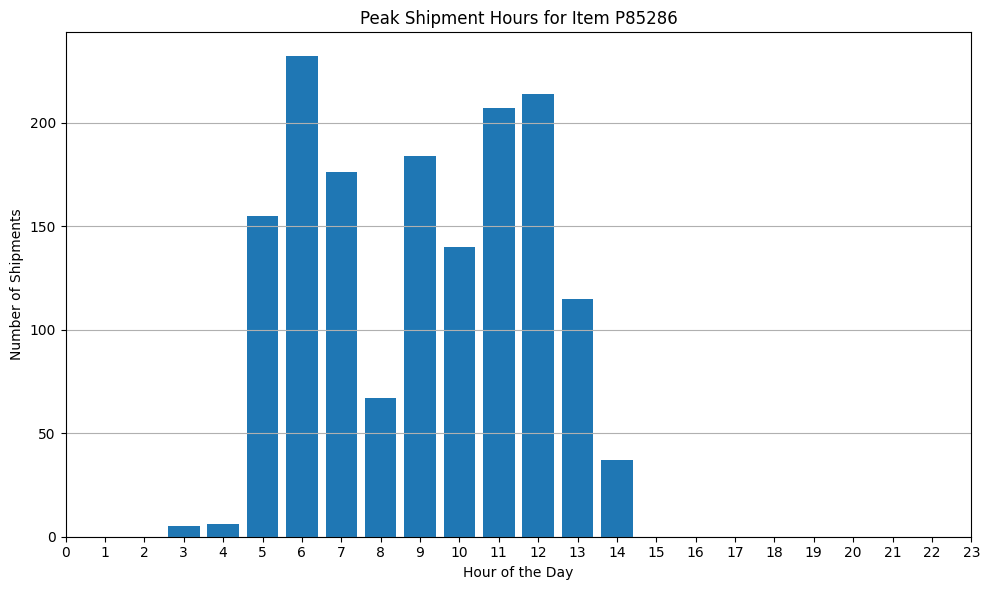

In [160]:
item_P85286 = peak_shipment_hours_per_item.loc['P85286']

plt.figure(figsize=(10, 6))
plt.bar(item_P85286.index, item_P85286.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Shipments')
plt.title('Peak Shipment Hours for Item P85286')
plt.xticks(range(24))  
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [161]:

df_shipping['month'] = df_shipping['transaction_date'].dt.month
monthly_hourly_shipments = df_shipping.groupby(['month', 'hour']).size()

fig = make_subplots(rows=12, cols=1, subplot_titles=[f'Hourly Distribution of Shipments - Month {i}' for i in range(1, 13)])

for i in range(1, 13):
    monthly_data = monthly_hourly_shipments[i].sort_index()
    fig.add_trace(
        go.Scatter(x=monthly_data.index, y=monthly_data.values, mode='lines+markers', line_color='#004499', marker=dict(color='#004499')), 
        row=i, col=1
    )

fig.update_layout(height=4200, width=1400, showlegend=False)
fig.update_xaxes(title_text='Hour of the Day (0-23)', tickmode='array', tickvals=list(range(0, 24)), row=12)
fig.update_yaxes(title_text='Number of Shipments')

fig.show()


In [162]:
df_shipping['transaction_date'] = pd.to_datetime(df_shipping['transaction_date'])

df_shipping['hour'] = df_shipping['transaction_date'].dt.hour

hourly_shipments = df_shipping.groupby('hour').size()


In [163]:
fig = go.Figure(data=[go.Bar(x=hourly_shipments.index + 1, y=hourly_shipments.values, marker_color='#00A0F5')])

fig.update_layout(
    title='Frequency of Shipments by Hour of the Day',
    xaxis=dict(
        title='Hour of the Day',
        tickmode='array',
        tickvals=list(range(1, 25)),  
        showline=True,  
        linecolor='black'
    ),
    yaxis=dict(
        title='Number of Shipments',
        showline=True,  
        linecolor='black'
    ),
    plot_bgcolor='rgba(0,0,0,0)', 
    width=800, 
    height=600   
)

fig.show()

In [164]:

def plot_monthly_shipment_frequency_plotly(df, start_month, end_month):
    df['transaction_date'] = pd.to_datetime(df['transaction_date'])

    for month in pd.date_range(start_month, end_month, freq='MS'):
        df_month = df[(df['transaction_date'] >= month) &
                      (df['transaction_date'] < (month + pd.offsets.MonthBegin(1)))]

        df_grouped = df_month.groupby(df_month['transaction_date'].dt.day).size()

        days_in_month = pd.date_range(month, month + pd.offsets.MonthEnd(1)).day
        df_grouped = df_grouped.reindex(days_in_month, fill_value=0)

        fig = go.Figure(data=[go.Scatter(x=df_grouped.index, y=df_grouped.values, mode='lines+markers', line_color='skyblue')])
        fig.update_layout(
            title=f'Frequency of Shipments in {calendar.month_name[month.month]} {month.year}',
            xaxis_title='Day of Month',
            yaxis_title='Number of Shipments',
            plot_bgcolor='rgba(0,0,0,0)',  
            xaxis=dict(showgrid=False, showline=True, linecolor='black'),  
            yaxis=dict(showgrid=False, showline=True, linecolor='black'), 
            xaxis_zeroline=False,  
            yaxis_zeroline=False,  
        )
        fig.show()

plot_monthly_shipment_frequency_plotly(df_shipping, '2022-09-01', '2023-08-31')

## Palletts


In [165]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df_shipping['transaction_date'] = pd.to_datetime(df_shipping['transaction_date'])
df['year_month'] = df['transaction_date'].dt.to_period('M')
df_shipping['year_month'] = df_shipping['transaction_date'].dt.to_period('M')

common_items = set(df['item_number']).intersection(set(df_shipping['item_number']))

df_common = df[df['item_number'].isin(common_items)]
df_shipping_common = df_shipping[df_shipping['item_number'].isin(common_items)]

received_lpns = df_common.groupby(['year_month', 'item_number'])['destination_lpn'].nunique().reset_index(name='lpns_received')
shipped_lpns = df_shipping_common.groupby(['year_month', 'item_number'])['destination_lpn'].nunique().reset_index(name='lpns_shipped')

merged_lpns = pd.merge(received_lpns, shipped_lpns, on=['year_month', 'item_number'], how='outer')
merged_lpns.fillna(0, inplace=True)

merged_lpns['monthly_net'] = merged_lpns['lpns_received'] - merged_lpns['lpns_shipped']

merged_lpns['cumulative_lpns'] = merged_lpns.groupby('item_number')['monthly_net'].cumsum()

final_lpn_inventory = merged_lpns[['year_month', 'item_number', 'cumulative_lpns']]

output_file_path_lpn_inventory = 'output_data/lpn_inventory_levels.csv'
final_lpn_inventory.to_csv(output_file_path_lpn_inventory, index=False)

output_file_path_lpn_inventory

'output_data/lpn_inventory_levels.csv'

In [166]:
final_lpn_inventory_sorted = final_lpn_inventory.sort_values(by=['item_number', 'year_month'])

sorted_output_file_path = 'output_data/sorted_lpn_inventory_levels.csv'  
final_lpn_inventory_sorted.to_csv(sorted_output_file_path, index=False)

print(f"Sorted LPN inventory levels saved to {sorted_output_file_path}")

Sorted LPN inventory levels saved to output_data/sorted_lpn_inventory_levels.csv


Track Unique LPN and Sub-LPN Movements: Instead of counting LPNs, maintain a record of each unique LPN and sub-LPN combination for received and shipped items.

Calculate Net Changes: Determine the net change in LPNs and sub-LPNs each month, considering both receiving and shipping activities.

Cumulative Inventory Analysis: Calculate the cumulative inventory levels, considering the LPN and sub-LPN movements, and carrying forward from the previous month.



In [167]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df_shipping['transaction_date'] = pd.to_datetime(df_shipping['transaction_date'])
df['year_month'] = df['transaction_date'].dt.to_period('M')
df_shipping['year_month'] = df_shipping['transaction_date'].dt.to_period('M')

common_items = set(df['item_number']).intersection(set(df_shipping['item_number']))
df_common = df[df['item_number'].isin(common_items)].copy()
df_shipping_common = df_shipping[df_shipping['item_number'].isin(common_items)].copy()

df_common.loc[:, 'destination_lpn'] = df_common['destination_lpn'].astype(str)
df_common.loc[:, 'destination_sub_lpn'] = df_common['destination_sub_lpn'].astype(str)
df_shipping_common.loc[:, 'destination_lpn'] = df_shipping_common['destination_lpn'].astype(str)
df_shipping_common.loc[:, 'destination_sub_lpn'] = df_shipping_common['destination_sub_lpn'].astype(str)

df_common.loc[:, 'lpn_combo'] = df_common['destination_lpn'] + '-' + df_common['destination_sub_lpn']
received_lpns = df_common.groupby(['year_month', 'item_number'])['lpn_combo'].nunique().reset_index(name='lpns_received')

df_shipping_common.loc[:, 'lpn_combo'] = df_shipping_common['destination_lpn'] + '-' + df_shipping_common['destination_sub_lpn']
shipped_lpns = df_shipping_common.groupby(['year_month', 'item_number'])['lpn_combo'].nunique().reset_index(name='lpns_shipped')

merged_lpns = pd.merge(received_lpns, shipped_lpns, on=['year_month', 'item_number'], how='outer')
merged_lpns.fillna(0, inplace=True)

merged_lpns['monthly_net'] = merged_lpns['lpns_received'] - merged_lpns['lpns_shipped']

merged_lpns['cumulative_lpns'] = merged_lpns.groupby('item_number')['monthly_net'].cumsum()

final_lpn_inventory = merged_lpns[['year_month', 'item_number', 'cumulative_lpns']]

output_file_path_lpn_inventory = 'output_data/lpn_inventory_levels.csv'
final_lpn_inventory.to_csv(output_file_path_lpn_inventory, index=False)




In [168]:
final_lpn_inventory_sorted = final_lpn_inventory.sort_values(by=['year_month', 'item_number'])

output_file_path_sorted_lpn_inventory = 'output_data/sorted_lpn_inventory_levels.csv'
final_lpn_inventory_sorted.to_csv(output_file_path_sorted_lpn_inventory, index=False)

In [169]:
unique_dest_lpn_receiving = df['destination_lpn'].nunique()
total_dest_lpn_receiving = df['destination_lpn'].count()
unique_dest_sub_lpn_receiving = df['destination_sub_lpn'].nunique()
total_dest_sub_lpn_receiving = df['destination_sub_lpn'].count()

unique_dest_lpn_shipping = df_shipping['destination_lpn'].nunique()
total_dest_lpn_shipping = df_shipping['destination_lpn'].count()
unique_dest_sub_lpn_shipping = df_shipping['destination_sub_lpn'].nunique()
total_dest_sub_lpn_shipping = df_shipping['destination_sub_lpn'].count()

print("Receiving Dataset:")
print(f"Unique Destination LPNs: {unique_dest_lpn_receiving}")
print(f"Total Destination LPNs: {total_dest_lpn_receiving}")
print(f"Unique Destination Sub LPNs: {unique_dest_sub_lpn_receiving}")
print(f"Total Destination Sub LPNs: {total_dest_sub_lpn_receiving}")

print("\nShipping Dataset:")
print(f"Unique Destination LPNs: {unique_dest_lpn_shipping}")
print(f"Total Destination LPNs: {total_dest_lpn_shipping}")
print(f"Unique Destination Sub LPNs: {unique_dest_sub_lpn_shipping}")
print(f"Total Destination Sub LPNs: {total_dest_sub_lpn_shipping}")

unique_item_number_constellations = df.groupby('destination_lpn')['item_number'].nunique()

movement_analysis = df[['destination_lpn', 'destination_sub_lpn']].drop_duplicates()
movement_counts = movement_analysis.groupby('destination_lpn')['destination_sub_lpn'].count()

print("\nUnique Item Number Constellations Among LPNs:")
print(unique_item_number_constellations)

print("\nMovement Between LPNs and Sub LPNs:")
print(movement_counts)

Receiving Dataset:
Unique Destination LPNs: 64511
Total Destination LPNs: 74200
Unique Destination Sub LPNs: 68647
Total Destination Sub LPNs: 74199

Shipping Dataset:
Unique Destination LPNs: 19019
Total Destination LPNs: 111627
Unique Destination Sub LPNs: 82700
Total Destination Sub LPNs: 111626

Unique Item Number Constellations Among LPNs:
destination_lpn
1034                     1
86181765                 1
673556224                1
884227606                1
1101010111               1
                        ..
XPALPN00000022071        1
ZPALPN00000067542        1
ZZPALPN00000000043068    1
Ò²ALPN00000024460        1
Ò²ALPN00000031240        1
Name: item_number, Length: 64511, dtype: int64

Movement Between LPNs and Sub LPNs:
destination_lpn
1034                     1
86181765                 1
673556224                1
884227606                1
1101010111               1
                        ..
XPALPN00000022071        1
ZPALPN00000067542        1
ZZPALPN00000000043068   

In [170]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df_shipping['transaction_date'] = pd.to_datetime(df_shipping['transaction_date'])

receiving_counts = df.groupby(['item_number', 'transaction_date']).size().reset_index(name='count')
shipping_counts = df_shipping.groupby(['item_number', 'transaction_date']).size().reset_index(name='count')

receiving_duplicates = receiving_counts[receiving_counts['count'] > 1]
shipping_duplicates = shipping_counts[shipping_counts['count'] > 1]

unique_lpn_receiving = receiving_counts.groupby('item_number')['count'].max() == 1
unique_lpn_shipping = shipping_counts.groupby('item_number')['count'].max() == 1

print("Receiving Dataset:")
print("Item Numbers with LPNs Appearing More than Once on the Same Day:")
print(receiving_duplicates)

print("\nShipping Dataset:")
print("Item Numbers with LPNs Appearing More than Once on the Same Day:")
print(shipping_duplicates)

print("\nAre LPNs Only Unique When on Different Days (Receiving):")
print(unique_lpn_receiving)

print("\nAre LPNs Only Unique When on Different Days (Shipping):")
print(unique_lpn_shipping)

Receiving Dataset:
Item Numbers with LPNs Appearing More than Once on the Same Day:
          item_number    transaction_date  count
5      08-105-085-057 2022-03-21 11:07:06      2
10     08-105-173-065 2023-04-26 07:28:55      2
293            103400 2021-06-08 15:03:34      2
322            103402 2021-07-12 07:51:07      2
388            103417 2021-06-14 09:21:31      2
...               ...                 ...    ...
69765          V59173 2021-05-03 10:35:55      2
69780        WEF016LF 2023-04-17 09:51:03      2
69786        WEF047LF 2023-04-17 09:31:18      2
69943         Y043921 2022-06-09 08:54:39      2
69944         Y043922 2022-06-09 08:01:32      2

[3104 rows x 3 columns]

Shipping Dataset:
Item Numbers with LPNs Appearing More than Once on the Same Day:
          item_number    transaction_date  count
14     08-105-085-057 2022-04-14 04:59:54      2
17     08-105-173-065 2021-04-27 12:15:57      2
21     08-105-173-065 2023-01-04 06:04:38      2
27     08-105-173-065 2

In [171]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df_shipping['transaction_date'] = pd.to_datetime(df_shipping['transaction_date'])

receiving_counts = df.groupby(['item_number', 'destination_lpn', 'destination_sub_lpn', 'transaction_date']).size().reset_index(name='receiving_count')
shipping_counts = df_shipping.groupby(['item_number', 'destination_lpn', 'destination_sub_lpn', 'transaction_date']).size().reset_index(name='shipping_count')

merged_counts = pd.merge(receiving_counts, shipping_counts, on=['item_number', 'destination_lpn', 'destination_sub_lpn', 'transaction_date'], how='inner')

total_count_in_both = merged_counts.shape[0]

print("Total Count of LPN/Sub-LPN Combinations Appearing in Both Receiving and Shipping Datasets:")
print(total_count_in_both)

Total Count of LPN/Sub-LPN Combinations Appearing in Both Receiving and Shipping Datasets:
0


In [172]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df_shipping['transaction_date'] = pd.to_datetime(df_shipping['transaction_date'])

merged_df = pd.merge(df, df_shipping, on=['item_number', 'destination_lpn'], how='inner', suffixes=('_receiving', '_shipping'))

merged_df['days_between'] = (merged_df['transaction_date_shipping'] - merged_df['transaction_date_receiving']).dt.days

item_counts = merged_df.groupby('item_number')['destination_lpn'].nunique().reset_index()
item_counts.columns = ['item_number', 'lpn_sub_lpn_count']

items_with_same_lpn = item_counts[item_counts['lpn_sub_lpn_count'] > 0]

print("Item Numbers with the Same LPN in Both Receiving and Shipping Datasets:")
print(items_with_same_lpn)

average_days_between = merged_df.groupby('item_number')['days_between'].mean().reset_index()
print("Average Days Between Receiving and Shipping for the Above Item Numbers:")
print(average_days_between)


Item Numbers with the Same LPN in Both Receiving and Shipping Datasets:
Empty DataFrame
Columns: [item_number, lpn_sub_lpn_count]
Index: []
Average Days Between Receiving and Shipping for the Above Item Numbers:
Empty DataFrame
Columns: [item_number, days_between]
Index: []


In [173]:
common_lpn_entries = set(df['destination_lpn']).intersection(set(df_shipping['destination_lpn']))

common_sub_lpn_entries = set(df['destination_sub_lpn']).intersection(set(df_shipping['destination_sub_lpn']))

common_lpn_item_numbers = df[df['destination_lpn'].isin(common_lpn_entries)]['item_number'].unique()

common_sub_lpn_item_numbers = df[df['destination_sub_lpn'].isin(common_sub_lpn_entries)]['item_number'].unique()

#print("Common Entries in 'destination_lpn' between df and df_shipping:")
#print(common_lpn_entries)

#print("Corresponding item_numbers for common 'destination_lpn' entries:")
#print(common_lpn_item_numbers)

#print("\nCommon Entries in 'destination_sub_lpn' between df and df_shipping:")
#print(common_sub_lpn_entries)

#print("Corresponding item_numbers for common 'destination_sub_lpn' entries:")
#print(common_sub_lpn_item_numbers)


In [174]:
common_entries = pd.merge(
    df[['item_number', 'destination_sub_lpn', 'transaction_date']],
    df_shipping[['item_number', 'destination_sub_lpn', 'transaction_date']],
    on=['item_number', 'destination_sub_lpn', 'transaction_date'],
    how='inner'
)

print(common_entries)


Empty DataFrame
Columns: [item_number, destination_sub_lpn, transaction_date]
Index: []


In [175]:
df_lpn_counts = df.groupby('item_number')['destination_lpn'].nunique().reset_index()
df_sub_lpn_counts = df.groupby('item_number')['destination_sub_lpn'].nunique().reset_index()

df_shipping_lpn_counts = df_shipping.groupby('item_number')['destination_lpn'].nunique().reset_index()
df_shipping_sub_lpn_counts = df_shipping.groupby('item_number')['destination_sub_lpn'].nunique().reset_index()

merged_counts = pd.merge(df_lpn_counts, df_shipping_lpn_counts, on='item_number', suffixes=('_df', '_df_shipping'))
merged_counts = pd.merge(merged_counts, df_sub_lpn_counts, on='item_number')
merged_counts = pd.merge(merged_counts, df_shipping_sub_lpn_counts, on='item_number', suffixes=('_df', '_df_shipping'))

filtered_items_lpn = merged_counts[(merged_counts['destination_lpn_df'] == 1) & (merged_counts['destination_lpn_df_shipping'] > 1)]
filtered_items_sub_lpn = merged_counts[(merged_counts['destination_sub_lpn_df'] == 1) & (merged_counts['destination_sub_lpn_df_shipping'] > 1)]

print("Items with 1 destination_lpn in df and more in df_shipping:")
print(filtered_items_lpn)

print("\nItems with 1 destination_sub_lpn in df and more in df_shipping:")
print(filtered_items_sub_lpn)

Items with 1 destination_lpn in df and more in df_shipping:
         item_number  destination_lpn_df  destination_lpn_df_shipping  \
6     08-111-671-001                   1                            2   
8     08-217-566-005                   1                            2   
16          103261LF                   1                            7   
68            104602                   1                            3   
75            104615                   1                            5   
...              ...                 ...                          ...   
4138         Y043846                   1                            2   
4166         Y043980                   1                            2   
4183         Y044027                   1                            2   
4249          YA5831                   1                            2   
4289          YA9634                   1                            2   

      destination_sub_lpn_df  destination_sub_lpn_df_shipping  

In [176]:
all_destination_lpn = pd.concat([df['destination_lpn'], df_shipping['destination_lpn']])
all_destination_sub_lpn = pd.concat([df['destination_sub_lpn'], df_shipping['destination_sub_lpn']])

destination_lpn_counts = all_destination_lpn.value_counts()
destination_sub_lpn_counts = all_destination_sub_lpn.value_counts()

top_15_destination_lpn = destination_lpn_counts.head(15)
top_15_destination_sub_lpn = destination_sub_lpn_counts.head(15)

print("Top 15 most used destination_lpn:")
print(top_15_destination_lpn)

print("\nTop 15 most used destination_sub_lpn:")
print(top_15_destination_sub_lpn)


Top 15 most used destination_lpn:
destination_lpn
L00000001QU4       108
L000000022GM        86
L000000027LW        78
LST000000032419     76
L000000024H2        72
L000000023S2        70
L000000025KM        68
L000000025R9        68
L00000001OHW        66
L00000001RMJ        66
L000000022YW        66
L00000001QU5        60
L000000022CU        60
L000000023JI        58
L00000008Q4V        57
Name: count, dtype: int64

Top 15 most used destination_sub_lpn:
destination_sub_lpn
S0000000KV2Q    42
S0000000KMHC    38
S0000000LH3Y    32
S0000000KOM6    32
S00000009DLJ    32
S0000000K89U    32
S0000000LB7P    30
S0000000L3C8    30
S0000000LEKB    30
S0000000K31I    28
S00000009EF5    28
S0000000KBGK    26
S0000000KBW7    26
S0000000K0WH    26
S00000009F0E    26
Name: count, dtype: int64


In [177]:
all_destination_lpn_shipping = df_shipping['destination_lpn']
all_destination_sub_lpn_shipping = df_shipping['destination_sub_lpn']

destination_lpn_counts_shipping = all_destination_lpn_shipping.value_counts()
destination_sub_lpn_counts_shipping = all_destination_sub_lpn_shipping.value_counts()

top_15_destination_lpn_shipping = destination_lpn_counts_shipping.head(15)
top_15_destination_sub_lpn_shipping = destination_sub_lpn_counts_shipping.head(15)

print("Top 15 most used destination_lpn in df_shipping:")
print(top_15_destination_lpn_shipping)

print("\nTop 15 most used destination_sub_lpn in df_shipping:")
print(top_15_destination_sub_lpn_shipping)


Top 15 most used destination_lpn in df_shipping:
destination_lpn
L00000001QU4       108
L000000022GM        86
L000000027LW        78
LST000000032419     76
L000000024H2        72
L000000023S2        70
L000000025KM        68
L000000025R9        68
L000000022YW        66
L00000001RMJ        66
L00000001OHW        66
L000000022CU        60
L00000001QU5        60
L000000023JI        58
L00000008Q4V        57
Name: count, dtype: int64

Top 15 most used destination_sub_lpn in df_shipping:
destination_sub_lpn
S0000000KV2Q    42
S0000000KMHC    38
S0000000KOM6    32
S00000009DLJ    32
S0000000LH3Y    32
S0000000K89U    32
S0000000L3C8    30
S0000000LB7P    30
S0000000LEKB    30
S00000009EF5    28
S0000000K31I    28
S0000000K0WH    26
S0000000KBGK    26
S0000000KW5C    26
S0000000KBW7    26
Name: count, dtype: int64


In [178]:
all_destination_lpn_shipping = df['destination_lpn']
all_destination_sub_lpn_shipping = df['destination_sub_lpn']

destination_lpn_counts_shipping = all_destination_lpn_shipping.value_counts()
destination_sub_lpn_counts_shipping = all_destination_sub_lpn_shipping.value_counts()

top_15_destination_lpn_shipping = destination_lpn_counts_shipping.head(15)
top_15_destination_sub_lpn_shipping = destination_sub_lpn_counts_shipping.head(15)

print("Top 15 most used destination_lpn in df_shipping:")
print(top_15_destination_lpn_shipping)

print("\nTop 15 most used destination_sub_lpn in df_shipping:")
print(top_15_destination_sub_lpn_shipping)

Top 15 most used destination_lpn in df_shipping:
destination_lpn
PALPN00000028462    30
PALPN00000015926    25
PALPN00000011634    25
PALPN00000056957    22
PALPN00000041901    21
PALPN00000036654    20
PALPN00000028463    19
PALPN00000012154    19
PALPN00000015482    19
PALPN00000028574    18
PALPN00000015925    17
PALPN00000056963    17
PALPN00000015928    17
PALPN00000018364    16
PALPN00000033055    16
Name: count, dtype: int64

Top 15 most used destination_sub_lpn in df_shipping:
destination_sub_lpn
LPN0000000012831    10
LPN0000000080500    10
LPN0000000020016    10
LPN0000000025924    10
LPN0000000024651    10
LPN0000000012825    10
LPN0000000010433     9
LPN0000000024652     9
LPN0000000063353     8
LPN0000000028873     8
LPN0000000005588     8
LPN0000000012844     8
LPN0000000034500     8
LPN0000000018055     8
LPN0000000012827     8
Name: count, dtype: int64


In [179]:
top_item_numbers = pd.DataFrame(columns=['LPN/Sub-LPN', 'Count', 'Most Used Item Number', 'Frequency'])

for lpn in top_15_destination_lpn_shipping.index:
    filtered_df = df_shipping[df_shipping['destination_lpn'] == lpn]
    
    if not filtered_df.empty:
        most_used_item_number = filtered_df['item_number'].value_counts().idxmax()
        frequency = filtered_df['item_number'].value_counts().max()

        temp_df = pd.DataFrame({'LPN/Sub-LPN': [lpn], 'Count': [top_15_destination_lpn_shipping[lpn]],
                                'Most Used Item Number': [most_used_item_number], 'Frequency': [frequency]})

        top_item_numbers = pd.concat([top_item_numbers, temp_df], ignore_index=True)

for sub_lpn in top_15_destination_sub_lpn_shipping.index:
    filtered_df = df_shipping[df_shipping['destination_sub_lpn'] == sub_lpn]
    
    if not filtered_df.empty:
        most_used_item_number = filtered_df['item_number'].value_counts().idxmax()
        frequency = filtered_df['item_number'].value_counts().max()

        temp_df = pd.DataFrame({'LPN/Sub-LPN': [sub_lpn], 'Count': [top_15_destination_sub_lpn_shipping[sub_lpn]],
                                'Most Used Item Number': [most_used_item_number], 'Frequency': [frequency]})

        top_item_numbers = pd.concat([top_item_numbers, temp_df], ignore_index=True)

print("Most used item_number for each top 15 LPN/Sub-LPN entries in df_shipping:")
print(top_item_numbers)


Most used item_number for each top 15 LPN/Sub-LPN entries in df_shipping:
        LPN/Sub-LPN Count Most Used Item Number Frequency
0  LPN0000000080500    10                104621         5
1  LPN0000000020016    10              P2004632         5
2  LPN0000000025924    10                903587        10
3  LPN0000000024651    10                SM0743         4
4  LPN0000000010433     9                P03429         1
5  LPN0000000024652     9                SM0745         3
6  LPN0000000063353     8                P58496         1
7  LPN0000000028873     8                V51760         2
8  LPN0000000005588     8                SM0742         2
9  LPN0000000018055     8                SM0744         2


In [180]:
item_frequency = df_shipping['item_number'].value_counts().reset_index()
item_frequency.columns = ['item_number', 'frequency']
item_frequency['identifier'] = item_frequency['frequency'].rank(method='first', ascending=False).astype(int)

df_shipping_with_identifier = pd.merge(df_shipping, item_frequency[['item_number', 'identifier']], on='item_number')

top_lpn_item_numbers = pd.DataFrame(columns=['LPN', 'Count', 'Most Used Item Number', 'Frequency', 'Identifier'])
top_sub_lpn_item_numbers = pd.DataFrame(columns=['Sub-LPN', 'Count', 'Most Used Item Number', 'Frequency', 'Identifier'])

for lpn in top_15_destination_lpn_shipping.index:
    filtered_df = df_shipping_with_identifier[df_shipping_with_identifier['destination_lpn'] == lpn]
    
    if not filtered_df.empty:
        most_used_item_number = filtered_df['item_number'].value_counts().idxmax()
        frequency = filtered_df['item_number'].value_counts().max()
        identifier = filtered_df.loc[filtered_df['item_number'] == most_used_item_number, 'identifier'].iloc[0]

        temp_df = pd.DataFrame({'LPN': [lpn], 'Count': [top_15_destination_lpn_shipping[lpn]],
                                'Most Used Item Number': [most_used_item_number], 'Frequency': [frequency],
                                'Identifier': [identifier]})

        top_lpn_item_numbers = pd.concat([top_lpn_item_numbers, temp_df], ignore_index=True)

for sub_lpn in top_15_destination_sub_lpn_shipping.index:
    filtered_df = df_shipping_with_identifier[df_shipping_with_identifier['destination_sub_lpn'] == sub_lpn]
    
    if not filtered_df.empty:
        most_used_item_number = filtered_df['item_number'].value_counts().idxmax()
        frequency = filtered_df['item_number'].value_counts().max()
        identifier = filtered_df.loc[filtered_df['item_number'] == most_used_item_number, 'identifier'].iloc[0]

        temp_df = pd.DataFrame({'Sub-LPN': [sub_lpn], 'Count': [top_15_destination_sub_lpn_shipping[sub_lpn]],
                                'Most Used Item Number': [most_used_item_number], 'Frequency': [frequency],
                                'Identifier': [identifier]})

        top_sub_lpn_item_numbers = pd.concat([top_sub_lpn_item_numbers, temp_df], ignore_index=True)

print("Most used item_number for each top 15 LPN/Sub-LPN entries in df_shipping:")
print(top_lpn_item_numbers)
print(top_sub_lpn_item_numbers)


Most used item_number for each top 15 LPN/Sub-LPN entries in df_shipping:
Empty DataFrame
Columns: [LPN, Count, Most Used Item Number, Frequency, Identifier]
Index: []
            Sub-LPN Count Most Used Item Number Frequency Identifier
0  LPN0000000080500    10                104621         5       1696
1  LPN0000000020016    10              P2004632         5        339
2  LPN0000000025924    10                903587        10        686
3  LPN0000000024651    10                SM0743         4        109
4  LPN0000000010433     9                P03429         1        302
5  LPN0000000024652     9                SM0745         3         66
6  LPN0000000063353     8                P58496         1        231
7  LPN0000000028873     8                V51760         2        130
8  LPN0000000005588     8                SM0742         2         45
9  LPN0000000018055     8                SM0744         2         57


In [181]:
print(item_frequency)

     item_number  frequency  identifier
0         P85287       1552           1
1         P85286       1538           2
2         P85289        917           3
3         P85290        809           4
4         115127        583           5
...          ...        ...         ...
4684    P2000896          1        4685
4685     Y043635          1        4686
4686    P6011654          1        4687
4687      J92353          1        4688
4688   772611251          1        4689

[4689 rows x 3 columns]


In [182]:
lpn_grouped = df_shipping.groupby('item_number')['destination_lpn'].value_counts().rename('count').reset_index()

most_used_lpn = lpn_grouped.sort_values(by=['item_number', 'count'], ascending=[True, False]) \
                           .drop_duplicates(subset=['item_number']) \
                           .rename(columns={'destination_lpn': 'most_used_lpn', 'count': 'most_used_amount'})

unique_lpn_count = df_shipping.groupby('item_number')['destination_lpn'].nunique().reset_index(name='unique_lpn')

lpn_info = pd.merge(most_used_lpn, unique_lpn_count, on='item_number')

sub_lpn_grouped = df_shipping.groupby('item_number')['destination_sub_lpn'].value_counts().rename('count').reset_index()
most_used_sub_lpn = sub_lpn_grouped.sort_values(by=['item_number', 'count'], ascending=[True, False]) \
                                   .drop_duplicates(subset=['item_number']) \
                                   .rename(columns={'destination_sub_lpn': 'most_used_sub_lpn', 'count': 'most_used_amount_sub_lpn'})

unique_sub_lpn_count = df_shipping.groupby('item_number')['destination_sub_lpn'].nunique().reset_index(name='unique_sub_lpn')

sub_lpn_info = pd.merge(most_used_sub_lpn, unique_sub_lpn_count, on='item_number')

combined_info = pd.merge(item_frequency, lpn_info, on='item_number')
combined_info = pd.merge(combined_info, sub_lpn_info, on='item_number')

combined_info_sorted = combined_info.sort_values(by='identifier')

combined_info_sorted.head(20)  

,item_number,frequency,identifier,most_used_lpn,most_used_amount,unique_lpn,most_used_sub_lpn,most_used_amount_sub_lpn,unique_sub_lpn
0,P85287,1552,1,L000000022GM,24,340,S0000000LDRH,4,1369
1,P85286,1538,2,L000000022GM,44,347,S0000000LDRH,6,1361
2,P85289,917,3,L00000004K63,20,274,S0000000LCTN,4,783
3,P85290,809,4,L0000000JY5W,14,262,LPN0000000036025,2,704
4,115127,583,5,L000000022VO,42,140,LPN0000000035816,2,469
5,V50833,581,6,LST000000144732,37,53,S0000000K1ZB,2,509
6,115123,515,7,L0000000A2M0,23,160,LPN0000000002155,4,429
7,P85288,510,8,L000000025R9,12,194,LPN0000000029354,2,432
8,V50835,508,9,LST000000156345,27,73,LPN0000000031197,4,397
9,P85298,480,10,L000000024MB,18,174,LPN0000000005672,2,425


In [183]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

grouped = df_shipping.groupby('transaction_date')['item_number'].apply(list)

transactions = grouped.tolist()

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

print(rules)


          antecedents               consequents  antecedent support  \
0            (P85285)                  (P85286)            0.024155   
1            (P85286)                  (P85285)            0.046784   
2            (P85285)                  (P85287)            0.024155   
3            (P85287)                  (P85285)            0.048945   
4            (P85285)                  (P85288)            0.024155   
..                ...                       ...                 ...   
133  (P85286, P85287)          (P85289, P85290)            0.031020   
134          (P85289)  (P85290, P85286, P85287)            0.040936   
135          (P85290)  (P85289, P85286, P85287)            0.039410   
136          (P85286)  (P85289, P85290, P85287)            0.046784   
137          (P85287)  (P85289, P85290, P85286)            0.048945   

     consequent support   support  confidence       lift  leverage  \
0              0.046784  0.015128    0.626316  13.387500  0.013998   
1      

"""
# Association Rules Analysis

## Antecedents
This column represents a SKU (or set of SKUs) that are found in transactions. These are the items that lead to the consequent.

## Consequents
This is the item or set of items (SKU) that are found in combination with the antecedents in transactions.

## Antecedent Support
The proportion of transactions that contain the antecedents. It's a measure of how frequently the antecedent set appears in the dataset.

## Consequent Support
The proportion of transactions that contain the consequents. It's a measure of how frequently the consequent set appears in the dataset.

## Support
The proportion of transactions that contain both the antecedents and the consequents. This value is an indication of how often the rule has been found to be true.

## Confidence
A measure of the reliability of the rule. A high confidence value indicates that when the antecedents are present in a transaction, the consequents are likely to also be present. It is calculated as support divided by antecedent support.

## Lift
This measures how much more often the antecedent and consequent occur together than expected if they were statistically independent. A lift value greater than 1 indicates that the antecedent and consequent appear more often together than expected, which means the presence of the antecedent has a positive effect on the presence of the consequent.

## Leverage
This measures the difference in the frequency of the antecedent and consequent appearing together in the dataset and what would be expected if they were independent. A higher leverage value means a stronger association.

## Conviction
A high conviction value means that the consequent is highly dependent on the antecedent. In other words, it measures the dependency of the consequent on the antecedent.

## Zhang's Metric
This is a measure of the correlation between the antecedent and the consequent. It ranges from -1 to 1, with values close to 1 indicating a strong positive correlation, values close to -1 indicating a strong negative correlation, and values around 0 indicating no correlation.
"""